In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import json 
import sys
#sys.modules.pop('../dataloader')
sys.path.append('../dataloader/')
sys.path.append('../utils/')


from dataloader import DataLoader 

import plotting

In [25]:
! ls ../utils

find_compatible_hits_dev.py  geometry.py  noise.py     __pycache__
find_compatible_hits.py      hits.py	  plotting.py


In [195]:
f = open("/home/lhv14/mapping_CMS_nocut_nodoubles_1000.json")
mappings = json.load(f)

In [196]:
md = pd.read_csv('/home/lhv14/new_md_hitbased.csv',  header=[0], index_col=[0, 1,2])
md = md.reset_index()
md.rename(columns = {'level_1':'volume_id', 'level_2':'layer_id'}, inplace = True)

In [197]:
dl = DataLoader() 
hits, allowed_pids = dl.load_data(4)
hits

../dataloader/dataloader.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background['particle_id'] = create_unique_label_background_tracks(background['particle_id'], background['sim_pt'])
../dataloader/dataloader.py:120: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hits[['next_mod_id', 'connecting_layer_id']] = hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     8025        1    52  5105  310104  310104    4649  -1.945225  -1.943862   
      5707        1    52  5105  310104  310104    2281  -0.711496   2.656365   
      8184        1    52  5105  310104  310104    4809  -1.944519  -1.944568   
      10622       1    52  5105  310104  310104    7315   2.656270  -0.711851   
      4643        1    52  5105  310104  310104    1202   1.944061   1.945026   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      205044      1    52  5105  310104  310104  203720  27.413033  20.850473   
      197095      1    52  5105  310104  310104  195678  34.383175  10.267204   
      197055      1    52  5105  310104  310104  195638  35.371029   7.527621   
      197116      1    52  5105  310104  310104  195699  34.792999  11.538926   
      197074      1    52  5105  310104  310104  195657  36.144032   6.563105   

                         z  particle_id  ...    sim_pt   sim_eta   sim_phi  \
entry subentry                           ...                                 
4     8025       -2.514950       -21684  ...  1.344249 -0.522033 -2.371882   
      5707       -0.525605       -19959  ...  0.814288  0.015682  1.746123   
      8184        5.445179        -2801  ...  0.153517  1.975594 -2.269836   
      10622       6.926171        -4616  ...  0.190140  1.226896 -0.211766   
      4643        8.124049       -20902  ...  1.012576  2.218619  1.257427   
...                    ...          ...  ...       ...       ...       ...   
      205044    224.132004            0  ...  0.003184  5.648093  2.976746   
      197095    186.378006            0  ...  0.003184  5.648093  2.976746   
      197055    187.453003            0  ...  0.003184  5.648093  2.976746   
      197116    185.977997            0  ...  0.003184  5.648093  2.976746   
      197074    187.852997            0  ...  0.003184  5.648093  2.976746   

                volume_id  layer_id  module_id          r  unique_layer_ids  \
entry subentry                                                                
4     8025              2         1          4   2.750000                 1   
      5707              2         1          5   2.750000                 1   
      8184              2         1          6   2.750000                 1   
      10622             2         1          7   2.750000                 1   
      4643              2         1          7   2.750000                 1   
...                   ...       ...        ...        ...               ...   
      205044            6         4          3  34.441494                43   
      197095            6         3          2  35.883400                42   
      197055            6         3          1  36.163170                42   
      197116            6         3          2  36.656509                42   
      197074            6         3          1  36.735069                42   

                unique_layer_id  discrete_module_id  
entry subentry                                       
4     8025                    1                 214  
      5707                    1                 215  
      8184                    1                 216  
      10622                   1                 217  
      4643                    1                 217  
...                         ...                 ...  
      205044                 43                6433  
      197095                 42                6422  
      197055                 42                6421  
      197116                 42                6422  
      197074                 42                6421  

[310104 rows x 27 columns]

In [5]:
def eval_line_at_point(m, b, z): 
    r = m * z +  b
    return r 

def calc_distance(m, b, point_z, point_r): 
    d = np.abs(m*point_z - point_r +b )/np.sqrt(m**2+1)
    return d

In [99]:
p.iloc[p.groupby('unique_layer_id')['r'].idxmin()]

entry  subentry  run  lumi   evt    nhit   hit_n  hit_id          x  \
0       4      6941    1    52  5105  310104  310104    3544  -2.802640   
1       4     13252    1    52  5105  310104  310104    9986  -5.647396   
2       4     18457    1    52  5105  310104  310104   15307  -9.612849   
3       4     22805    1    52  5105  310104  310104   19744 -11.732858   
4       4    228878    1    52  5105  310104  310104  227780 -21.907557   
7       4    254626    1    52  5105  310104  310104  253920 -31.544161   
9       4    274337    1    52  5105  310104  310104  273894 -42.836731   
11      4    292357    1    52  5105  310104  310104  292140 -54.437927   
13      4    141811    1    52  5105  310104  310104  139869 -64.265373   
14      4    152426    1    52  5105  310104  310104  150570 -72.495461   
16      4    168732    1    52  5105  310104  310104  166991 -96.212883   

            y  ...    sim_pt   sim_eta   sim_phi  volume_id  layer_id  \
0    0.165589  ...  2.537013 -1.306931  2.664403          2         1   
1    1.783423  ...  2.537013 -1.306931  2.664403          2         2   
2    4.702496  ...  2.537013 -1.306931  2.664403          2         3   
3    8.393301  ...  2.537013 -1.306931  2.664403          2         4   
4   12.944321  ...  2.537013 -1.306931  2.664403          5         1   
7   19.809137  ...  2.537013 -1.306931  2.664403          5         2   
9   28.852551  ...  2.537013 -1.306931  2.664403          5         3   
11  39.533531  ...  2.537013 -1.306931  2.664403          5         4   
13  49.805992  ...  2.537013 -1.306931  2.664403          4         1   
14  59.609531  ...  2.537013 -1.306931  2.664403          4         2   
16  41.807701  ...  2.537013 -1.306931  2.664403          4         4   

    module_id           r  unique_layer_ids  unique_layer_id  \
0           5    2.807528                 1                1   
1           4    5.922303                 2                2   
2           3   10.701417                 3                3   
3           1   14.425930                 4                4   
4           8   25.445951                29               29   
7          11   37.248302                30               30   
9          16   51.647411                31               31   
11          1   67.278435                32               32   
13         24   81.306053                35               35   
14         29   93.855675                36               36   
16         34  104.903778                38               38   

    discrete_module_id  
0                  215  
1                  224  
2                  233  
3                  241  
4                 5298  
7                53011  
9                53116  
11                5321  
13               43524  
14               43629  
16               43834  

[11 rows x 29 columns]

  0%|                                                                                                                               | 0/200 [00:00<?, ?it/s]

pid -22485.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     199754      1    52  5105  310104  310104  198347  12.418899 -41.542435   
      199793      1    52  5105  310104  310104  198386  27.096748 -33.852909   
      199705      1    52  5105  310104  310104  198298  -0.622980 -43.359676   
      199603      1    52  5105  310104  310104  198196 -36.947037 -23.167263   
      199543      1    52  5105  310104  310104  198136 -43.569820  -1.482717   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      199252      1    52  5105  310104  310104  197845  23.361565  35.761959   
      199233      1    52  5105  310104  310104  197826  23.656309  35.687588   
      199636      1    52  5105  310104  310104  198229 -30.393074 -30.156349   
      199191      1    52  5105  310104  310104  197784  30.542551  29.858589   
      199

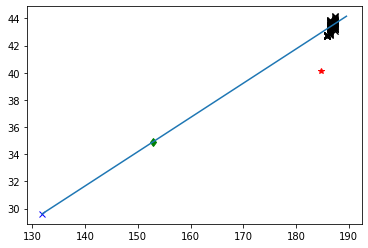

pid -22485.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     207967      1    52  5105  310104  310104  206658  10.958363  44.685394   
      208205      1    52  5105  310104  310104  206898 -41.698345 -19.447824   
      208172      1    52  5105  310104  310104  206865 -45.473091  -7.020936   
      208326      1    52  5105  310104  310104  207021   1.910662 -45.976410   
      207955      1    52  5105  310104  310104  206646  11.037550  44.584721   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      207963      1    52  5105  310104  310104  206654  17.475128  42.708553   
      208208      1    52  5105  310104  310104  206901 -38.459850 -25.506624   
      208196      1    52  5105  310104  310104  206889 -41.781891 -19.447124   
      208026      1    52  5105  310104  310104  206717 -11.401187  44.474415   
      208

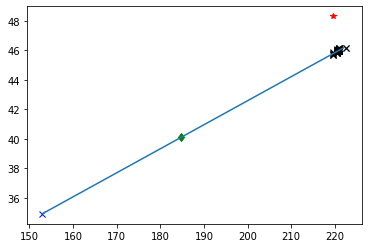

pid -22485.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     218804      1    52  5105  310104  310104  217586  56.106693 -19.229723   
      218625      1    52  5105  310104  310104  217407 -38.783081 -44.857121   
      218657      1    52  5105  310104  310104  217439 -24.626995 -53.854244   
      218683      1    52  5105  310104  310104  217465  -8.412963 -58.620564   
      218775      1    52  5105  310104  310104  217557  38.548981 -44.929176   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      218395      1    52  5105  310104  310104  217175  17.987486  57.039742   
      218814      1    52  5105  310104  310104  217596  58.093723 -11.870000   
      218539      1    52  5105  310104  310104  217321 -55.952358  18.803942   
      218489      1    52  5105  310104  310104  217271 -35.418354  47.914112   
      218

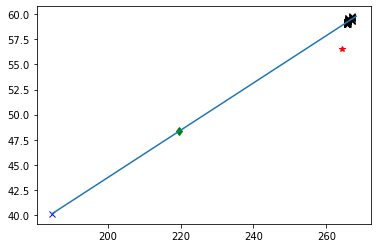

  0%|▌                                                                                                                      | 1/200 [00:00<02:21,  1.41it/s]

pid -22484.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     288447      1    52  5105  310104  310104  288195  66.230881   8.739479   
      290186      1    52  5105  310104  310104  289957  25.638294  61.689484   
      299049      1    52  5105  310104  310104  298900  66.167343  -9.222120   
      299050      1    52  5105  310104  310104  298901  66.157356  -9.297966   
      297660      1    52  5105  310104  310104  297500  41.183868 -52.604366   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      296626      1    52  5105  310104  310104  296460   5.532847 -66.834595   
      290642      1    52  5105  310104  310104  290417  12.029593  65.979286   
      289715      1    52  5105  310104  310104  289473  43.450417  51.092068   
      289710      1    52  5105  310104  310104  289468  38.056011  55.231339   
      298

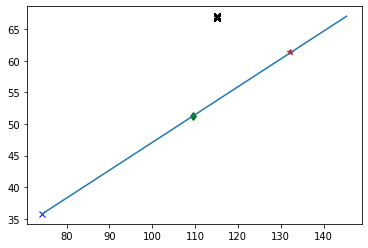

  1%|█▏                                                                                                                     | 2/200 [00:00<01:31,  2.16it/s]

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     34296       1    52  5105  310104  310104   31410 -3.674707 -4.482576   
      35934       1    52  5105  310104  310104   33069  4.578511 -3.368604   
      35777       1    52  5105  310104  310104   32910  0.371893 -5.727087   
      35512       1    52  5105  310104  310104   32644 -4.972649 -2.864842   
      33463       1    52  5105  310104  310104   30569  5.423180  2.216043   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      35717       1    52  5105  310104  310104   32850 -0.888091 -5.535407   
      35041       1    52  5105  310104  310104   32165  1.517772  5.627811   
      35246       1    52  5105  310104  310104   32376 -4.253258  3.903829   
      34760       1    52  5105  310104  310104   31880  5.838758 -1.095622   
      35283       1    52  5105  

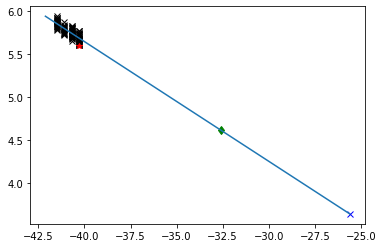

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55447       1    52  5105  310104  310104   52756 -14.742829   1.006998   
      55193       1    52  5105  310104  310104   52502  10.193095  10.771110   
      55588       1    52  5105  310104  310104   52897  -8.996861 -11.798138   
      55137       1    52  5105  310104  310104   52446  13.545029   5.996944   
      55567       1    52  5105  310104  310104   52876 -11.158280  -9.705545   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      55825       1    52  5105  310104  310104   53135  14.274410  -2.729943   
      55426       1    52  5105  310104  310104   52735 -13.760033   4.632553   
      55728       1    52  5105  310104  310104   53038   3.894780 -14.570419   
      55089       1    52  5105  310104  310104   52398  14.826962   2.770813   
      558

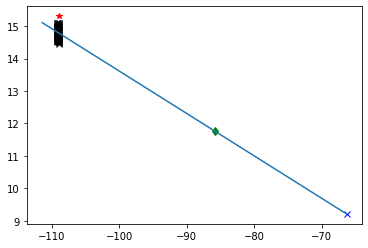

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     64542       1    52  5105  310104  310104   61892  24.522642   6.450631   
      64791       1    52  5105  310104  310104   62142 -23.703449   9.145662   
      64591       1    52  5105  310104  310104   61941  19.890192  15.819193   
      64589       1    52  5105  310104  310104   61939  20.046711  15.488052   
      64887       1    52  5105  310104  310104   62238 -22.618778 -11.369400   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      64519       1    52  5105  310104  310104   61869  24.495352   0.941609   
      64613       1    52  5105  310104  310104   61963  15.202144  19.226803   
      64764       1    52  5105  310104  310104   62115 -19.333948  14.827802   
      64999       1    52  5105  310104  310104   62352  -0.828604 -24.341715   
      648

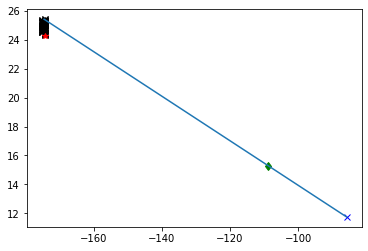

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     169107      1    52  5105  310104  310104  167366  17.391464  32.358570   
      169328      1    52  5105  310104  310104  167589 -27.694984  24.138205   
      169846      1    52  5105  310104  310104  168111  14.512180 -33.752617   
      169196      1    52  5105  310104  310104  167455   1.529939  36.711132   
      169026      1    52  5105  310104  310104  167285  29.762228  21.523518   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      169743      1    52  5105  310104  310104  168008  -4.093716 -36.422264   
      169739      1    52  5105  310104  310104  168004  -7.611458 -36.025909   
      169657      1    52  5105  310104  310104  167922 -16.506638 -32.914543   
      1046        1    52  5105  310104  310104  168141  20.224140 -31.011820   
      168

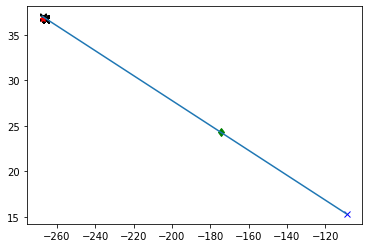

  2%|█▊                                                                                                                     | 3/200 [00:01<02:16,  1.45it/s]

pid -22480.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     246412      1    52  5105  310104  310104  245625 -20.641294   8.917728   
      18972       1    52  5105  310104  310104   15829 -10.585490  -1.565094   
      244523      1    52  5105  310104  310104  243700  16.592882  18.339733   
      16573       1    52  5105  310104  310104   13394  10.518556   1.987702   
      20130       1    52  5105  310104  310104   17008   2.641085  -9.908837   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      18230       1    52  5105  310104  310104   15077  -7.014909   7.410069   
      20996       1    52  5105  310104  310104   17911   9.849896  -3.013226   
      20329       1    52  5105  310104  310104   17210   6.288971  -8.804500   
      17547       1    52  5105  310104  310104   14385   2.418726  10.450288   
      244

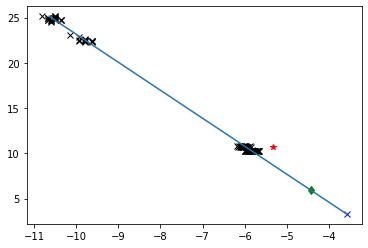

pid -22480.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     250029      1    52  5105  310104  310104  249271  22.782526   0.585418   
      23186       1    52  5105  310104  310104   20128 -14.402493   0.786556   
      244076      1    52  5105  310104  310104  243250  17.048626  15.140411   
      250028      1    52  5105  310104  310104  249270  22.768633   0.506634   
      247988      1    52  5105  310104  310104  247208 -17.993168 -14.057885   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      250062      1    52  5105  310104  310104  249304  23.011660   0.387624   
      247228      1    52  5105  310104  310104  246444 -21.496521  -8.205154   
      244107      1    52  5105  310104  310104  243282  17.396294  15.058235   
      244977      1    52  5105  310104  310104  244172  11.803618  19.748665   
      179

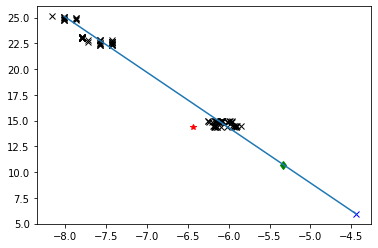

pid -22480.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     246424      1    52  5105  310104  310104  245637 -17.498795  14.360698   
      247190      1    52  5105  310104  310104  246406 -21.312534  -7.751310   
      245662      1    52  5105  310104  310104  244862 -10.263185  20.032652   
      250022      1    52  5105  310104  310104  249264  21.521839  -6.564286   
      249423      1    52  5105  310104  310104  248651  12.497056 -18.669670   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      246843      1    52  5105  310104  310104  246059 -23.788326   8.913548   
      247982      1    52  5105  310104  310104  247202 -12.209532 -18.910931   
      249095      1    52  5105  310104  310104  248320  12.857563 -21.897802   
      244950      1    52  5105  310104  310104  244141  10.333345  20.007114   
      249

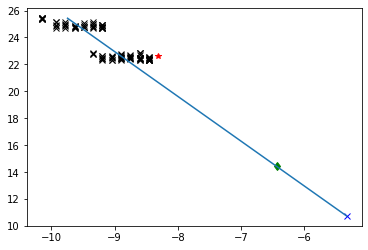

pid -22480.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     294355      1    52  5105  310104  310104  294159 -62.136219 -25.735683   
      293505      1    52  5105  310104  310104  293302 -66.689957   8.700047   
      296518      1    52  5105  310104  310104  296350   8.870416 -66.667534   
      293506      1    52  5105  310104  310104  293303 -66.694069   8.668816   
      291999      1    52  5105  310104  310104  291778 -40.808704  53.459454   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      297940      1    52  5105  310104  310104  297780  52.506996 -42.345650   
      293970      1    52  5105  310104  310104  293769 -67.072716  -7.171771   
      295697      1    52  5105  310104  310104  295525 -27.337893 -61.667393   
      297464      1    52  5105  310104  310104  297302  39.679459 -54.552837   
      292

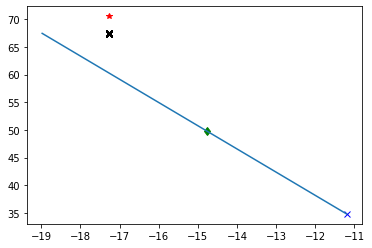

pid -22480.0
final                 run  lumi   evt    nhit   hit_n  hit_id           x  \
entry subentry                                                        
4     308304      1    52  5105  310104  310104  308269  -93.174301   
      308303      1    52  5105  310104  310104  308268  -94.039574   
      308302      1    52  5105  310104  310104  308267  -94.052429   
      307010      1    52  5105  310104  310104  306948   92.939186   
      309220      1    52  5105  310104  310104  309203  -24.762512   
...             ...   ...   ...     ...     ...     ...         ...   
      308800      1    52  5105  310104  310104  308783 -100.558342   
      308698      1    52  5105  310104  310104  308679 -106.071617   
      308697      1    52  5105  310104  310104  308678 -106.066093   
      308696      1    52  5105  310104  310104  308677 -106.061668   
      309609      1    52  5105  310104  310104  309601   52.698822   

                         y          z  particle_id  ...  

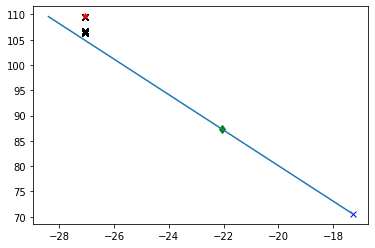

  2%|██▍                                                                                                                    | 4/200 [00:03<03:02,  1.07it/s]

pid -22479.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     804         1    52  5105  310104  310104   50184  4.293321  7.875789   
      52812       1    52  5105  310104  310104   50108  7.018509  5.586916   
      54725       1    52  5105  310104  310104   52033 -4.595199 -7.775052   
      54738       1    52  5105  310104  310104   52046 -2.208243 -8.789766   
      54698       1    52  5105  310104  310104   52006 -5.896057 -6.839964   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      53513       1    52  5105  310104  310104   50811 -6.579188 -6.256491   
      54363       1    52  5105  310104  310104   51671 -3.264813  8.541737   
      54829       1    52  5105  310104  310104   52138  1.731806 -9.017069   
      54304       1    52  5105  310104  310104   51611 -2.435234  8.853776   
      53530       1    52  5105  

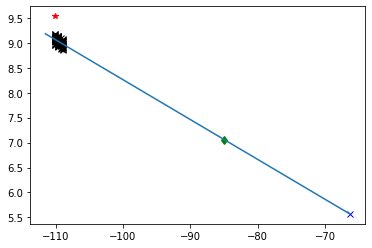

  2%|██▉                                                                                                                    | 5/200 [00:03<02:13,  1.46it/s]

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     281225      1    52  5105  310104  310104  280921 -45.117298  30.117281   
      281467      1    52  5105  310104  310104  281168  52.711002 -12.791176   
      281190      1    52  5105  310104  310104  280886 -21.710213  49.703526   
      281167      1    52  5105  310104  310104  280863   3.668680  54.131371   
      184957      1    52  5105  310104  310104  183354  59.706406 -27.195869   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      184906      1    52  5105  310104  310104  183302  21.725733 -61.110519   
      281362      1    52  5105  310104  310104  281058 -18.976315 -50.898239   
      281066      1    52  5105  310104  310104  280762  34.060417  42.328308   
      280809      1    52  5105  310104  310104  280493 -50.345787   4.166323   
      281

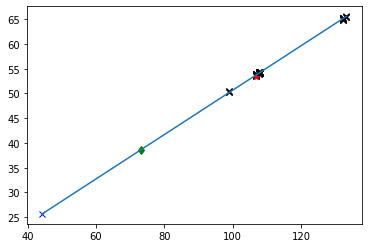

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     288447      1    52  5105  310104  310104  288195  66.230881   8.739479   
      290186      1    52  5105  310104  310104  289957  25.638294  61.689484   
      299049      1    52  5105  310104  310104  298900  66.167343  -9.222120   
      299050      1    52  5105  310104  310104  298901  66.157356  -9.297966   
      297660      1    52  5105  310104  310104  297500  41.183868 -52.604366   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      296626      1    52  5105  310104  310104  296460   5.532847 -66.834595   
      290642      1    52  5105  310104  310104  290417  12.029593  65.979286   
      289715      1    52  5105  310104  310104  289473  43.450417  51.092068   
      289710      1    52  5105  310104  310104  289468  38.056011  55.231339   
      298

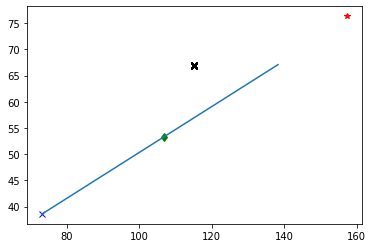

  3%|███▌                                                                                                                   | 6/200 [00:04<02:11,  1.47it/s]

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     232472      1    52  5105  310104  310104  231414  24.835232   4.761754   
      232471      1    52  5105  310104  310104  231413  24.913374   4.318591   
      233899      1    52  5105  310104  310104  232882  19.103785 -18.732731   
      233508      1    52  5105  310104  310104  232463 -25.093241   9.582212   
      233714      1    52  5105  310104  310104  232691 -12.898363 -24.610580   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      233838      1    52  5105  310104  310104  232821  10.494383 -25.713907   
      233190      1    52  5105  310104  310104  232145  27.378805   3.311407   
      21577       1    52  5105  310104  310104   18499  13.366426   6.733284   
      232983      1    52  5105  310104  310104  231932  -5.453032 -24.694429   
      232

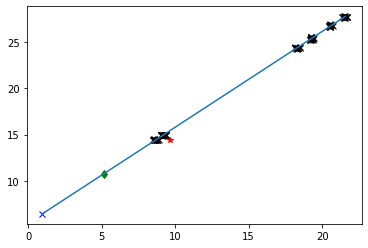

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     233985      1    52  5105  310104  310104  232970  21.489040 -14.240577   
      233497      1    52  5105  310104  310104  232452 -15.311037  20.741093   
      234137      1    52  5105  310104  310104  233126  14.470780  24.085838   
      233653      1    52  5105  310104  310104  232626 -23.097221 -11.455125   
      233341      1    52  5105  310104  310104  232296  15.277609  20.769142   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      234087      1    52  5105  310104  310104  233076  21.148806  17.057911   
      234579      1    52  5105  310104  310104  233595  -7.486861 -27.036905   
      233879      1    52  5105  310104  310104  232862   6.015815 -25.192081   
      233448      1    52  5105  310104  310104  232403 -12.719266  21.180094   
      234

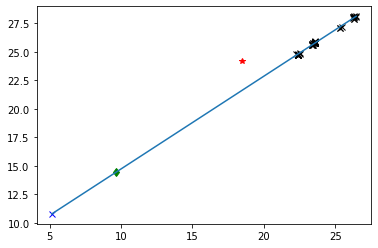

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     258469      1    52  5105  310104  310104  257804 -16.542791  35.603718   
      258399      1    52  5105  310104  310104  257734  11.367320  36.645580   
      258458      1    52  5105  310104  310104  257793 -12.765478  36.047291   
      258581      1    52  5105  310104  310104  257918 -37.759346  -6.778666   
      258655      1    52  5105  310104  310104  257996 -14.357532 -35.442211   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      258371      1    52  5105  310104  310104  257706  25.584656  28.174644   
      258548      1    52  5105  310104  310104  257885 -35.417965  13.926527   
      258619      1    52  5105  310104  310104  257956 -32.992779 -19.459543   
      258602      1    52  5105  310104  310104  257939 -36.405045 -14.856907   
      258

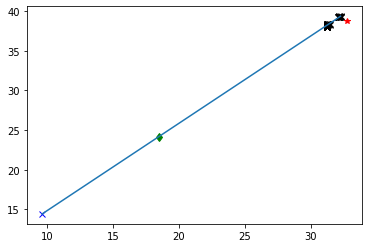

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     296407      1    52  5105  310104  310104  296237   0.236665 -70.415001   
      298804      1    52  5105  310104  310104  298653  68.100220 -17.909208   
      289052      1    52  5105  310104  310104  288804  61.162094  34.894142   
      288597      1    52  5105  310104  310104  288347  68.122131  17.827425   
      289431      1    52  5105  310104  310104  289185  49.458115  50.123734   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      291835      1    52  5105  310104  310104  291614 -37.766682  59.711479   
      290842      1    52  5105  310104  310104  290617  -2.878165  70.595001   
      296419      1    52  5105  310104  310104  296249   3.026665 -70.595001   
      291836      1    52  5105  310104  310104  291615 -37.969330  59.594479   
      296

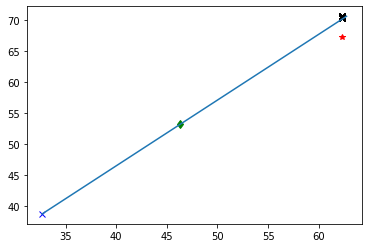

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     301345      1    52  5105  310104  310104  301224  -9.131950  84.060944   
      299207      1    52  5105  310104  310104  299058  84.555000  -1.059337   
      300386      1    52  5105  310104  310104  300243  55.616589  63.702572   
      304073      1    52  5105  310104  310104  303995 -55.583145 -63.732685   
      305990      1    52  5105  310104  310104  305920  67.601265 -50.808407   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      301052      1    52  5105  310104  310104  300923  16.662975  86.132782   
      302302      1    52  5105  310104  310104  302187 -64.126831  59.867954   
      300207      1    52  5105  310104  310104  300062  66.203926  57.561104   
      299373      1    52  5105  310104  310104  299226  87.392258   7.667646   
      300

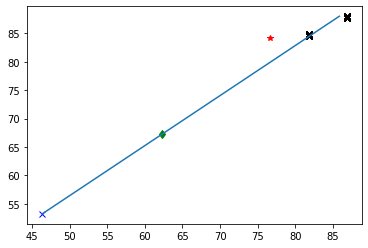

pid -22477.0
final                 run  lumi   evt    nhit   hit_n  hit_id           x  \
entry subentry                                                        
4     308019      1    52  5105  310104  310104  307982  -61.684700   
      309071      1    52  5105  310104  310104  309054  -61.606407   
      308769      1    52  5105  310104  310104  308752 -101.928596   
      307632      1    52  5105  310104  310104  307593    5.499280   
      307525      1    52  5105  310104  310104  307475   28.850542   
...             ...   ...   ...     ...     ...     ...         ...   
      306981      1    52  5105  310104  310104  306917  101.986336   
      309036      1    52  5105  310104  310104  309019  -65.639236   
      307665      1    52  5105  310104  310104  307626   -2.365080   
      310023      1    52  5105  310104  310104  310023  106.538689   
      310024      1    52  5105  310104  310104  310024  106.576248   

                         y           z  particle_id  ... 

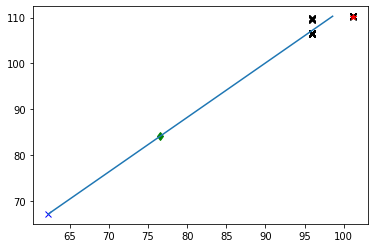

  4%|████▏                                                                                                                  | 7/200 [00:05<02:53,  1.11it/s]

pid -22476.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     245190      1    52  5105  310104  310104  244388   7.266876  20.644871   
      249319      1    52  5105  310104  310104  248547   4.401671 -24.220463   
      17388       1    52  5105  310104  310104   14225   5.502745   8.643939   
      249640      1    52  5105  310104  310104  248876  14.973287 -16.005085   
      244388      1    52  5105  310104  310104  243565  18.344517  11.996865   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      245542      1    52  5105  310104  310104  244740  -4.607332  24.265249   
      246320      1    52  5105  310104  310104  245528 -16.067881  17.854074   
      246319      1    52  5105  310104  310104  245527 -16.083200  17.841219   
      244858      1    52  5105  310104  310104  244038  14.762033  18.949812   
      244

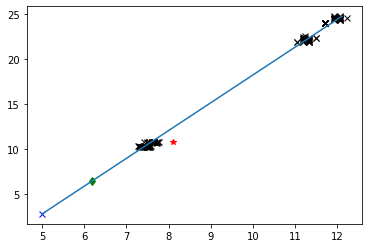

pid -22476.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     244868      1    52  5105  310104  310104  244049  13.827457  19.734013   
      244873      1    52  5105  310104  310104  244054  17.002712  17.069658   
      24908       1    52  5105  310104  310104   21888  11.832365  -8.234936   
      243984      1    52  5105  310104  310104  243156  23.271149   6.263481   
      245574      1    52  5105  310104  310104  244772   2.017668  24.005251   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      246340      1    52  5105  310104  310104  245550 -12.992211  20.434868   
      247897      1    52  5105  310104  310104  247117 -22.390490  -9.229033   
      245578      1    52  5105  310104  310104  244776   3.257668  24.005251   
      248261      1    52  5105  310104  310104  247483 -16.685654 -14.568239   
      230

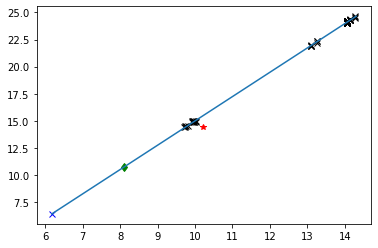

pid -22476.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     232775      1    52  5105  310104  310104  231720 -20.870747  15.608310   
      246738      1    52  5105  310104  310104  245953 -17.154348  14.058296   
      232456      1    52  5105  310104  310104  231398  27.260052   1.513471   
      1822        1    52  5105  310104  310104  249576  21.363892  -4.871478   
      245960      1    52  5105  310104  310104  245164  -5.758353  21.193928   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      232479      1    52  5105  310104  310104  231421  27.600983   1.527891   
      232748      1    52  5105  310104  310104  231692 -15.119853  23.142420   
      244426      1    52  5105  310104  310104  243603  19.387016  10.191202   
      232573      1    52  5105  310104  310104  231515  15.094084  23.164043   
      81 

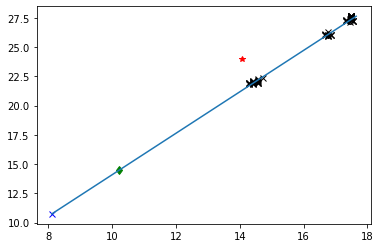

pid -22476.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     268987      1    52  5105  310104  310104  268488 -37.302586   4.597281   
      267128      1    52  5105  310104  310104  266622  12.291750  33.228695   
      267672      1    52  5105  310104  310104  267168  -5.733182  34.845242   
      271593      1    52  5105  310104  310104  271107  23.177444 -29.679274   
      271852      1    52  5105  310104  310104  271371  30.451378 -17.856705   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      267125      1    52  5105  310104  310104  266619  12.364571  33.210747   
      266310      1    52  5105  310104  310104  265787  32.429871  19.180004   
      269767      1    52  5105  310104  310104  269268 -30.329149 -18.033760   
      269531      1    52  5105  310104  310104  269032 -36.153831 -10.660663   
      272

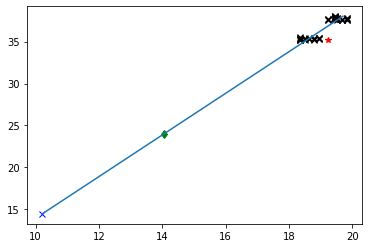

pid -22476.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     302201      1    52  5105  310104  310104  302084 -56.271900  62.506996   
      33          1    52  5105  310104  310104  305184  25.927418 -80.008904   
      300337      1    52  5105  310104  310104  300194  56.329376  62.455246   
      299575      1    52  5105  310104  310104  299428  82.295731  17.351749   
      299576      1    52  5105  310104  310104  299429  82.340637  17.140471   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      305402      1    52  5105  310104  310104  305330  31.958147 -81.984375   
      305403      1    52  5105  310104  310104  305331  31.991034 -81.969734   
      299354      1    52  5105  310104  310104  299207  86.986122  13.253801   
      305404      1    52  5105  310104  310104  305332  32.019810 -81.956924   
      305

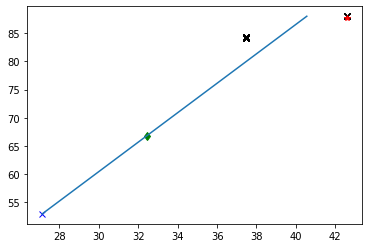

  4%|████▊                                                                                                                  | 8/200 [00:06<03:18,  1.03s/it]

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     243378      1    52  5105  310104  310104  242542   6.524333 -23.083849   
      89613       1    52  5105  310104  310104   87181   3.572407   6.636336   
      89735       1    52  5105  310104  310104   87304  -0.284942   7.445845   
      89641       1    52  5105  310104  310104   87209   1.754753   7.240308   
      242968      1    52  5105  310104  310104  242131 -19.517834  13.625054   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      242988      1    52  5105  310104  310104  242151 -20.593037  11.965288   
      243122      1    52  5105  310104  310104  242286 -23.442877  -4.203954   
      242608      1    52  5105  310104  310104  241767  20.666262  11.838457   
      242869      1    52  5105  310104  310104  242029  -8.032357  22.421701   
      242

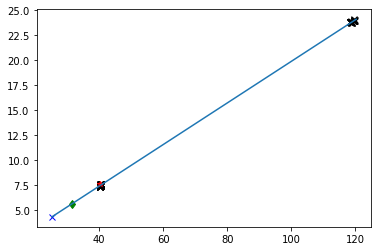

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     100965      1    52  5105  310104  310104   98660 -12.702582  -5.186964   
      243238      1    52  5105  310104  310104  242402 -11.308107 -23.293571   
      243310      1    52  5105  310104  310104  242474  -2.545727 -25.548687   
      100992      1    52  5105  310104  310104   98687 -12.618691  -5.138963   
      100641      1    52  5105  310104  310104   98336   6.602843  12.023743   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      243311      1    52  5105  310104  310104  242475  -2.550726 -25.407671   
      242630      1    52  5105  310104  310104  241789  19.516100  17.246639   
      101008      1    52  5105  310104  310104   98704 -10.547604  -9.013563   
      100616      1    52  5105  310104  310104   98311   8.170783  10.714726   
      243

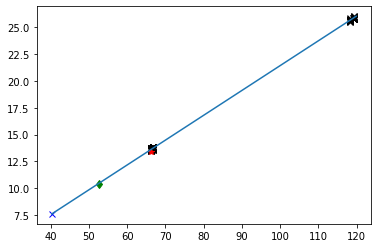

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     178320      1    52  5105  310104  310104  176649 -14.652091  23.007339   
      242964      1    52  5105  310104  310104  242126 -22.563080  10.042737   
      178127      1    52  5105  310104  310104  176456   0.524011  27.184259   
      178164      1    52  5105  310104  310104  176493   6.929025  26.392597   
      178165      1    52  5105  310104  310104  176494   6.746303  26.421537   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      179074      1    52  5105  310104  310104  177407  24.634892 -11.457841   
      242962      1    52  5105  310104  310104  242124 -22.467703  10.489966   
      243144      1    52  5105  310104  310104  242308 -21.805462 -11.770390   
      177938      1    52  5105  310104  310104  176262  26.951853   3.398030   
      177

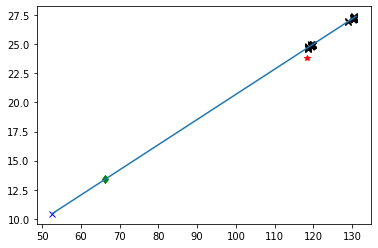

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     178827      1    52  5105  310104  310104  177158   7.303623 -24.922245   
      178142      1    52  5105  310104  310104  176471  -0.657146  26.183107   
      178137      1    52  5105  310104  310104  176466   7.761155  24.998308   
      1447        1    52  5105  310104  310104  176676 -16.910215  19.724493   
      178401      1    52  5105  310104  310104  176732 -24.851774   8.285543   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      178395      1    52  5105  310104  310104  176726 -23.765221  11.710563   
      178823      1    52  5105  310104  310104  177154   6.187243 -25.544649   
      178011      1    52  5105  310104  310104  176335  18.283276  19.181293   
      178762      1    52  5105  310104  310104  177093  -6.296181 -25.081808   
      178

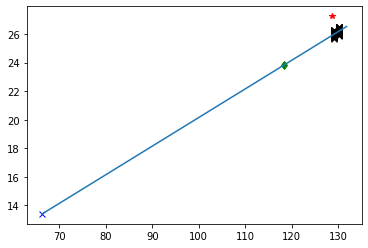

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     189955      1    52  5105  310104  310104  188441 -17.945652  30.762875   
      190351      1    52  5105  310104  310104  188840   7.733913 -34.765095   
      190112      1    52  5105  310104  310104  188600 -35.377171  -4.208645   
      190348      1    52  5105  310104  310104  188837   5.175304 -35.249905   
      189954      1    52  5105  310104  310104  188440 -17.862350  30.826794   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      190405      1    52  5105  310104  310104  188895  15.136821 -31.892134   
      190134      1    52  5105  310104  310104  188622 -35.553284  -0.061150   
      190335      1    52  5105  310104  310104  188823  -2.747966 -35.199558   
      190288      1    52  5105  310104  310104  188776  -9.727153 -34.053497   
      190

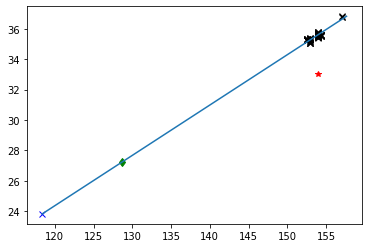

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     218610      1    52  5105  310104  310104  217392 -50.565975 -28.659327   
      218330      1    52  5105  310104  310104  217110  50.592335  28.611055   
      218383      1    52  5105  310104  310104  217163  26.372980  51.814419   
      218664      1    52  5105  310104  310104  217446 -16.851749 -55.897629   
      218678      1    52  5105  310104  310104  217460  -7.895715 -57.607101   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      218482      1    52  5105  310104  310104  217264 -28.905655  51.517918   
      218526      1    52  5105  310104  310104  217308 -52.200825  27.655003   
      218401      1    52  5105  310104  310104  217181  21.434315  55.049568   
      218605      1    52  5105  310104  310104  217387 -55.032108 -21.481119   
      218

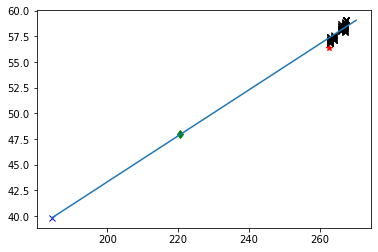

  4%|█████▎                                                                                                                 | 9/200 [00:08<03:45,  1.18s/it]

pid -22474.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     103600      1    52  5105  310104  310104  101318 -5.028749 -3.600066   
      101988      1    52  5105  310104  310104   99694 -6.199770  0.416232   
      101786      1    52  5105  310104  310104   99491 -2.352061  5.780851   
      103630      1    52  5105  310104  310104  101350 -3.316871 -5.190355   
      102435      1    52  5105  310104  310104  100144  1.298099 -6.070233   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      103697      1    52  5105  310104  310104  101421 -2.361692 -5.627554   
      102487      1    52  5105  310104  310104  100196  2.203357 -5.924036   
      103877      1    52  5105  310104  310104  101606  2.460215 -5.582551   
      103758      1    52  5105  310104  310104  101483 -0.985934 -6.018709   
      102073      1    52  5105  

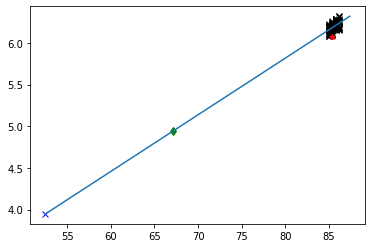

pid -22474.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     108405      1    52  5105  310104  310104  106192  1.259912 -7.410179   
      108148      1    52  5105  310104  310104  105930 -6.208442 -4.227009   
      108056      1    52  5105  310104  310104  105838 -7.534457  0.100239   
      108202      1    52  5105  310104  310104  105985 -6.238925 -4.248561   
      108106      1    52  5105  310104  310104  105888 -7.502773  0.088777   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      106282      1    52  5105  310104  310104  104046  1.196210  7.312865   
      108351      1    52  5105  310104  310104  106137 -2.696568 -7.205700   
      108268      1    52  5105  310104  310104  106053 -5.400879 -5.481506   
      106965      1    52  5105  310104  310104  104735 -1.773015 -7.191099   
      107948      1    52  5105  

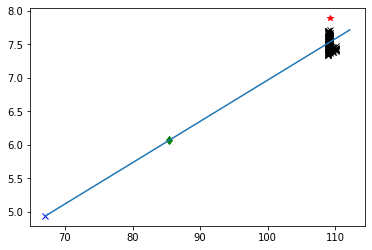

pid -22474.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     113974      1    52  5105  310104  310104  111802  -9.205217  -4.580071   
      113491      1    52  5105  310104  310104  111316   8.262887   6.072493   
      114020      1    52  5105  310104  310104  111849  -8.763060  -5.313979   
      113963      1    52  5105  310104  310104  111790  -9.529862  -3.848630   
      113985      1    52  5105  310104  310104  111813  -8.791907  -5.342436   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      114202      1    52  5105  310104  310104  112036   4.658306  -8.891065   
      113926      1    52  5105  310104  310104  111752  -9.966062  -0.889694   
      113756      1    52  5105  310104  310104  111581  -6.567431   8.192449   
      114111      1    52  5105  310104  310104  111942  -2.877354 -10.133411   
      114

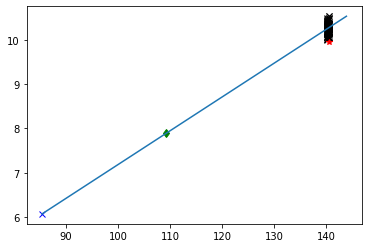

  5%|█████▉                                                                                                                | 10/200 [00:09<03:25,  1.08s/it]

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     20781       1    52  5105  310104  310104   17690   9.105656  -5.697919   
      249538      1    52  5105  310104  310104  248769  12.839852 -17.795250   
      248493      1    52  5105  310104  310104  247716  -4.021411 -24.358866   
      249537      1    52  5105  310104  310104  248768  12.962420 -17.692404   
      246608      1    52  5105  310104  310104  245821 -19.851849   9.386090   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      244706      1    52  5105  310104  310104  243885  18.035467  16.542480   
      19228       1    52  5105  310104  310104   16092  -9.348952  -4.119079   
      19725       1    52  5105  310104  310104   16597  -3.956948  -9.431561   
      18513       1    52  5105  310104  310104   15363  -9.744503   4.444110   
      175

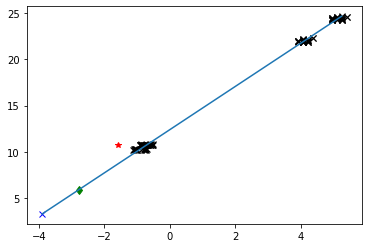

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     245416      1    52  5105  310104  310104  244614  -1.032669  24.714750   
      246559      1    52  5105  310104  310104  245772 -19.526295  10.848965   
      247709      1    52  5105  310104  310104  246927 -21.039766 -12.987555   
      21851       1    52  5105  310104  310104   18775   7.570804  12.840178   
      23031       1    52  5105  310104  310104   19973 -13.820425   5.616860   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      248825      1    52  5105  310104  310104  248048  -1.102332 -22.594749   
      246930      1    52  5105  310104  310104  246146 -24.121813   5.524977   
      246588      1    52  5105  310104  310104  245801 -18.998960  12.282333   
      249815      1    52  5105  310104  310104  249051  21.047436 -12.974273   
      245

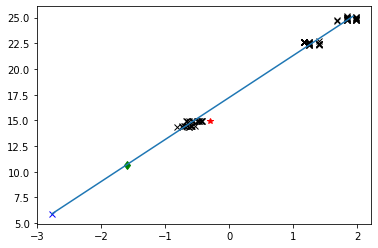

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     41          1    52  5105  310104  310104  248758  17.723387 -13.697477   
      250148      1    52  5105  310104  310104  249391  21.247475  -8.120282   
      249196      1    52  5105  310104  310104  248424   9.128325 -22.500101   
      244234      1    52  5105  310104  310104  243409  17.058626  15.123092   
      249837      1    52  5105  310104  310104  249073  20.822989 -12.464025   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      246150      1    52  5105  310104  310104  245356 -13.013787  20.756170   
      250139      1    52  5105  310104  310104  249382  21.418518  -7.150247   
      247746      1    52  5105  310104  310104  246964 -22.663157  -9.276760   
      244691      1    52  5105  310104  310104  243870  12.374398  21.292683   
      248

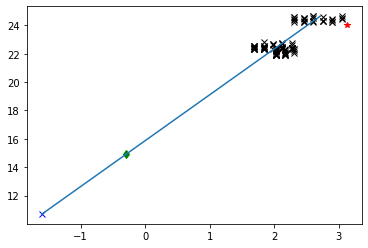

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     272038      1    52  5105  310104  310104  271557  36.363110 -10.108883   
      265678      1    52  5105  310104  310104  265149  36.886124   8.027227   
      266537      1    52  5105  310104  310104  266014  20.487579  28.882660   
      266248      1    52  5105  310104  310104  265725  33.071781  18.250031   
      269475      1    52  5105  310104  310104  268976 -34.221249 -15.756506   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      269488      1    52  5105  310104  310104  268989 -36.581795  -9.983411   
      267889      1    52  5105  310104  310104  267387 -20.479334  31.698399   
      269716      1    52  5105  310104  310104  269217 -30.900053 -17.206659   
      266255      1    52  5105  310104  310104  265732  33.263103  18.254505   
      267

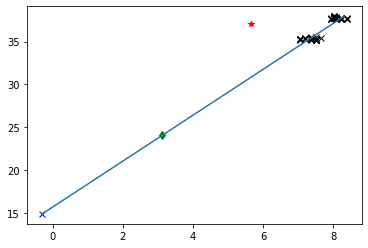

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     284823      1    52  5105  310104  310104  284557 -52.874046   4.593599   
      282178      1    52  5105  310104  310104  281890  52.758511   5.248831   
      287181      1    52  5105  310104  310104  286925  31.120216 -42.901886   
      284976      1    52  5105  310104  310104  284710 -50.488441   3.042331   
      284640      1    52  5105  310104  310104  284374 -46.332962  20.319555   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      287769      1    52  5105  310104  310104  287515  46.305462 -20.862919   
      284993      1    52  5105  310104  310104  284727 -50.648441   3.827331   
      286951      1    52  5105  310104  310104  286691  28.652069 -41.941502   
      284649      1    52  5105  310104  310104  284383 -46.267838  20.966286   
      284

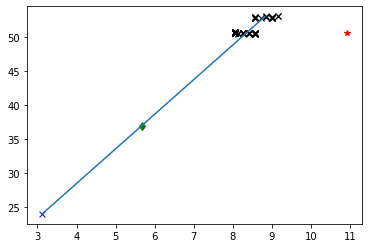

pid -22472.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     290076      1    52  5105  310104  310104  289842  29.843864  60.142307   
      295726      1    52  5105  310104  310104  295554 -21.425013 -63.629509   
      290075      1    52  5105  310104  310104  289841  29.823078  60.150917   
      290074      1    52  5105  310104  310104  289840  29.806448  60.157806   
      290073      1    52  5105  310104  310104  289839  29.785660  60.166416   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      297975      1    52  5105  310104  310104  297815  54.929638 -38.153515   
      295318      1    52  5105  310104  310104  295146 -43.158779 -51.088963   
      297976      1    52  5105  310104  310104  297816  54.896767 -38.196354   
      293982      1    52  5105  310104  310104  293781 -65.832062 -11.768822   
      290

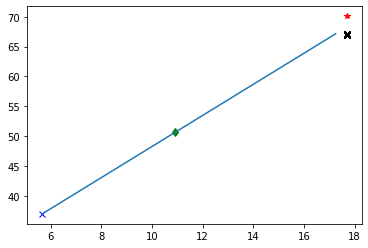

  6%|██████▍                                                                                                               | 11/200 [00:10<03:40,  1.16s/it]

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     234364      1    52  5105  310104  310104  233356 -21.973269   9.836262   
      17673       1    52  5105  310104  310104   14512   0.236890  10.795856   
      20454       1    52  5105  310104  310104   17345   3.927230 -10.007867   
      235591      1    52  5105  310104  310104  234621  21.644485 -17.794985   
      234978      1    52  5105  310104  310104  234000   6.151305  26.325945   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      18867       1    52  5105  310104  310104   15722 -10.077766   1.574512   
      19103       1    52  5105  310104  310104   15965 -10.638876  -1.228026   
      20244       1    52  5105  310104  310104   17123   1.330920 -10.116347   
      20240       1    52  5105  310104  310104   17119   0.344336 -10.272607   
      234

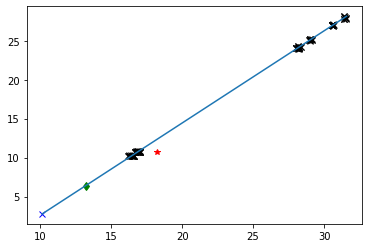

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     236072      1    52  5105  310104  310104  235114 -25.619926  -7.085161   
      83645       1    52  5105  310104  310104   81129  11.765962 -10.841375   
      236328      1    52  5105  310104  310104  235372  12.725594 -24.243643   
      236425      1    52  5105  310104  310104  235473  21.646885 -16.774462   
      235248      1    52  5105  310104  310104  234274 -22.952978  -3.187841   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      83552       1    52  5105  310104  310104   81024   3.043713 -15.379265   
      83181       1    52  5105  310104  310104   80651  13.654478   7.695278   
      235617      1    52  5105  310104  310104  234649  22.481260  -8.976985   
      236410      1    52  5105  310104  310104  235457  13.264957 -22.570253   
      836

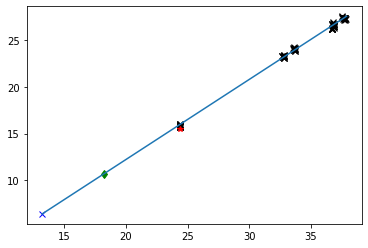

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     236235      1    52  5105  310104  310104  235279  -9.191080 -24.583706   
      236234      1    52  5105  310104  310104  235278 -10.093185 -24.255365   
      235990      1    52  5105  310104  310104  235028 -23.517555  10.155719   
      236175      1    52  5105  310104  310104  235219 -14.073721 -21.406393   
      235764      1    52  5105  310104  310104  234800  14.722568  21.740423   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      235721      1    52  5105  310104  310104  234755  19.398764  16.019218   
      236028      1    52  5105  310104  310104  235068 -25.221554   5.171918   
      235963      1    52  5105  310104  310104  235001 -16.233860  19.974758   
      236029      1    52  5105  310104  310104  235069 -25.283199   4.822311   
      236

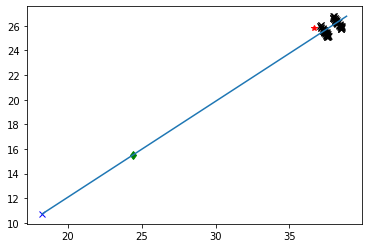

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     260138      1    52  5105  310104  310104  259520  -5.143136  36.689255   
      260137      1    52  5105  310104  310104  259519  -9.177032  35.818764   
      260327      1    52  5105  310104  310104  259712 -34.735069 -14.458307   
      260186      1    52  5105  310104  310104  259568 -27.210726  25.129808   
      260426      1    52  5105  310104  310104  259812  -7.425020 -36.900173   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      260275      1    52  5105  310104  310104  259659 -36.413513   8.837070   
      260551      1    52  5105  310104  310104  259939  28.419298 -23.069256   
      260391      1    52  5105  310104  310104  259777 -27.928059 -24.974230   
      260397      1    52  5105  310104  310104  259783 -21.430984 -30.730137   
      260

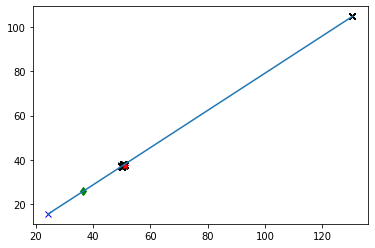

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     279640      1    52  5105  310104  310104  279304  37.786793 -38.869816   
      279357      1    52  5105  310104  310104  279015  53.861481   5.883660   
      279441      1    52  5105  310104  310104  279099 -10.311955  52.529324   
      67          1    52  5105  310104  310104  279268   8.618087 -52.827999   
      279448      1    52  5105  310104  310104  279106 -18.568869  50.911335   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      279390      1    52  5105  310104  310104  279048  30.941526  44.281982   
      279494      1    52  5105  310104  310104  279152 -53.947205   6.860738   
      279537      1    52  5105  310104  310104  279199 -47.280880 -25.982801   
      279635      1    52  5105  310104  310104  279299  25.366989 -47.449570   
      279

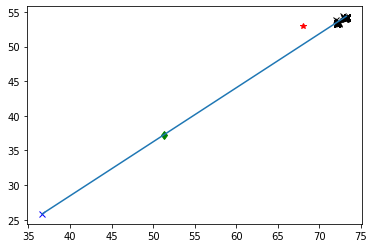

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     299985      1    52  5105  310104  310104  299840  78.381470  40.029305   
      302800      1    52  5105  310104  310104  302690 -84.856575  23.272505   
      302098      1    52  5105  310104  310104  301981 -48.396297  73.482231   
      306493      1    52  5105  310104  310104  306429  84.832932 -23.345261   
      302099      1    52  5105  310104  310104  301982 -48.421780  73.463715   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      302952      1    52  5105  310104  310104  302844 -82.072548  20.566103   
      299235      1    52  5105  310104  310104  299088  84.555000  -3.093342   
      299238      1    52  5105  310104  310104  299091  84.555000   3.161657   
      299239      1    52  5105  310104  310104  299092  84.555000   3.188657   
      299

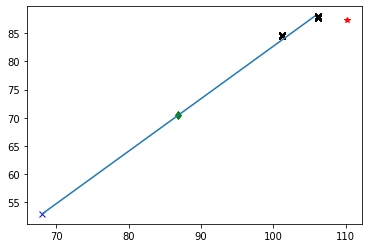

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id           x  \
entry subentry                                                        
4     307166      1    52  5105  310104  310104  307104   83.956360   
      307034      1    52  5105  310104  310104  306972   93.650246   
      308639      1    52  5105  310104  310104  308611 -104.860901   
      308775      1    52  5105  310104  310104  308758 -101.520180   
      308938      1    52  5105  310104  310104  308921  -85.683830   
      307935      1    52  5105  310104  310104  307898  -40.077740   
      307936      1    52  5105  310104  310104  307899  -40.057137   
      307937      1    52  5105  310104  310104  307900  -40.036530   
      309816      1    52  5105  310104  310104  309812   82.126015   
      308121      1    52  5105  310104  310104  308084  -69.382416   
      307636      1    52  5105  310104  310104  307597    4.901408   
      309443      1    52  5105  310104  310104  309431   

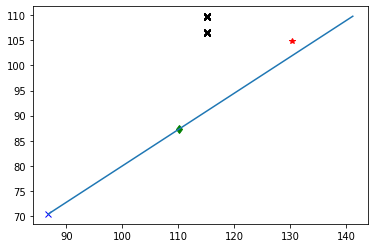

  6%|███████                                                                                                               | 12/200 [00:12<04:03,  1.30s/it]

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     84877       1    52  5105  310104  310104   82381  1.866332 -4.208079   
      83714       1    52  5105  310104  310104   81199  4.601840 -0.054535   
      84397       1    52  5105  310104  310104   81888 -4.425181  1.124850   
      84087       1    52  5105  310104  310104   81574 -0.860901  4.492627   
      83716       1    52  5105  310104  310104   81201  4.597539 -0.027373   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      84899       1    52  5105  310104  310104   82403  2.175911 -3.904270   
      84303       1    52  5105  310104  310104   81792 -4.272797  2.048048   
      84680       1    52  5105  310104  310104   82179 -2.240769 -4.136188   
      83871       1    52  5105  310104  310104   81356  3.373119  2.929410   
      84546       1    52  5105  

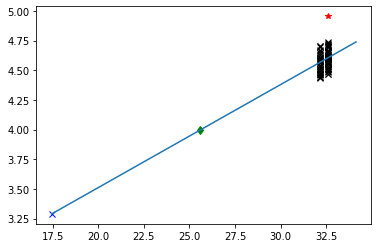

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     105647      1    52  5105  310104  310104  103396 -10.283632  -6.691220   
      104257      1    52  5105  310104  310104  101986   6.159201  10.739302   
      2763        1    52  5105  310104  310104  103638   8.692928  -8.574897   
      105171      1    52  5105  310104  310104  102917  12.078971   2.138420   
      105506      1    52  5105  310104  310104  103253 -11.405877   4.510542   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      105661      1    52  5105  310104  310104  103412  -9.224016  -7.841625   
      104817      1    52  5105  310104  310104  102559  -5.718594 -10.732217   
      104625      1    52  5105  310104  310104  102358 -12.105998  -1.126033   
      105791      1    52  5105  310104  310104  103546  -0.010449 -12.381915   
      104

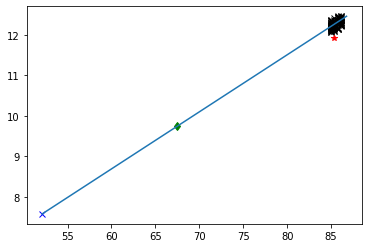

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     110045      1    52  5105  310104  310104  107846 -10.291071  10.604431   
      109972      1    52  5105  310104  310104  107773  -6.375860  13.331141   
      110338      1    52  5105  310104  310104  108145  -2.843629 -14.538107   
      110282      1    52  5105  310104  310104  108087 -10.355417 -10.547236   
      109885      1    52  5105  310104  310104  107686   2.160261  14.677117   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      110257      1    52  5105  310104  310104  108062  -8.578089 -12.381441   
      110107      1    52  5105  310104  310104  107908 -14.838607   2.909903   
      110459      1    52  5105  310104  310104  108268   9.716640 -11.589521   
      109864      1    52  5105  310104  310104  107665   3.079080  14.763208   
      109

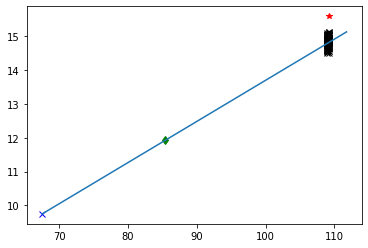

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     187361      1    52  5105  310104  310104  185837   2.142665  23.660259   
      187872      1    52  5105  310104  310104  186349 -18.366503 -15.156229   
      187359      1    52  5105  310104  310104  185835   3.587886  23.579887   
      187641      1    52  5105  310104  310104  186117 -22.323626   8.400296   
      187360      1    52  5105  310104  310104  185836   3.350841  23.617432   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      187503      1    52  5105  310104  310104  185979  -6.960636  23.551105   
      187566      1    52  5105  310104  310104  186042 -18.834465  15.518127   
      188063      1    52  5105  310104  310104  186541   0.241073 -24.407028   
      187108      1    52  5105  310104  310104  185584  23.724577   6.425444   
      187

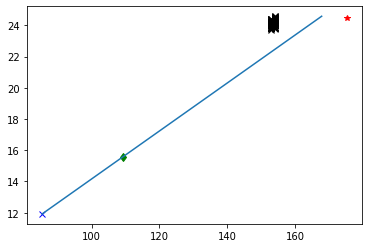

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     213344      1    52  5105  310104  310104  212097   8.153069  35.964886   
      213613      1    52  5105  310104  310104  212369 -35.725506   8.312247   
      213428      1    52  5105  310104  310104  212181 -15.979883  33.239044   
      213761      1    52  5105  310104  310104  212518 -28.910995 -22.878242   
      214203      1    52  5105  310104  310104  212965  36.061626  -6.639362   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      213626      1    52  5105  310104  310104  212382 -36.740803   1.266623   
      213304      1    52  5105  310104  310104  212057   9.405745  35.539436   
      213079      1    52  5105  310104  310104  211830  36.137314   6.622723   
      213132      1    52  5105  310104  310104  211883  33.648582  14.809487   
      214

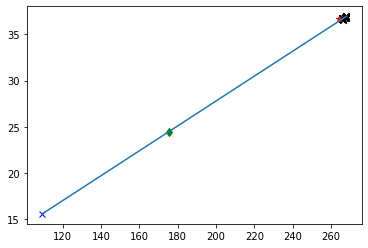

  6%|███████▋                                                                                                              | 13/200 [00:13<03:52,  1.25s/it]

pid -22464.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     30987       1    52  5105  310104  310104   28060 -2.051445  4.726302   
      29244       1    52  5105  310104  310104   26292  4.400022  2.866217   
      29712       1    52  5105  310104  310104   26767 -4.376446  2.814923   
      29756       1    52  5105  310104  310104   26812 -4.834977  1.915007   
      30855       1    52  5105  310104  310104   27926  1.136651  4.972884   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      30784       1    52  5105  310104  310104   27855  3.732477  3.450532   
      29341       1    52  5105  310104  310104   26390  3.256976  3.965851   
      29554       1    52  5105  310104  310104   26607 -1.669853  4.852508   
      31056       1    52  5105  310104  310104   28130 -4.227911  2.729012   
      31034       1    52  5105  

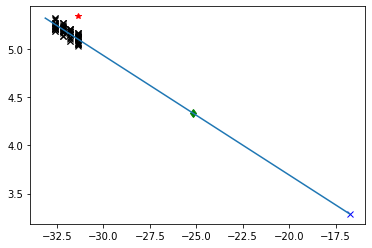

pid -22464.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     143869      1    52  5105  310104  310104  141947 -20.160076 -15.070009   
      144014      1    52  5105  310104  310104  142092  -7.451914 -24.041691   
      143438      1    52  5105  310104  310104  141512   5.781558  24.197880   
      143377      1    52  5105  310104  310104  141451   7.478644  24.028070   
      143624      1    52  5105  310104  310104  141702 -20.569309  14.509412   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      143442      1    52  5105  310104  310104  141516   3.588889  24.545164   
      144226      1    52  5105  310104  310104  142305  17.434528 -18.162855   
      143435      1    52  5105  310104  310104  141509   6.517385  24.081337   
      143641      1    52  5105  310104  310104  141719 -14.240703  20.838018   
      143

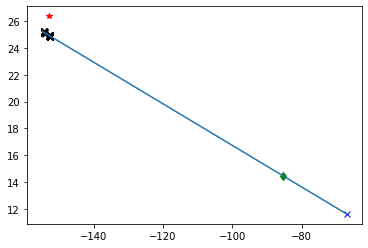

pid -22464.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     153242      1    52  5105  310104  310104  151399 -18.343044  27.689137   
      152960      1    52  5105  310104  310104  151112  32.009659   9.055264   
      153037      1    52  5105  310104  310104  151189  21.923250  25.034508   
      153038      1    52  5105  310104  310104  151190  25.055733  21.902025   
      153391      1    52  5105  310104  310104  151548 -33.260162   1.367565   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      153580      1    52  5105  310104  310104  151737 -18.212547 -28.637415   
      153579      1    52  5105  310104  310104  151736 -18.339556 -28.557610   
      153688      1    52  5105  310104  310104  151845  -3.332748 -33.776882   
      153103      1    52  5105  310104  310104  151259  13.036576  31.549072   
      153

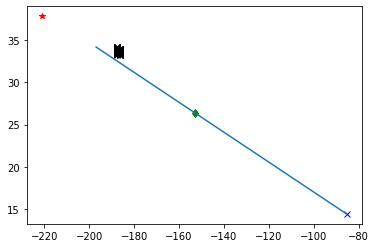

pid -22464.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     172475      1    52  5105  310104  310104  170758 -21.070869 -39.749592   
      172363      1    52  5105  310104  310104  170646 -43.119770 -12.834645   
      172476      1    52  5105  310104  310104  170759 -21.974838 -39.266411   
      171275      1    52  5105  310104  310104  169553   0.090705  45.346294   
      172364      1    52  5105  310104  310104  170647 -43.325874 -12.155217   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      171294      1    52  5105  310104  310104  169572  -1.335721  44.984692   
      171133      1    52  5105  310104  310104  169408  38.147827  23.877167   
      171652      1    52  5105  310104  310104  169931 -30.860617 -32.756645   
      171087      1    52  5105  310104  310104  169362  44.385807   7.416299   
      171

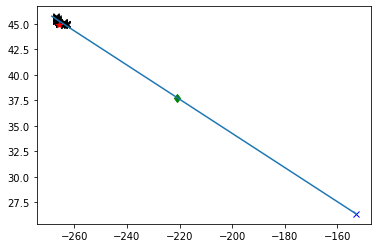

  8%|█████████▍                                                                                                            | 16/200 [00:14<02:15,  1.36it/s]

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     237390      1    52  5105  310104  310104  236466  19.376259 -14.355003   
      237975      1    52  5105  310104  310104  237060 -13.357384 -24.013691   
      237541      1    52  5105  310104  310104  236618  17.331749  21.209526   
      2047        1    52  5105  310104  310104  236394  15.562355 -17.669580   
      237177      1    52  5105  310104  310104  236241  -8.189279 -22.649940   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      236599      1    52  5105  310104  310104  235658  21.123463   9.982849   
      87814       1    52  5105  310104  310104   85352   8.650600 -13.466148   
      237940      1    52  5105  310104  310104  237025 -18.665726 -19.045862   
      237501      1    52  5105  310104  310104  236578  25.116562   9.164801   
      238

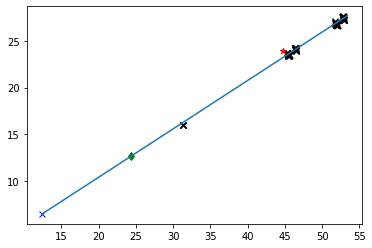

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     261815      1    52  5105  310104  310104  261229  27.716171 -22.395576   
      262036      1    52  5105  310104  310104  261453  12.207611  37.029678   
      262240      1    52  5105  310104  310104  261657 -39.011864  -0.096970   
      261387      1    52  5105  310104  310104  260792  11.281855  33.814770   
      262279      1    52  5105  310104  310104  261696 -33.917133 -19.296888   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      185274      1    52  5105  310104  310104  183676 -56.350971  43.930950   
      185150      1    52  5105  310104  310104  183552 -12.445724  70.360710   
      185322      1    52  5105  310104  310104  183724 -71.290810  -4.817210   
      185609      1    52  5105  310104  310104  184025  64.929535 -29.829397   
      185

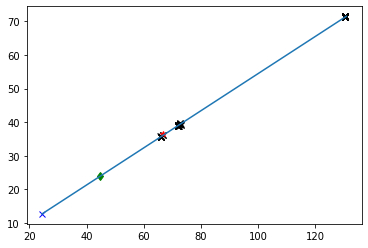

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     185448      1    52  5105  310104  310104  183854 -31.302568 -64.266518   
      185016      1    52  5105  310104  310104  183418  57.569309  42.375854   
      185354      1    52  5105  310104  310104  183759 -66.063515 -27.309803   
      185015      1    52  5105  310104  310104  183417  54.943935  45.726894   
      185216      1    52  5105  310104  310104  183618 -35.046803  62.306297   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      280800      1    52  5105  310104  310104  280484 -53.712952   7.108834   
      280716      1    52  5105  310104  310104  280398 -14.606137  52.289200   
      280827      1    52  5105  310104  310104  280513 -53.702942  -7.165601   
      280922      1    52  5105  310104  310104  280610  -4.178679 -54.131371   
      280

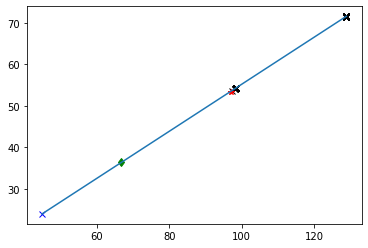

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     288447      1    52  5105  310104  310104  288195  66.230881   8.739479   
      290186      1    52  5105  310104  310104  289957  25.638294  61.689484   
      299049      1    52  5105  310104  310104  298900  66.167343  -9.222120   
      299050      1    52  5105  310104  310104  298901  66.157356  -9.297966   
      297660      1    52  5105  310104  310104  297500  41.183868 -52.604366   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      296626      1    52  5105  310104  310104  296460   5.532847 -66.834595   
      290642      1    52  5105  310104  310104  290417  12.029593  65.979286   
      289715      1    52  5105  310104  310104  289473  43.450417  51.092068   
      289710      1    52  5105  310104  310104  289468  38.056011  55.231339   
      298

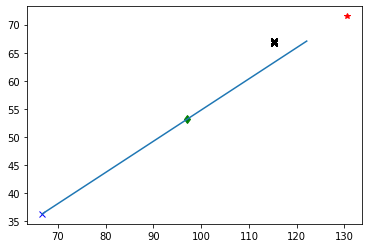

  8%|██████████                                                                                                            | 17/200 [00:15<02:22,  1.28it/s]

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     51203       1    52  5105  310104  310104   48487  13.419439   0.141597   
      50880       1    52  5105  310104  310104   48158 -12.407283  -5.237149   
      50529       1    52  5105  310104  310104   47805   6.697211  11.604159   
      50636       1    52  5105  310104  310104   47912  -3.527153  12.923607   
      50403       1    52  5105  310104  310104   47678  13.502815   0.135410   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      50829       1    52  5105  310104  310104   48106 -12.750715  -3.185997   
      51070       1    52  5105  310104  310104   48349   6.336869 -11.587626   
      50542       1    52  5105  310104  310104   47818   5.472626  12.548188   
      50924       1    52  5105  310104  310104   48202  -8.829856 -10.561219   
      511

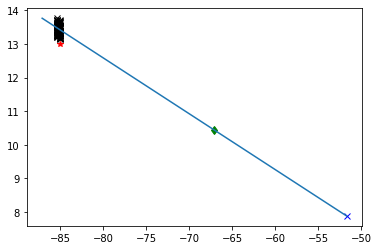

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55577       1    52  5105  310104  310104   52886 -11.309126 -11.408187   
      55438       1    52  5105  310104  310104   52747 -15.802467   2.570038   
      55673       1    52  5105  310104  310104   52983  -1.004406 -15.962398   
      55549       1    52  5105  310104  310104   52858 -12.998338  -9.316709   
      55856       1    52  5105  310104  310104   53166  15.682282  -3.133471   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      55185       1    52  5105  310104  310104   52494  10.011124  11.839995   
      55451       1    52  5105  310104  310104   52760 -15.427612   0.668706   
      55568       1    52  5105  310104  310104   52877 -11.635154 -10.150255   
      55459       1    52  5105  310104  310104   52768 -15.440140  -0.073204   
      144

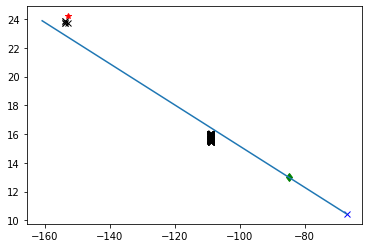

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     153242      1    52  5105  310104  310104  151399 -18.343044  27.689137   
      152960      1    52  5105  310104  310104  151112  32.009659   9.055264   
      153037      1    52  5105  310104  310104  151189  21.923250  25.034508   
      153038      1    52  5105  310104  310104  151190  25.055733  21.902025   
      153391      1    52  5105  310104  310104  151548 -33.260162   1.367565   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      153776      1    52  5105  310104  310104  151933   9.458008 -32.645847   
      153733      1    52  5105  310104  310104  151890   7.789557 -33.274719   
      153778      1    52  5105  310104  310104  151935   7.573704 -33.149773   
      153687      1    52  5105  310104  310104  151844  -6.005835 -33.475697   
      153

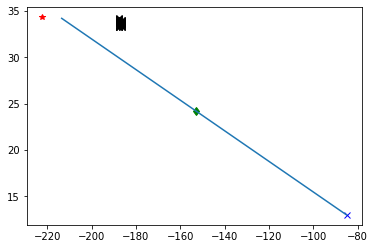

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     170917      1    52  5105  310104  310104  169192  26.036751 -30.583410   
      170826      1    52  5105  310104  310104  169099  16.046082 -36.879734   
      171000      1    52  5105  310104  310104  169275  36.751064 -16.191708   
      170711      1    52  5105  310104  310104  168984 -24.094872 -32.144180   
      170916      1    52  5105  310104  310104  169191  25.955433 -30.664728   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      170648      1    52  5105  310104  310104  168921 -33.306644 -22.244822   
      170537      1    52  5105  310104  310104  168808 -39.850368  -4.555495   
      170093      1    52  5105  310104  310104  168361  39.904560   3.419420   
      170647      1    52  5105  310104  310104  168920 -34.431892 -20.454000   
      170

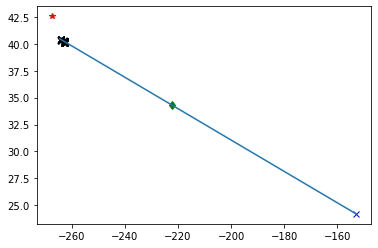

  9%|██████████▌                                                                                                           | 18/200 [00:16<02:30,  1.21it/s]

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     29242       1    52  5105  310104  310104   26290  3.089170  2.231975   
      29723       1    52  5105  310104  310104   26778 -3.262503  1.935895   
      29332       1    52  5105  310104  310104   26381  2.411743  2.928013   
      30503       1    52  5105  310104  310104   27571  3.643124 -1.056571   
      30199       1    52  5105  310104  310104   27259 -0.793469 -3.707306   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      29577       1    52  5105  310104  310104   26630 -1.605076  3.565898   
      30249       1    52  5105  310104  310104   27309  0.261677 -3.661562   
      30279       1    52  5105  310104  310104   27339  0.614839 -3.634235   
      29390       1    52  5105  310104  310104   26440  2.052987  3.360148   
      29345       1    52  5105  

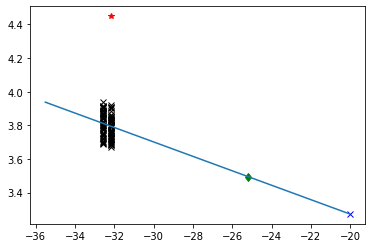

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55633       1    52  5105  310104  310104   52943  -3.286687 -14.189220   
      55884       1    52  5105  310104  310104   53195  14.511723  -0.310141   
      55532       1    52  5105  310104  310104   52841 -13.107123  -6.336892   
      55791       1    52  5105  310104  310104   53101  11.821855  -8.514999   
      55550       1    52  5105  310104  310104   52859 -11.849153  -8.390278   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      55865       1    52  5105  310104  310104   53175  14.050599  -2.234208   
      55665       1    52  5105  310104  310104   52975  -2.001013 -14.667105   
      55142       1    52  5105  310104  310104   52451  13.291663   5.196677   
      55432       1    52  5105  310104  310104   52741 -13.301552   5.159659   
      554

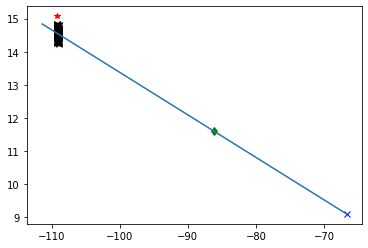

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     64749       1    52  5105  310104  310104   62100 -17.034649  18.099117   
      64991       1    52  5105  310104  310104   62344  -3.449049 -24.727144   
      64529       1    52  5105  310104  310104   61879  24.518234   3.932584   
      65175       1    52  5105  310104  310104   62528  24.822945  -0.380102   
      64899       1    52  5105  310104  310104   62250 -20.986242 -13.472316   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      64615       1    52  5105  310104  310104   61965  15.049327  19.254292   
      64576       1    52  5105  310104  310104   61926  20.858440  12.717937   
      64745       1    52  5105  310104  310104   62096 -15.924354  19.784840   
      64605       1    52  5105  310104  310104   61955  16.800591  17.718475   
      649

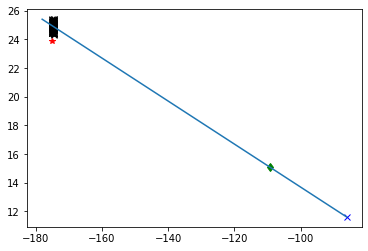

 10%|███████████▏                                                                                                          | 19/200 [00:17<02:32,  1.19it/s]

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     103619      1    52  5105  310104  310104  101338 -3.724434 -3.745914   
      103103      1    52  5105  310104  310104  100816  0.778319  5.224300   
      101887      1    52  5105  310104  310104   99593 -3.617764  3.888232   
      103235      1    52  5105  310104  310104  100949 -2.441003  4.654302   
      101356      1    52  5105  310104  310104   99058  5.277922  0.796708   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      103027      1    52  5105  310104  310104  100740  1.767040  5.082654   
      103032      1    52  5105  310104  310104  100745  0.819844  5.096723   
      102294      1    52  5105  310104  310104  100002 -2.042728 -5.005859   
      102290      1    52  5105  310104  310104   99998 -2.034957 -5.009819   
      102982      1    52  5105  

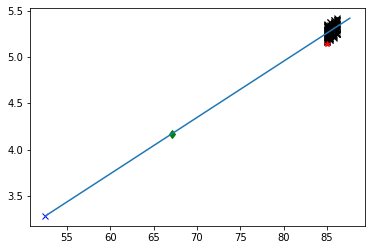

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     106378      1    52  5105  310104  310104  104143 -0.771869  6.447533   
      106699      1    52  5105  310104  310104  104469 -6.485188 -0.598121   
      107570      1    52  5105  310104  310104  105343  4.617107  4.498868   
      106589      1    52  5105  310104  310104  104359 -6.093930  2.310966   
      108381      1    52  5105  310104  310104  106167 -0.529783 -6.445914   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      106101      1    52  5105  310104  310104  103863  5.021391  4.042031   
      107013      1    52  5105  310104  310104  104783 -0.543946 -6.422814   
      106528      1    52  5105  310104  310104  104296 -3.979259  5.041687   
      108488      1    52  5105  310104  310104  106276  3.539928 -5.474556   
      107764      1    52  5105  

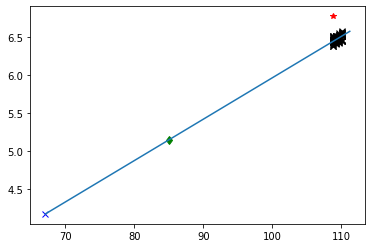

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     113382      1    52  5105  310104  310104  111207  8.673165  2.078608   
      114121      1    52  5105  310104  310104  111952 -1.448838 -8.811973   
      112316      1    52  5105  310104  310104  110133  3.226797  8.237526   
      114272      1    52  5105  310104  310104  112106  7.428320 -4.948394   
      114199      1    52  5105  310104  310104  112033  4.125161 -7.963243   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      112977      1    52  5105  310104  310104  110800 -3.007900 -8.481781   
      114140      1    52  5105  310104  310104  111971  2.368091 -8.458699   
      112248      1    52  5105  310104  310104  110063  3.971525  7.804090   
      112911      1    52  5105  310104  310104  110733 -4.751862 -7.352125   
      114089      1    52  5105  

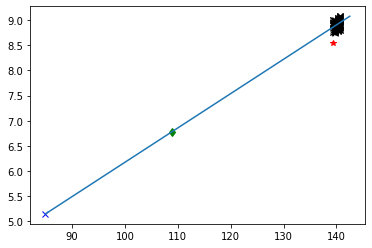

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     116987      1    52  5105  310104  310104  114849 -10.624257   0.287450   
      115756      1    52  5105  310104  310104  113613  -9.554726   4.596212   
      117377      1    52  5105  310104  310104  115243  10.324927  -2.326901   
      116942      1    52  5105  310104  310104  114804 -10.132164   3.200531   
      116795      1    52  5105  310104  310104  114656  -2.883898  10.232357   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      116959      1    52  5105  310104  310104  114821 -10.413928   2.520584   
      117242      1    52  5105  310104  310104  115108   3.213717  -9.989666   
      115891      1    52  5105  310104  310104  113748 -10.339149  -1.648951   
      117010      1    52  5105  310104  310104  114872 -10.493013  -2.399408   
      116

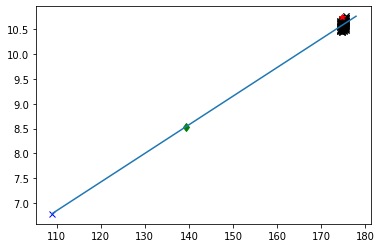

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     121539      1    52  5105  310104  310104  119443  -8.964080  -8.520048   
      121392      1    52  5105  310104  310104  119296 -12.066007   2.932095   
      121402      1    52  5105  310104  310104  119306 -12.022261   2.910611   
      121306      1    52  5105  310104  310104  119210  -8.021400   9.462042   
      121127      1    52  5105  310104  310104  119031   1.661993  12.283846   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      121531      1    52  5105  310104  310104  119435  -9.548440  -8.211699   
      121205      1    52  5105  310104  310104  119109  -2.921656  11.769144   
      121225      1    52  5105  310104  310104  119129  -3.576638  12.132517   
      121217      1    52  5105  310104  310104  119121  -2.933699  11.816550   
      121

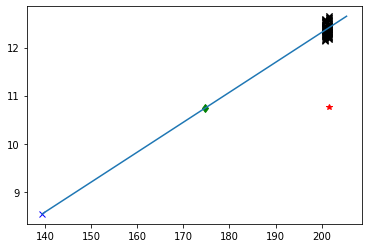

pid -22460.0
final Empty DataFrame
Columns: [run, lumi, evt, nhit, hit_n, hit_id, x, y, z, particle_id, pdg_id, pt, eta, phi, sim_type, sim_id, sim_dxy_sig, sim_pt, sim_eta, sim_phi, volume_id, layer_id, module_id, r, unique_layer_ids, unique_layer_id, discrete_module_id]
Index: []

[0 rows x 27 columns]
distances Series([], dtype: float32)
particle id is -22460
is in mapping True
hit 2 z 230.56900024414062 hit3 z 264.3999938964844
hit 1 layer 26.0 hit 2 lauer 27.0
distance line and correct hit 5.596342749602349
m -0.0020517644391775925  b  11.177384646327267
hit3  264.3999938964844 16.231252670288086


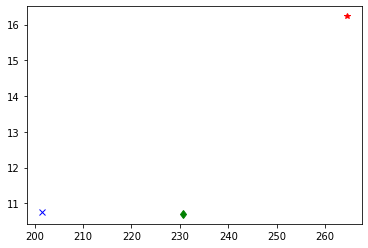

 10%|███████████▊                                                                                                          | 20/200 [00:18<02:50,  1.06it/s]

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     226360      1    52  5105  310104  310104  225221 -22.183207   8.726458   
      27984       1    52  5105  310104  310104   25009   5.288197   7.125828   
      226184      1    52  5105  310104  310104  225043   3.829062  23.543673   
      28327       1    52  5105  310104  310104   25367  -7.940148  -4.320151   
      27657       1    52  5105  310104  310104   24679   4.518666  -7.448837   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      27462       1    52  5105  310104  310104   24482  -4.784089  -7.200754   
      226407      1    52  5105  310104  310104  225270 -23.531160   5.128322   
      27041       1    52  5105  310104  310104   24049  -2.262501   8.345447   
      28508       1    52  5105  310104  310104   25549   5.048803  -7.372315   
      226

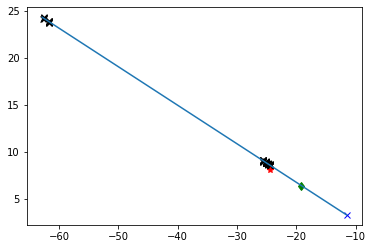

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     32714       1    52  5105  310104  310104   29805  10.288536  -1.968514   
      32611       1    52  5105  310104  310104   29700   6.084421  -8.676649   
      224471      1    52  5105  310104  310104  223322 -24.549568  11.114585   
      225143      1    52  5105  310104  310104  223996  21.775816   8.021909   
      32517       1    52  5105  310104  310104   29604  -0.747865 -10.459335   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224232      1    52  5105  310104  310104  223081  19.973133  18.335819   
      32476       1    52  5105  310104  310104   29563  -4.964481  -9.518917   
      224171      1    52  5105  310104  310104  223020  24.478172  10.956210   
      224423      1    52  5105  310104  310104  223274 -14.992399  22.883322   
      320

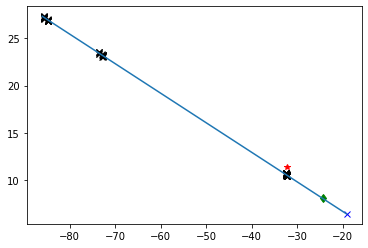

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     226413      1    52  5105  310104  310104  225276 -24.395796   2.660980   
      226166      1    52  5105  310104  310104  225025  13.432481  20.746523   
      226394      1    52  5105  310104  310104  225256 -19.073032  14.598010   
      226523      1    52  5105  310104  310104  225386 -23.084461  -8.426961   
      37143       1    52  5105  310104  310104   34293   2.404905  14.737985   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      226303      1    52  5105  310104  310104  225164  -5.847567  23.216900   
      226525      1    52  5105  310104  310104  225388 -19.786587 -14.421083   
      226550      1    52  5105  310104  310104  225413 -20.055632 -14.316608   
      226393      1    52  5105  310104  310104  225255 -19.410532  14.013443   
      226

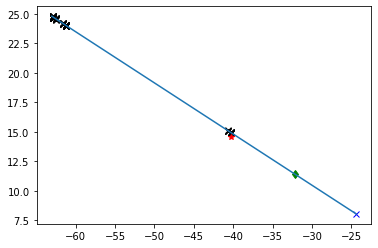

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     225589      1    52  5105  310104  310104  224444 -26.002516  -6.158114   
      225168      1    52  5105  310104  310104  224021  24.581049  10.495989   
      225795      1    52  5105  310104  310104  224650   1.219270 -26.676825   
      225534      1    52  5105  310104  310104  224389 -26.426691   5.760735   
      226081      1    52  5105  310104  310104  224940  19.203316  12.477609   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      225821      1    52  5105  310104  310104  224676  -3.840731 -26.073009   
      225631      1    52  5105  310104  310104  224486 -22.147701 -15.126093   
      226405      1    52  5105  310104  310104  225268 -23.265654   3.385744   
      225322      1    52  5105  310104  310104  224175  12.493711  23.198977   
      225

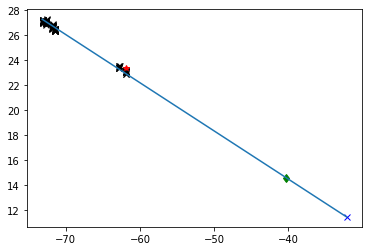

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     139363      1    52  5105  310104  310104  137402  -8.653137  50.486847   
      139352      1    52  5105  310104  310104  137391  -7.356672  50.526642   
      139370      1    52  5105  310104  310104  137409  -0.290083  51.218517   
      139353      1    52  5105  310104  310104  137392  -7.301882  50.531437   
      139700      1    52  5105  310104  310104  137745  39.020905 -33.173141   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      139706      1    52  5105  310104  310104  137751  39.491665 -31.961685   
      139696      1    52  5105  310104  310104  137741  38.991383 -32.684002   
      139650      1    52  5105  310104  310104  137693  14.934792 -48.164505   
      139661      1    52  5105  310104  310104  137704  21.902826 -46.355572   
      139

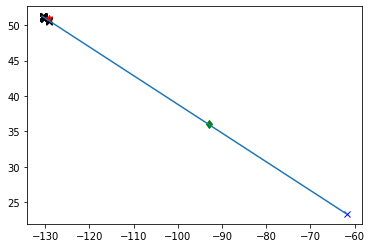

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     150262      1    52  5105  310104  310104  148392  50.718567  35.687794   
      150483      1    52  5105  310104  310104  148615 -35.691723 -50.715622   
      150398      1    52  5105  310104  310104  148530 -55.226154  28.207392   
      150386      1    52  5105  310104  310104  148518 -42.266773  45.399197   
      150328      1    52  5105  310104  310104  148460   2.876164  61.941833   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      150488      1    52  5105  310104  310104  148620 -25.548075 -56.678249   
      150359      1    52  5105  310104  310104  148491 -26.057285  56.441784   
      150345      1    52  5105  310104  310104  148477   0.250820  62.165485   
      150233      1    52  5105  310104  310104  148363  56.568752  24.247614   
      150

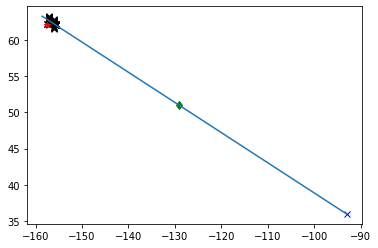

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     159152      1    52  5105  310104  310104  157342 -73.215508 -12.426096   
      159074      1    52  5105  310104  310104  157264 -64.972321  35.965523   
      159127      1    52  5105  310104  310104  157317 -74.150719   4.074100   
      159364      1    52  5105  310104  310104  157556  55.250294 -49.622154   
      159128      1    52  5105  310104  310104  157318 -74.133308   4.384111   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      159045      1    52  5105  310104  310104  157235 -53.268246  51.840065   
      159356      1    52  5105  310104  310104  157548  57.481220 -47.125744   
      159047      1    52  5105  310104  310104  157237 -58.398781  46.098995   
      158991      1    52  5105  310104  310104  157181 -25.363274  69.875343   
      159

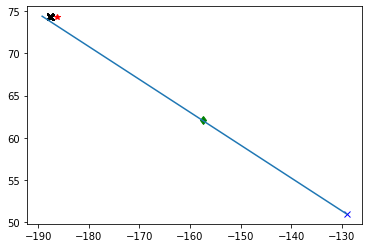

 10%|████████████▍                                                                                                         | 21/200 [00:20<03:22,  1.13s/it]

pid -22456.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     232878      1    52  5105  310104  310104  231823 -23.432167  -6.871529   
      21082       1    52  5105  310104  310104   17999  10.267138  -0.378864   
      233238      1    52  5105  310104  310104  232193  21.472975  16.067276   
      233066      1    52  5105  310104  310104  232017  12.146170 -22.372501   
      18786       1    52  5105  310104  310104   15639 -10.144716   1.151804   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      233344      1    52  5105  310104  310104  232299   9.842590  24.756409   
      21062       1    52  5105  310104  310104   17979   9.877213  -2.840751   
      18530       1    52  5105  310104  310104   15381  -9.962911   4.015461   
      18536       1    52  5105  310104  310104   15387  -9.633587   4.661795   
      210

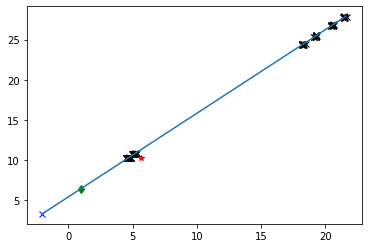

pid -22456.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     23222       1    52  5105  310104  310104   20166 -14.144279   3.078277   
      234469      1    52  5105  310104  310104  233466 -25.232182 -11.157765   
      233678      1    52  5105  310104  310104  232653 -14.410270 -19.589813   
      24408       1    52  5105  310104  310104   21377  -0.020147 -14.493387   
      234514      1    52  5105  310104  310104  233528 -14.257489 -22.659199   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      234618      1    52  5105  310104  310104  233634  -5.481287 -27.213436   
      234075      1    52  5105  310104  310104  233064  26.313381   8.830240   
      233309      1    52  5105  310104  310104  232264  18.982271  16.798832   
      234401      1    52  5105  310104  310104  233394 -26.286854   8.268463   
      234

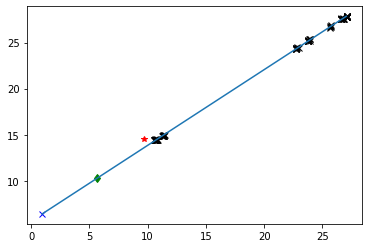

pid -22456.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     233616      1    52  5105  310104  310104  232571 -25.209906  -6.580812   
      233936      1    52  5105  310104  310104  232920  15.105868 -21.225651   
      233427      1    52  5105  310104  310104  232382  -8.978225  24.614311   
      233663      1    52  5105  310104  310104  232638 -16.904112 -20.018250   
      233373      1    52  5105  310104  310104  232328  10.824320  23.696602   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      233904      1    52  5105  310104  310104  232887  15.223667 -21.288254   
      233804      1    52  5105  310104  310104  232785   3.363181 -25.969656   
      233513      1    52  5105  310104  310104  232468 -24.438663   9.643078   
      232527      1    52  5105  310104  310104  231469  21.234257  10.687111   
      233

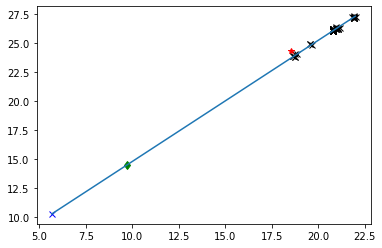

pid -22456.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     258594      1    52  5105  310104  310104  257931 -38.311554  -0.187168   
      258662      1    52  5105  310104  310104  258003 -21.715660 -31.580343   
      258807      1    52  5105  310104  310104  258149  28.812084 -25.248701   
      258595      1    52  5105  310104  310104  257932 -38.328426  -0.048188   
      258457      1    52  5105  310104  310104  257792 -13.304352  35.914471   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      258571      1    52  5105  310104  310104  257908 -39.203136   5.281884   
      258725      1    52  5105  310104  310104  258067  10.045576 -38.261715   
      258390      1    52  5105  310104  310104  257725  18.919962  34.740761   
      258478      1    52  5105  310104  310104  257813 -19.025408  34.685421   
      258

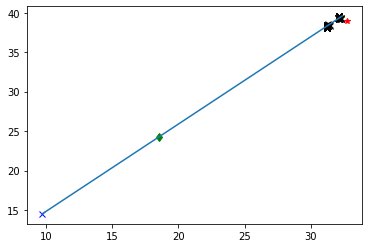

pid -22456.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     301507      1    52  5105  310104  310104  301386 -17.964741  85.396027   
      301508      1    52  5105  310104  310104  301387 -17.788673  85.433449   
      306139      1    52  5105  310104  310104  306071  75.378876 -43.969959   
      306140      1    52  5105  310104  310104  306072  75.306877 -44.094666   
      306141      1    52  5105  310104  310104  306073  75.248375 -44.195992   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      299863      1    52  5105  310104  310104  299718  75.635674  37.342026   
      302298      1    52  5105  310104  310104  302183 -62.648922  61.105824   
      303275      1    52  5105  310104  310104  303172 -87.330788  -5.669447   
      299864      1    52  5105  310104  310104  299719  75.752815  37.078926   
      303

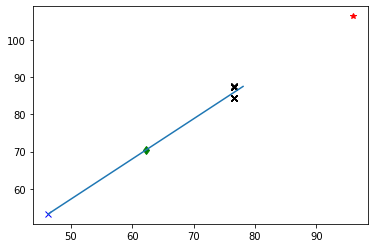

 11%|████████████▉                                                                                                         | 22/200 [00:21<03:34,  1.20s/it]

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     237169      1    52  5105  310104  310104  236232  -6.195827 -25.403490   
      20434       1    52  5105  310104  310104   17321   4.575666  -9.677472   
      19568       1    52  5105  310104  310104   16440  -7.615786  -7.516299   
      236697      1    52  5105  310104  310104  235756  11.598091  22.856281   
      236584      1    52  5105  310104  310104  235643  22.733913  11.767120   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      20231       1    52  5105  310104  310104   17110   2.260280  -9.969151   
      17419       1    52  5105  310104  310104   14256   4.771872   9.016337   
      19080       1    52  5105  310104  310104   15941 -10.562705  -1.708954   
      19596       1    52  5105  310104  310104   16468  -8.148721  -6.983364   
      832

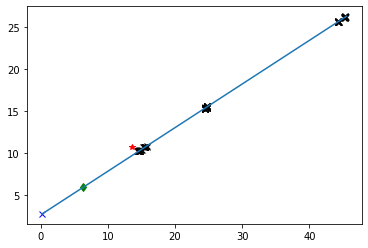

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     235850      1    52  5105  310104  310104  234888  -1.456332  26.625797   
      236431      1    52  5105  310104  310104  235479  22.336784 -14.563152   
      236306      1    52  5105  310104  310104  235350  -0.006332 -25.816366   
      236106      1    52  5105  310104  310104  235149 -25.406158  -4.585058   
      236307      1    52  5105  310104  310104  235351  -0.131332 -25.816366   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      22637       1    52  5105  310104  310104   19573  -8.128242  11.899405   
      236010      1    52  5105  310104  310104  235049 -21.096964  15.091721   
      24442       1    52  5105  310104  310104   21412   0.751570 -14.406436   
      236504      1    52  5105  310104  310104  235562  24.974180  -7.034929   
      226

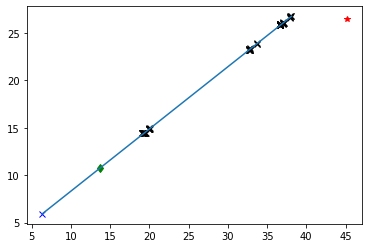

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     281001      1    52  5105  310104  310104  280697  45.294479 -27.136522   
      280986      1    52  5105  310104  310104  280678  39.236382 -34.726421   
      280842      1    52  5105  310104  310104  280530 -47.728134 -22.667219   
      280605      1    52  5105  310104  310104  280287  35.853535  38.833546   
      280862      1    52  5105  310104  310104  280550 -30.892168 -42.830780   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      280919      1    52  5105  310104  310104  280607  -2.063678 -53.429661   
      3320        1    52  5105  310104  310104  280653  35.949799 -39.582005   
      281012      1    52  5105  310104  310104  280708  47.170784 -21.315142   
      280567      1    52  5105  310104  310104  280249  47.103008  22.479509   
      280

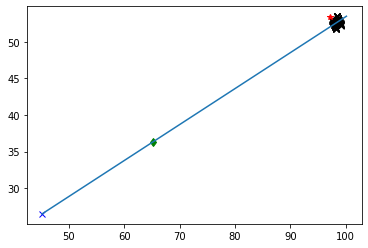

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     288447      1    52  5105  310104  310104  288195  66.230881   8.739479   
      290186      1    52  5105  310104  310104  289957  25.638294  61.689484   
      299049      1    52  5105  310104  310104  298900  66.167343  -9.222120   
      299050      1    52  5105  310104  310104  298901  66.157356  -9.297966   
      297660      1    52  5105  310104  310104  297500  41.183868 -52.604366   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      296626      1    52  5105  310104  310104  296460   5.532847 -66.834595   
      290642      1    52  5105  310104  310104  290417  12.029593  65.979286   
      289715      1    52  5105  310104  310104  289473  43.450417  51.092068   
      289710      1    52  5105  310104  310104  289468  38.056011  55.231339   
      298

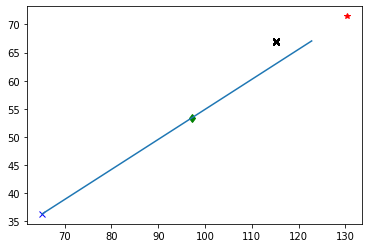

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     196209      1    52  5105  310104  310104  194772  -0.487726  83.066490   
      196128      1    52  5105  310104  310104  194689  68.824051  46.508484   
      196267      1    52  5105  310104  310104  194830 -38.815945  73.434784   
      196266      1    52  5105  310104  310104  194829 -46.338654  68.925842   
      196250      1    52  5105  310104  310104  194813 -31.726099  76.740219   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      196233      1    52  5105  310104  310104  194796 -16.735462  81.312958   
      196200      1    52  5105  310104  310104  194763  15.508681  81.549553   
      196223      1    52  5105  310104  310104  194786  -6.851922  82.705917   
      196220      1    52  5105  310104  310104  194783  -1.310105  82.978165   
      196

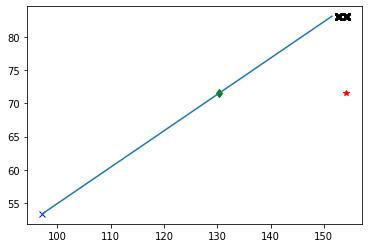

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     202220      1    52  5105  310104  310104  200836  51.503777  46.147247   
      202816      1    52  5105  310104  310104  201432   8.702991 -68.602493   
      202279      1    52  5105  310104  310104  200895  31.808247  61.402596   
      202303      1    52  5105  310104  310104  200919  32.447803  61.065704   
      202163      1    52  5105  310104  310104  200779  68.688538   7.985255   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      202138      1    52  5105  310104  310104  200754  68.695145   7.171276   
      202126      1    52  5105  310104  310104  200742  68.695961   7.157802   
      202823      1    52  5105  310104  310104  201439   1.192719 -69.056778   
      202994      1    52  5105  310104  310104  201617  64.998840 -23.351177   
      202

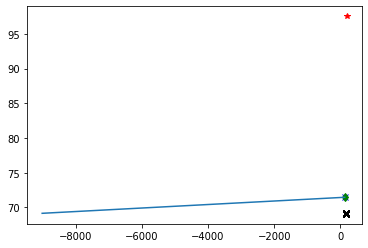

 12%|█████████████▌                                                                                                        | 23/200 [00:22<03:38,  1.24s/it]

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     223218      1    52  5105  310104  310104  222061  18.183195  17.812824   
      30972       1    52  5105  310104  310104   28044  -4.393752   7.663180   
      223388      1    52  5105  310104  310104  222235 -11.965040  22.233158   
      32122       1    52  5105  310104  310104   29206  -4.080266   7.949330   
      32588       1    52  5105  310104  310104   29677   6.430559  -6.341492   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      31241       1    52  5105  310104  310104   28315  -8.233134  -3.206786   
      223157      1    52  5105  310104  310104  222000  22.137304  11.908339   
      223488      1    52  5105  310104  310104  222335 -22.121576  11.935580   
      223663      1    52  5105  310104  310104  222510 -23.611458  -9.770449   
      224

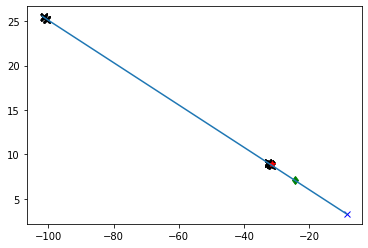

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     36595       1    52  5105  310104  310104   33743  -9.905283  -6.193589   
      224917      1    52  5105  310104  310104  223770  13.032142 -19.654905   
      36567       1    52  5105  310104  310104   33715  -8.441273  -8.068632   
      36400       1    52  5105  310104  310104   33547 -11.162784   3.426380   
      224848      1    52  5105  310104  310104  223701  10.961892 -21.168575   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224147      1    52  5105  310104  310104  222996  20.849312  10.754796   
      36407       1    52  5105  310104  310104   33554 -11.138439   3.915550   
      224690      1    52  5105  310104  310104  223543 -13.284773 -19.627007   
      36382       1    52  5105  310104  310104   33528  -9.457131   6.892751   
      224

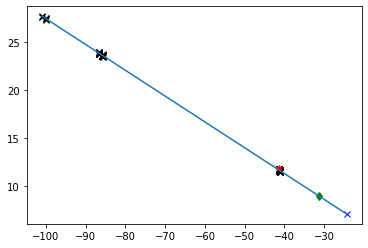

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     224213      1    52  5105  310104  310104  223062  13.766974  20.413965   
      224525      1    52  5105  310104  310104  223377 -23.591877   7.449126   
      224541      1    52  5105  310104  310104  223393 -24.717985   1.062647   
      224245      1    52  5105  310104  310104  223094  13.279273  20.875080   
      41562       1    52  5105  310104  310104   38762   6.107530  13.417807   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      41735       1    52  5105  310104  310104   38941 -14.228017   4.607314   
      224642      1    52  5105  310104  310104  223495 -22.328337 -10.582711   
      224640      1    52  5105  310104  310104  223493 -20.528711 -13.417718   
      41543       1    52  5105  310104  310104   38743   8.255883  12.337600   
      224

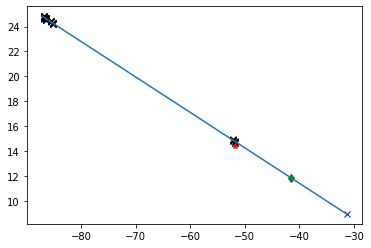

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     225054      1    52  5105  310104  310104  223907  22.944590  -2.386268   
      223717      1    52  5105  310104  310104  222564 -21.387123 -16.522943   
      223296      1    52  5105  310104  310104  222142  11.731096  23.969046   
      223164      1    52  5105  310104  310104  222007  21.568548  15.713796   
      223570      1    52  5105  310104  310104  222417 -27.032883   0.927575   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224094      1    52  5105  310104  310104  222943  22.594294   6.381131   
      223135      1    52  5105  310104  310104  221978  26.674046   2.962636   
      224624      1    52  5105  310104  310104  223477 -21.431717  -9.597394   
      224368      1    52  5105  310104  310104  223217  -8.399008  21.280079   
      224

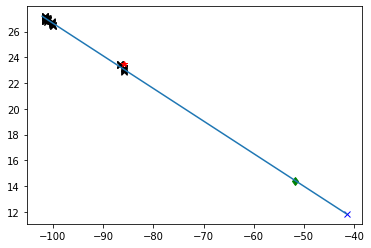

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     136506      1    52  5105  310104  310104  134524  23.319614  26.546833   
      136947      1    52  5105  310104  310104  134967  -6.897177 -34.653301   
      137019      1    52  5105  310104  310104  135039  11.224178 -33.512802   
      136411      1    52  5105  310104  310104  134427  31.704624  15.589508   
      136478      1    52  5105  310104  310104  134496  24.308250  25.510859   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      136729      1    52  5105  310104  310104  134747 -34.477093   8.235627   
      125         1    52  5105  310104  310104  134827 -33.977764 -10.101665   
      136507      1    52  5105  310104  310104  134525  24.378740  25.734137   
      136619      1    52  5105  310104  310104  134637 -14.679841  32.160812   
      136

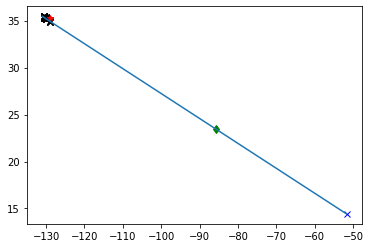

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     147807      1    52  5105  310104  310104  145923  -8.129253 -40.905426   
      147693      1    52  5105  310104  310104  145809 -35.410233 -22.107731   
      147310      1    52  5105  310104  310104  145424  27.964977  30.930702   
      147411      1    52  5105  310104  310104  145527  -5.764339  41.284344   
      147612      1    52  5105  310104  310104  145728 -41.897827   2.528891   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      147641      1    52  5105  310104  310104  145757 -40.951241  -4.656354   
      147640      1    52  5105  310104  310104  145756 -40.962513  -4.541908   
      147468      1    52  5105  310104  310104  145584 -15.179119  38.198776   
      147229      1    52  5105  310104  310104  145343  41.097904  -0.574459   
      148

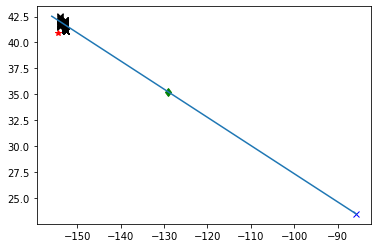

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     155989      1    52  5105  310104  310104  154168 -47.363400  -0.550086   
      155900      1    52  5105  310104  310104  154077 -38.844078  27.053204   
      156242      1    52  5105  310104  310104  154423  41.993546 -22.474379   
      156254      1    52  5105  310104  310104  154435  44.508110 -16.343767   
      155863      1    52  5105  310104  310104  154040 -15.390656  45.103832   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      155834      1    52  5105  310104  310104  154011   5.758252  47.956013   
      156276      1    52  5105  310104  310104  154457  48.173122  -3.553918   
      156190      1    52  5105  310104  310104  154369  13.321754 -46.344631   
      155872      1    52  5105  310104  310104  154049 -15.419607  45.784908   
      155

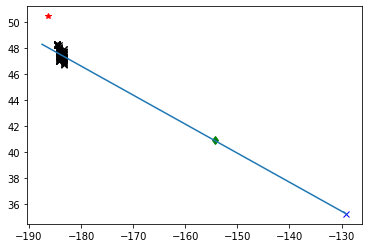

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     165973      1    52  5105  310104  310104  164219 -14.235281 -59.981281   
      165754      1    52  5105  310104  310104  164000  12.706046  60.313946   
      165813      1    52  5105  310104  310104  164059 -36.657143  49.552277   
      165665      1    52  5105  310104  310104  163909  59.341602  16.485695   
      165961      1    52  5105  310104  310104  164207 -23.395378 -56.744991   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      165825      1    52  5105  310104  310104  164071 -49.729668  36.052986   
      165980      1    52  5105  310104  310104  164226 -13.953991 -59.817276   
      165855      1    52  5105  310104  310104  164101 -57.851601  20.638336   
      165814      1    52  5105  310104  310104  164060 -37.501934  48.645000   
      165

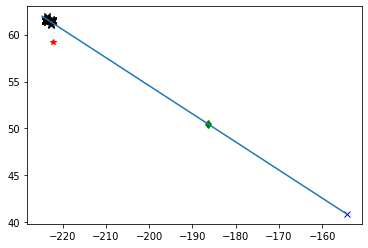

pid -22453.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     175613      1    52  5105  310104  310104  173927  28.303261 -62.931011   
      175334      1    52  5105  310104  310104  173646 -65.856979 -20.597326   
      175132      1    52  5105  310104  310104  173444 -54.420574  42.424229   
      174891      1    52  5105  310104  310104  173199  35.520573  59.158417   
      175589      1    52  5105  310104  310104  173903  12.818808 -67.802757   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      174935      1    52  5105  310104  310104  173245  21.765818  65.492867   
      174856      1    52  5105  310104  310104  173164  46.039902  51.544792   
      175615      1    52  5105  310104  310104  173929  31.873346 -61.324245   
      174864      1    52  5105  310104  310104  173172  49.801003  47.783691   
      175

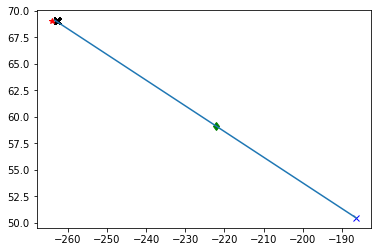

 12%|██████████████▏                                                                                                       | 24/200 [00:24<04:24,  1.50s/it]

pid -22452.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     20121       1    52  5105  310104  310104   16999   1.742931 -10.051091   
      16578       1    52  5105  310104  310104   13402  10.647364   1.174441   
      20362       1    52  5105  310104  310104   17245   3.542750 -10.203770   
      18225       1    52  5105  310104  310104   15072  -6.883973   7.541005   
      18708       1    52  5105  310104  310104   15561  -9.954088   2.355381   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      18972       1    52  5105  310104  310104   15829 -10.585490  -1.565094   
      16822       1    52  5105  310104  310104   13647   9.274871   4.264472   
      17539       1    52  5105  310104  310104   14377   1.540914  10.589320   
      230979      1    52  5105  310104  310104  229903  26.063137   3.358661   
      165

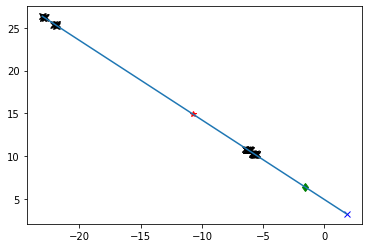

pid -22452.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     231065      1    52  5105  310104  310104  229991  16.542624  20.246506   
      231176      1    52  5105  310104  310104  230102  -4.378850  25.032421   
      231179      1    52  5105  310104  310104  230105  -8.657365  23.703520   
      231413      1    52  5105  310104  310104  230345 -23.032194 -12.393304   
      231137      1    52  5105  310104  310104  230063  -4.646818  25.928537   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      231341      1    52  5105  310104  310104  230273 -26.151564  -0.137739   
      231131      1    52  5105  310104  310104  230057  -4.066818  25.606668   
      231428      1    52  5105  310104  310104  230360 -24.582222  -8.883029   
      1223        1    52  5105  310104  310104  230261 -24.540976   8.996352   
      231

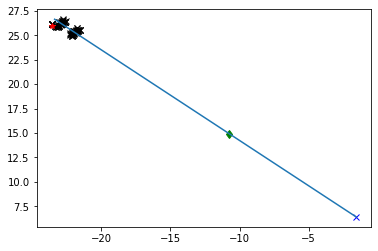

pid -22452.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     256572      1    52  5105  310104  310104  255889 -12.981963 -36.507313   
      256404      1    52  5105  310104  310104  255721 -29.826859  24.656067   
      256534      1    52  5105  310104  310104  255851 -24.702137 -29.748425   
      256147      1    52  5105  310104  310104  255461  36.806923   9.363230   
      256146      1    52  5105  310104  310104  255460  33.691742  17.577356   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      256700      1    52  5105  310104  310104  256019  37.727554 -10.306060   
      256682      1    52  5105  310104  310104  256001  30.622711 -21.565214   
      256346      1    52  5105  310104  310104  255661 -14.751095  36.224586   
      256402      1    52  5105  310104  310104  255719 -33.316792  18.936037   
      256

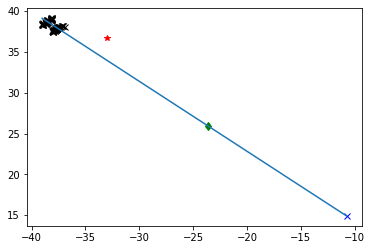

pid -22452.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     276133      1    52  5105  310104  310104  275710  29.354954  43.900440   
      276243      1    52  5105  310104  310104  275822 -52.696373   2.046916   
      276132      1    52  5105  310104  310104  275709  25.942814  45.870438   
      276365      1    52  5105  310104  310104  275944  14.746997 -51.680374   
      276364      1    52  5105  310104  310104  275943  14.730937 -51.577774   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      276075      1    52  5105  310104  310104  275650  53.171738   3.063085   
      276098      1    52  5105  310104  310104  275673  51.027718  15.266260   
      276099      1    52  5105  310104  310104  275674  51.048241  15.209878   
      276300      1    52  5105  310104  310104  275879 -40.507278 -34.816074   
      276

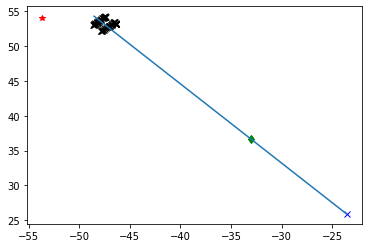

 12%|██████████████▊                                                                                                       | 25/200 [00:25<03:53,  1.34s/it]

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     228159      1    52  5105  310104  310104  227059 -22.075329 -13.745548   
      28947       1    52  5105  310104  310104   25991  -9.894973  -9.398483   
      28858       1    52  5105  310104  310104   25902 -13.522219   3.071291   
      28715       1    52  5105  310104  310104   25756   3.136592  13.527105   
      228347      1    52  5105  310104  310104  227247  10.069862 -23.993456   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228487      1    52  5105  310104  310104  227387  24.906015  -6.012560   
      29121       1    52  5105  310104  310104   26168  13.270578  -3.118862   
      28845       1    52  5105  310104  310104   25887 -11.462242   6.920243   
      28727       1    52  5105  310104  310104   25768   4.460524  13.404198   
      286

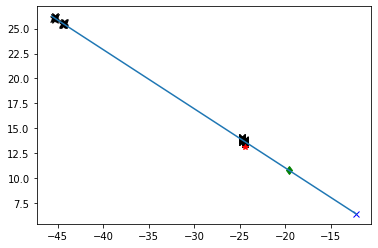

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     228288      1    52  5105  310104  310104  227188   1.403669 -23.411926   
      227456      1    52  5105  310104  310104  226340   1.243670 -26.588074   
      227517      1    52  5105  310104  310104  226401   6.738584 -26.287537   
      227349      1    52  5105  310104  310104  226233 -21.203695 -17.306856   
      227348      1    52  5105  310104  310104  226232 -21.238695 -17.246235   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      226945      1    52  5105  310104  310104  225812  19.682053  18.752161   
      227752      1    52  5105  310104  310104  226638  20.678463  10.753611   
      227457      1    52  5105  310104  310104  226341  -3.416330 -26.588074   
      227516      1    52  5105  310104  310104  226400   5.305552 -26.809118   
      241

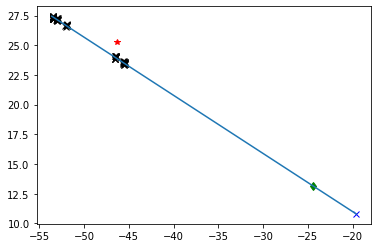

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     253423      1    52  5105  310104  310104  252693  -5.454569  38.974331   
      141008      1    52  5105  310104  310104  139058  63.679222  32.607479   
      253930      1    52  5105  310104  310104  253214  19.853031  30.556923   
      254204      1    52  5105  310104  310104  253496  -4.006889 -36.257473   
      141072      1    52  5105  310104  310104  139122  41.341511  58.379665   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      141151      1    52  5105  310104  310104  139201  -5.576319  71.244896   
      141605      1    52  5105  310104  310104  139663  71.397041  -3.060946   
      141265      1    52  5105  310104  310104  139321 -68.573776  20.109985   
      141399      1    52  5105  310104  310104  139455 -56.936562 -43.183498   
      141

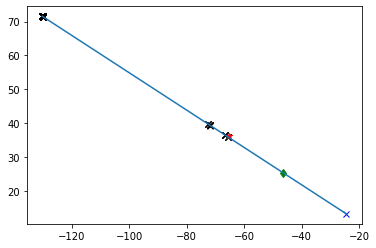

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     273553      1    52  5105  310104  310104  273099 -45.178558 -31.402775   
      3015        1    52  5105  310104  310104  273001 -47.899902  26.943356   
      274097      1    52  5105  310104  310104  273654  50.062115  -9.871847   
      273889      1    52  5105  310104  310104  273441 -46.469131  19.899807   
      273954      1    52  5105  310104  310104  273510 -36.994038 -34.434013   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      141869      1    52  5105  310104  310104  139927 -74.631767  16.126122   
      141751      1    52  5105  310104  310104  139809   8.187746  75.916306   
      141803      1    52  5105  310104  310104  139861 -50.938141  56.882607   
      273404      1    52  5105  310104  310104  272940 -21.306868  50.320385   
      142

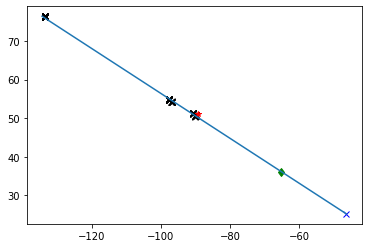

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     141756      1    52  5105  310104  310104  139814   8.462620  75.923645   
      142048      1    52  5105  310104  310104  140110  45.264275 -61.537643   
      142032      1    52  5105  310104  310104  140094  31.451340 -69.615158   
      142065      1    52  5105  310104  310104  140127  61.647949 -45.094418   
      141748      1    52  5105  310104  310104  139806  15.791399  74.721451   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      141936      1    52  5105  310104  310104  139998 -46.867451 -60.178989   
      141830      1    52  5105  310104  310104  139888 -63.177296  42.739433   
      141991      1    52  5105  310104  310104  140053  -2.584687 -76.231697   
      141656      1    52  5105  310104  310104  139714  73.987694  18.529827   
      141

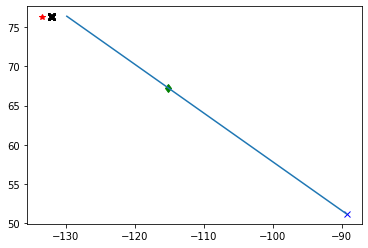

 13%|███████████████▎                                                                                                      | 26/200 [00:27<03:55,  1.35s/it]

pid -22450.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     51487       1    52  5105  310104  310104   48775  0.754731  5.284571   
      53982       1    52  5105  310104  310104   51287  5.151576 -1.263486   
      51951       1    52  5105  310104  310104   49241 -5.328118 -0.318675   
      52601       1    52  5105  310104  310104   49896  5.027144 -1.802485   
      53905       1    52  5105  310104  310104   51210  4.836931 -2.184281   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      51688       1    52  5105  310104  310104   48978 -2.970334  4.510748   
      51833       1    52  5105  310104  310104   49123 -4.955462  1.810854   
      53511       1    52  5105  310104  310104   50809 -3.671807 -3.739432   
      51676       1    52  5105  310104  310104   48966 -2.794540  4.622792   
      51672       1    52  5105  

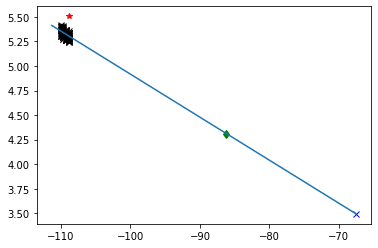

pid -22450.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     60884       1    52  5105  310104  310104   58220  2.996433  8.443101   
      57608       1    52  5105  310104  310104   54930  1.292027  7.019464   
      61287       1    52  5105  310104  310104   58624 -8.880046 -1.197640   
      61282       1    52  5105  310104  310104   58619 -8.901444 -0.998536   
      61088       1    52  5105  310104  310104   58425 -5.856147  6.840794   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      58567       1    52  5105  310104  310104   55893  4.999957 -4.935849   
      61291       1    52  5105  310104  310104   58628 -8.954962 -1.300627   
      57351       1    52  5105  310104  310104   54671  7.206693 -0.970575   
      61005       1    52  5105  310104  310104   58342 -2.743006  8.473104   
      56091       1    52  5105  

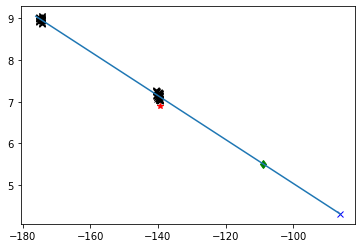

 14%|███████████████▉                                                                                                      | 27/200 [00:27<03:16,  1.13s/it]

pid -22449.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     244563      1    52  5105  310104  310104  243742  14.695517  20.271219   
      243703      1    52  5105  310104  310104  242869  24.293585   6.048089   
      246058      1    52  5105  310104  310104  245264 -17.384590  18.014818   
      249102      1    52  5105  310104  310104  248327  10.259314 -22.843489   
      246828      1    52  5105  310104  310104  246044 -24.337135   4.303816   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      243675      1    52  5105  310104  310104  242841  24.647039   2.546265   
      249078      1    52  5105  310104  310104  248303   7.520455 -23.563665   
      246822      1    52  5105  310104  310104  246038 -24.540304   3.151591   
      245309      1    52  5105  310104  310104  244507   3.947332  24.714750   
      247

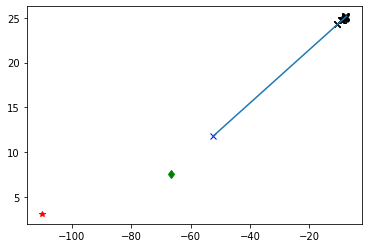

pid -22449.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     242623      1    52  5105  310104  310104  241782  16.820877  20.428623   
      241637      1    52  5105  310104  310104  240788  -3.285728  24.526989   
      243427      1    52  5105  310104  310104  242591  14.975253 -21.706137   
      241714      1    52  5105  310104  310104  240866 -18.241791  16.659149   
      241889      1    52  5105  310104  310104  241046 -24.729271   0.998636   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      241756      1    52  5105  310104  310104  240909 -18.642700  16.374630   
      243096      1    52  5105  310104  310104  242260 -25.126564  -7.648656   
      242143      1    52  5105  310104  310104  241302 -11.930682 -21.758663   
      242122      1    52  5105  310104  310104  241281  -8.930112 -22.958553   
      243

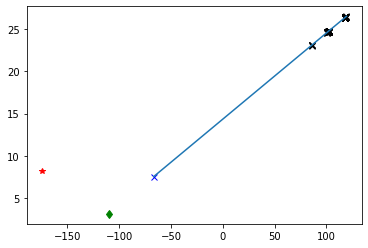

pid -22449.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     65672       1    52  5105  310104  310104   63028  -9.126118   4.787477   
      67266       1    52  5105  310104  310104   64630   7.819921  -6.761036   
      66294       1    52  5105  310104  310104   63651   7.840690  -6.781797   
      66407       1    52  5105  310104  310104   63765  10.222277  -1.746873   
      65813       1    52  5105  310104  310104   63169 -10.213180  -1.389805   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      66623       1    52  5105  310104  310104   63982   0.548197  10.213018   
      65454       1    52  5105  310104  310104   62809   1.023265  10.144295   
      66839       1    52  5105  310104  310104   64200  -9.066645   4.730000   
      65373       1    52  5105  310104  310104   62727   5.439081   8.956719   
      668

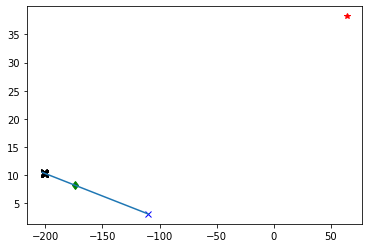

 14%|████████████████▌                                                                                                     | 28/200 [00:28<02:48,  1.02it/s]

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     53612       1    52  5105  310104  310104   50911 -1.210590 -6.285943   
      53953       1    52  5105  310104  310104   51258  6.120629 -1.876266   
      51673       1    52  5105  310104  310104   48963 -3.201441  5.572794   
      53374       1    52  5105  310104  310104   50672 -6.396230  0.191452   
      53463       1    52  5105  310104  310104   50761 -5.803452 -2.690987   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      53065       1    52  5105  310104  310104   50362 -2.153124  6.116091   
      53882       1    52  5105  310104  310104   51187  5.450425 -3.521360   
      52225       1    52  5105  310104  310104   49516 -3.272926 -5.424008   
      51764       1    52  5105  310104  310104   49054 -4.060691  5.158474   
      53825       1    52  5105  

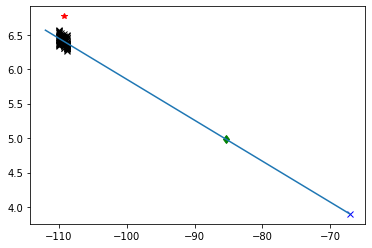

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     59591       1    52  5105  310104  310104   56922   2.004069  -8.852665   
      58151       1    52  5105  310104  310104   55474  -8.351007  -3.404517   
      59559       1    52  5105  310104  310104   56890   2.007471  -8.879799   
      57536       1    52  5105  310104  310104   54856   6.584369   6.155279   
      62344       1    52  5105  310104  310104   59685 -11.617134   1.588258   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      59452       1    52  5105  310104  310104   56783  -4.911760  -7.721434   
      62624       1    52  5105  310104  310104   59966   1.830202 -11.499205   
      58313       1    52  5105  310104  310104   55636  -3.797119  -8.095606   
      62782       1    52  5105  310104  310104   60126  11.366465  -2.916527   
      595

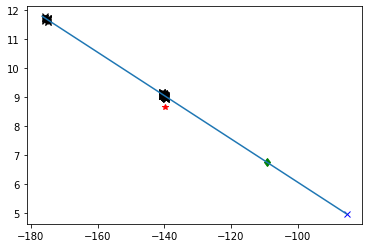

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     61940       1    52  5105  310104  310104   59280  10.237568   3.808681   
      62593       1    52  5105  310104  310104   59935  -0.847128 -10.834203   
      62674       1    52  5105  310104  310104   60018   2.441707 -10.588611   
      62614       1    52  5105  310104  310104   59956   2.469547 -10.631256   
      62452       1    52  5105  310104  310104   59793  -9.536048  -5.237512   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      62507       1    52  5105  310104  310104   59849  -4.603621  -9.986957   
      66546       1    52  5105  310104  310104   63905   9.605391   8.267101   
      66841       1    52  5105  310104  310104   64202 -11.008430   5.637218   
      66845       1    52  5105  310104  310104   64206 -12.676659   0.053484   
      669

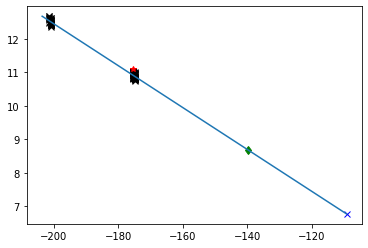

 14%|█████████████████                                                                                                     | 29/200 [00:29<02:36,  1.10it/s]

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     227144      1    52  5105  310104  310104  226017 -20.425081  15.766133   
      227309      1    52  5105  310104  310104  226193 -23.350378 -12.045280   
      227556      1    52  5105  310104  310104  226440  15.100639 -20.876400   
      227644      1    52  5105  310104  310104  226528  25.838417   0.006981   
      27891       1    52  5105  310104  310104   24915  11.280240   3.311597   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      29093       1    52  5105  310104  310104   26139   8.577088  -8.005893   
      27954       1    52  5105  310104  310104   24979  10.091405   6.756871   
      28684       1    52  5105  310104  310104   25725   6.550729   9.735617   
      227649      1    52  5105  310104  310104  226533  25.786589  -2.481829   
      227

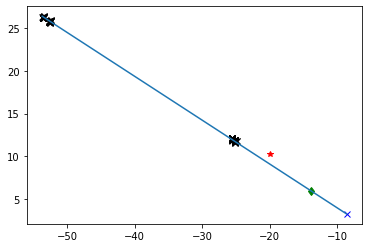

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28845       1    52  5105  310104  310104   25887 -11.462242   6.920243   
      228775      1    52  5105  310104  310104  227675 -11.485328  20.463734   
      28974       1    52  5105  310104  310104   26019  -9.671730  -9.652488   
      228639      1    52  5105  310104  310104  227539  13.560271  19.896313   
      228355      1    52  5105  310104  310104  227255   9.839537 -25.699680   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      28858       1    52  5105  310104  310104   25902 -13.522219   3.071291   
      228580      1    52  5105  310104  310104  227480  18.883438  13.608593   
      229011      1    52  5105  310104  310104  227915 -16.675304 -16.238165   
      228004      1    52  5105  310104  310104  226894 -21.148689  18.006733   
      287

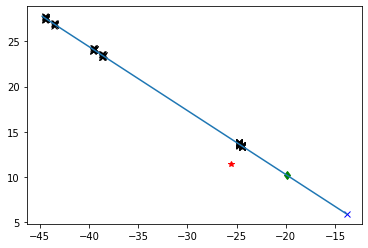

 14%|█████████████████                                                                                                     | 29/200 [00:29<02:55,  1.03s/it]

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     224178      1    52  5105  310104  310104  223027  19.801264  13.336678   
      224637      1    52  5105  310104  310104  223490 -22.407715  -9.035053   
      225080      1    52  5105  310104  310104  223933  23.742168  -2.506594   
      223451      1    52  5105  310104  310104  222298 -17.979971  20.376450   
      225081      1    52  5105  310104  310104  223934  23.732616  -2.560759   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      33199       1    52  5105  310104  310104   30303  -0.013818 -12.763016   
      224456      1    52  5105  310104  310104  223307 -19.040331  14.452110   
      224717      1    52  5105  310104  310104  223570 -13.467323 -19.790113   
      224955      1    52  5105  310104  310104  223808  13.466207 -19.791052   
      224

KeyboardInterrupt: 

In [200]:
num_comp = []
hitids = [] 
not_allowed_pid = [] 
not_in_comp_mod = 0

tries =0 
hitsfound = 0 
for pid in tqdm(np.unique(allowed_pids)[:200]): 
    p = hits[hits['particle_id']==pid].reset_index()
    
    # only use smallest in each layer 
    p = p.iloc[p.groupby('unique_layer_id')['r'].idxmin()]
    for i in range(len(p)-2):
        hit1 = p.iloc[i]
        hit2 = p.iloc[i+1]
        hit3 = p.iloc[i+2]
        

        m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
        b = hit2.r - m*hit2.z
        
        comp_mod = mappings[str(int(hit2.discrete_module_id))]
        comp_hits = hits[hits['discrete_module_id'].isin(comp_mod)]
        comp_hits = comp_hits[comp_hits['unique_layer_id']!=hit2.unique_layer_id]

        
        if (m > 0) & (hit2.z > 0): 
            comp_hits = comp_hits[comp_hits['z'] > (hit2.z )]
        elif (m > 0 ) & (hit2.z < 0): 
            comp_hits = comp_hits[comp_hits['z'] > (hit2.z )]
        elif (m < 0)  & (hit2.z < 0): 
            comp_hits = comp_hits[comp_hits['z'] < (hit2.z) ]
        elif (m < 0) & (hit2.z > 0): 
            comp_hits = comp_hits[comp_hits['z'] < (hit2.z)]
        else: 
            print("youve missed a condition")
   
        
        
        #else: 
        #    comp_hits = comp_hits[(comp_hits['z'] < hit2.z+1) & (comp_hits['unique_layer_id']!=hit2.unique_layer_id)] #|  (hits['z'] == hit2.z))] 
        

        num_comp.append(len(comp_hits))
        
        #comp_hits 
        distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
        num_close = 100
        

        if len(comp_hits) > num_close: 
            idx = np.argpartition(distances, range(num_close))
            final = comp_hits.iloc[idx.values][:num_close]
        else: 
            final = comp_hits 
        
 

        hitids.append(final.hit_id.values)
        if hit3.hit_id in final.hit_id.values: 
            hitsfound += 1 
                
        else: 
            #print("hit1", hit1[['z', 'r']], "hit2", hit2[['z', 'r']], "hit3", hit3[['z', 'r']])
            not_allowed_pid.append(pid)
            if hit3.discrete_module_id not in comp_mod: 
                #print("it wasn't in the comp mods")
                not_in_comp_mod +=1 
                #not_allowed_pid.append(pid)
        

            print("pid", pid)
            print("final", final)
            print("distances", distances)
            #print("idx", idx)
            plt.plot(final.z, final.r, "kx")
            plt.plot(hit1.z, hit1.r, "bx")
            plt.plot(hit2.z, hit2.r, "gd")
            plt.plot(hit3.z, hit3.r, "r*")
            plt.plot()
            y = np.linspace(hit1.r, np.max(final.r), 1000)
            x = (y -b )/m 
            plt.plot(x, y)
            #plt.plot(p.z, p.r, "violet", marker="o")
            print("particle id is", p.particle_id.iloc[0])
            print("is in mapping", hit3.discrete_module_id in comp_mod)
            print("hit 2 z", hit2.z, "hit3 z", hit3.z)
            #plt.plot(p.z, p.r, "gd")
            print("hit 1 layer", hit1.unique_layer_id, "hit 2 lauer", hit2.unique_layer_id)
            print("distance line and correct hit", calc_distance(m, b, hit3.z, hit3.r))
            print("m", m, " b ", b)
            print("hit3 ", hit3.z, hit3.r)

            plt.show()
        tries +=1 
            

In [201]:
hitsfound/tries

0.36649214659685864

In [79]:
tmp = hits.groupby('particle_id')['z']

In [77]:
len(np.where(np.abs(tmp.values) > 100)[0])

13452

In [73]:
len(tmp)

22671

In [151]:
p = hits[hits['particle_id']==-22472].reset_index()
p = p.iloc[p.groupby('unique_layer_id')['r'].idxmin()]
p

entry  subentry  run  lumi   evt    nhit   hit_n  hit_id           x  \
0       4      3699    1    52  5105  310104  310104     251    3.076197   
1       4     10821    1    52  5105  310104  310104    7517    5.859452   
2       4     16612    1    52  5105  310104  310104   13436   10.528881   
3       4     21246    1    52  5105  310104  310104   18166   14.825667   
4       4    243851    1    52  5105  310104  310104  243021   23.915384   
6       4    265673    1    52  5105  310104  310104  265144   36.826527   
10      4    282020    1    52  5105  310104  310104  281732   50.488441   
12      4    288064    1    52  5105  310104  310104  287810   69.964996   
14      4    299168    1    52  5105  310104  310104  299019   84.555000   
16      4    306728    1    52  5105  310104  310104  306664  106.855003   

           y  ...   sim_eta   sim_phi  volume_id  layer_id  module_id  \
0   1.076513  ...  0.304422  0.136548          2         1          4   
1   0.694697  ...  0.304422  0.136548          2         2          4   
2   1.922506  ...  0.304422  0.136548          2         3          5   
3   1.496485  ...  0.304422  0.136548          2         4          5   
4   2.609843  ...  0.304422  0.136548          5         1          5   
6   3.461417  ...  0.304422  0.136548          5         2          7   
10  3.947670  ...  0.304422  0.136548          5         3         10   
12  3.889829  ...  0.304422  0.136548          5         4         14   
14  3.251671  ...  0.304422  0.136548          5         5         15   
16  1.289596  ...  0.304422  0.136548          5         6         15   

             r  unique_layer_ids  unique_layer_id  discrete_module_id  \
0     3.259121                 1                1                 214   
1     5.900490                 2                2                 224   
2    10.702961                 3                3                 235   
3    14.901003                 4                4                 245   
4    24.057367                29               29                5295   
6    36.988842                30               30                5307   
10   50.642540                31               31               53110   
12   70.073044                32               32               53214   
14   84.617500                33               33               53315   
16  106.862785                34               34               53415   

        abs_z  
0    3.897780  
1    2.770973  
2    1.596837  
3    0.300349  
4    3.119730  
6    5.664610  
10  10.911900  
12  17.680901  
14  22.738298  
16  27.763300  

[10 rows x 30 columns]

earlier on it is  True
the module is in fact True
test is  True
early on it is  True
-1.5968374013900757 10.702960968017578


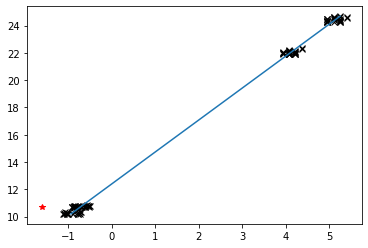

In [156]:
i = 0
hit1 = p.iloc[i]
hit2 = p.iloc[i+1]
hit3 = p.iloc[i+2]

m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
b = hit2.r - m*hit2.z

comp_mod = mappings[str(int(hit2.discrete_module_id))]
comp_hits = hits[hits['discrete_module_id'].isin(comp_mod)]
comp_hits = comp_hits[comp_hits['unique_layer_id']!=hit2.unique_layer_id]
print("earlier on it is ", hit3.hit_id in comp_hits.hit_id.values)
print("the module is in fact", hit3.discrete_module_id in comp_mod)
print("test is ", hit3.hit_id in hits.hit_id.values)
#if m > 0: 
#    comp_hits = comp_hits[(comp_hits['z'] > hit2.z) & (comp_hits['unique_layer_id']!=hit2.unique_layer_id)] #|  (hits['z'] == hit2.z))]
#else: 
#    comp_hits = comp_hits[(comp_hits['z'] < hit2.z) & (comp_hits['unique_layer_id']!=hit2.unique_layer_id)] #|  (hits['z'] == hit2.z))] 


if (m > 0) & (hit2.z > 0): 
    comp_hits = comp_hits[comp_hits['z'] > (hit2.z)]
elif (m > 0 ) & (hit2.z < 0): 
    comp_hits = comp_hits[comp_hits['z'] > (hit2.z)]
elif (m < 0)  & (hit2.z < 0): 
    comp_hits = comp_hits[comp_hits['z'] < (hit2.z) ]
elif (m < 0) & (hit2.z > 0): 
    comp_hits = comp_hits[comp_hits['z'] < (hit2.z)]
else: 
    print("youve missed a condition")

print("early on it is ", hit3.hit_id in comp_hits.hit_id.values)
num_comp.append(len(comp_hits))

#comp_hits 
distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
tmp = list(zip(comp_hits.z.values, comp_hits.r.values, distances))

num_close = 100



if len(comp_hits) > num_close: 
    idx = np.argpartition(distances, range(num_close))
    final = comp_hits.iloc[idx.values][:num_close]
else: 
    final = comp_hits 
plt.plot(final.z, final.r, "kx")
plt.plot(hit3.z, hit3.r, "r*")
#plt.plot(hit2.z, hit2.r, "g*")
y = np.linspace(min(final.r), np.max(final.r), 1000)
x = (y -b )/m 
plt.plot(x, y)
hit3.hit_id in final.hit_id.values
print(hit3.z, hit3.r)
#print(np.unique(final.unique_layer_id))
#print(hit2.unique_layer_id)

In [134]:
[x for x in tmp if (x[0]==154.07949829101562) & (x[1]==71.4810562133789)]

[(154.0795, 71.48106, 0.4249676764011383)]

In [ ]:
[p.groupby('unique_layer_id')['r'].idxmin()

In [179]:
%%time
test = hits.iloc[hits.groupby(['particle_id', 'unique_layer_id'])['r'].min()]

CPU times: user 75.7 ms, sys: 1.36 ms, total: 77.1 ms
Wall time: 74.6 ms


In [186]:
smallest_rs = hits.groupby(['particle_id', 'unique_layer_id'])['r'].min()

In [191]:
%%time
smallest_rs = hits.groupby(['particle_id', 'unique_layer_id'])['r'].min()
test = hits.merge(smallest_rs)

CPU times: user 256 ms, sys: 421 µs, total: 256 ms
Wall time: 256 ms


In [194]:
len(test)

167705

In [178]:
test

run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     7956        1    52  5105  310104  310104    4579 -1.926091 -1.962996   
      9232        1    52  5105  310104  310104    5884  0.734990 -2.650069   
      6913        1    52  5105  310104  310104    3516 -2.658066  0.705147   
      8300        1    52  5105  310104  310104    4927 -1.938953 -1.950134   
      5902        1    52  5105  310104  310104    2477 -0.703493  2.658509   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      5791        1    52  5105  310104  310104    2366 -0.703419  2.658529   
      6810        1    52  5105  310104  310104    3413 -2.658913  0.701987   
      10620       1    52  5105  310104  310104    7313  2.652495 -0.725938   
      10370       1    52  5105  310104  310104    7059  2.661489 -0.692371   
      10623       1    52  5105  310104  310104    7316  2.662361 -0.689119   

                        z  particle_id  ...   sim_eta   sim_phi  volume_id  \
entry subentry                          ...                                  
4     7956      -9.645801       -19734  ... -0.211331 -2.369395          2   
      9232      -2.798380       -18502  ...  0.034363 -1.407785          2   
      6913       0.475547       -18867  ...  0.864903  2.802121          2   
      8300      12.395482        -4428  ...  2.048156 -2.286011          2   
      5902      13.740461        -2276  ...  1.837767  1.641623          2   
...                   ...          ...  ...       ...       ...        ...   
      5791       6.374231       -21503  ...  1.663414  1.789014          2   
      6810      -5.106244       -12380  ... -0.782241  2.875081          2   
      10620      7.207068       -12649  ...  1.068824 -0.355654          2   
      10370     -4.236392       -18736  ... -1.710169 -0.344365          2   
      10623      7.078958        -8780  ...  1.222822 -0.255646          2   

                layer_id  module_id         r  unique_layer_ids  \
entry subentry                                                    
4     7956             1          3  2.750124                 1   
      9232             1          4  2.750105                 1   
      6913             1          5  2.750008                 1   
      8300             1          8  2.750011                 1   
      5902             1          8  2.750013                 1   
...                  ...        ...       ...               ...   
      5791             1          6  2.750013                 1   
      6810             1          4  2.750019                 1   
      10620            1          7  2.750039                 1   
      10370            1          4  2.750073                 1   
      10623            1          7  2.750100                 1   

                unique_layer_id  discrete_module_id      abs_z  
entry subentry                                                  
4     7956                    1                 213   9.645801  
      9232                    1                 214   2.798380  
      6913                    1                 215   0.475547  
      8300                    1                 218  12.395482  
      5902                    1                 218  13.740461  
...                         ...                 ...        ...  
      5791                    1                 216   6.374231  
      6810                    1                 214   5.106244  
      10620                   1                 217   7.207068  
      10370                   1                 214   4.236392  
      10623                   1                 217   7.078958  

[137195 rows x 28 columns]

In [172]:
%%time
hits.loc[hits.groupby(['particle_id', 'unique_layer_id']).r.idxmin().values]

#hits.loc[hits.groupby(['particle_id', 'layer_id']).sim_dxy_sig.idxmin().values]

CPU times: user 20.1 s, sys: 581 ms, total: 20.7 s
Wall time: 19.6 s


run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     196861      1    52  5105  310104  310104  195438  62.436924  84.226776   
      186952      1    52  5105  310104  310104  185414 -91.731224 -39.469582   
      179441      1    52  5105  310104  310104  177774   5.134861  29.158421   
      189826      1    52  5105  310104  310104  188312   5.917335  34.412388   
      198408      1    52  5105  310104  310104  196997   6.723498  39.532276   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      3438        1    52  5105  310104  310104  259109 -36.305023 -14.385275   
      3441        1    52  5105  310104  310104  278426 -47.810726 -18.543636   
      3444        1    52  5105  310104  310104  294293 -62.961094 -23.744251   
      3446        1    52  5105  310104  310104  303349 -82.056129 -29.852676   
      3451        1    52  5105  310104  310104  185175 -93.172264 -33.147110   

                         z  particle_id  ...   sim_eta   sim_phi  volume_id  \
entry subentry                           ...                                  
4     196861    152.589493       -22487  ...  1.229874  0.933150          6   
      186952    130.259506       -22486  ...  1.157146 -2.735039          6   
      179441    131.817993       -22485  ...  2.305398  1.411576          6   
      189826    152.886993       -22485  ...  2.305398  1.411576          6   
      198408    184.701996       -22485  ...  2.305398  1.411576          6   
...                    ...          ...  ...       ...       ...        ...   
      3438       43.209690         1466  ...  1.166339 -2.744219          5   
      3441       61.132988         1466  ...  1.166339 -2.744219          5   
      3444       81.794601         1466  ...  1.166339 -2.744219          5   
      3446      115.163498         1466  ...  1.166339 -2.744219          5   
      3451      132.100494         1466  ...  1.166339 -2.744219          6   

                layer_id  module_id           r  unique_layer_ids  \
entry subentry                                                      
4     196861           2         12  104.845215                41   
      186952           1         43   99.862228                40   
      179441           1          6   29.607100                40   
      189826           2          6   34.917435                41   
      198408           3          7   40.099953                42   
...                  ...        ...         ...               ...   
      3438             2         15   39.051132                30   
      3441             3         21   51.280910                31   
      3444             4         21   67.289589                32   
      3446             5         24   87.317757                33   
      3451             1         40   98.892876                40   

                unique_layer_id  discrete_module_id       abs_z  
entry subentry                                                   
4     196861                 41               64112  152.589493  
      186952                 40               64043  130.259506  
      179441                 40                6406  131.817993  
      189826                 41                6416  152.886993  
      198408                 42                6427  184.701996  
...                         ...                 ...         ...  
      3438                   30               53015   43.209690  
      3441                   31               53121   61.132988  
      3444                   32               53221   81.794601  
      3446                   33               53324  115.163498  
      3451                   40               64040  132.100494  

[137195 rows x 28 columns]

In [168]:
hits[hits['particle_id']==1466]

run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     3432        1    52  5105  310104  310104    3919  -3.273776  -0.339136   
      3431        1    52  5105  310104  310104   10692  -5.956966  -2.342617   
      3433        1    52  5105  310104  310104   20444 -13.885130  -3.918072   
      3434        1    52  5105  310104  310104  232605 -23.651371  -9.604225   
      3435        1    52  5105  310104  310104  232619 -24.049721  -9.805346   
      3436        1    52  5105  310104  310104  233467 -25.584265 -10.333358   
      3437        1    52  5105  310104  310104  233496 -25.718870 -10.347563   
      3438        1    52  5105  310104  310104  259109 -36.305023 -14.385275   
      3439        1    52  5105  310104  310104  259129 -36.388287 -14.416851   
      3441        1    52  5105  310104  310104  278426 -47.810726 -18.543636   
      3440        1    52  5105  310104  310104  278438 -48.064194 -18.641211   
      3442        1    52  5105  310104  310104  278818 -49.606625 -19.170685   
      3443        1    52  5105  310104  310104  278801 -50.406525 -19.456505   
      3444        1    52  5105  310104  310104  294293 -62.961094 -23.744251   
      3445        1    52  5105  310104  310104  294330 -63.132561 -23.800663   
      3446        1    52  5105  310104  310104  303349 -82.056129 -29.852676   
      3447        1    52  5105  310104  310104  303345 -82.228714 -29.904020   
      3451        1    52  5105  310104  310104  185175 -93.172264 -33.147110   
      3450        1    52  5105  310104  310104  185181 -93.169563 -33.155693   
      3448        1    52  5105  310104  310104  185411 -94.055679 -33.512524   
      3449        1    52  5105  310104  310104  185417 -94.060585 -33.499947   

                         z  particle_id  ...   sim_eta   sim_phi  volume_id  \
entry subentry                           ...                                  
4     3432       -9.207341         1466  ...  1.166339 -2.744219          2   
      3431       -4.706003         1466  ...  1.166339 -2.744219          2   
      3433        8.381187         1466  ...  1.166339 -2.744219          2   
      3434       23.646851         1466  ...  1.166339 -2.744219          5   
      3435       23.586880         1466  ...  1.166339 -2.744219          5   
      3436       26.832916         1466  ...  1.166339 -2.744219          5   
      3437       27.073092         1466  ...  1.166339 -2.744219          5   
      3438       43.209690         1466  ...  1.166339 -2.744219          5   
      3439       43.464741         1466  ...  1.166339 -2.744219          5   
      3441       61.132988         1466  ...  1.166339 -2.744219          5   
      3440       60.477505         1466  ...  1.166339 -2.744219          5   
      3442       65.576370         1466  ...  1.166339 -2.744219          5   
      3443       65.071060         1466  ...  1.166339 -2.744219          5   
      3444       81.794601         1466  ...  1.166339 -2.744219          5   
      3445       86.819595         1466  ...  1.166339 -2.744219          5   
      3446      115.163498         1466  ...  1.166339 -2.744219          5   
      3447      115.163498         1466  ...  1.166339 -2.744219          5   
      3451      132.100494         1466  ...  1.166339 -2.744219          6   
      3450      131.920502         1466  ...  1.166339 -2.744219          6   
      3448      130.259506         1466  ...  1.166339 -2.744219          6   
      3449      130.439499         1466  ...  1.166339 -2.744219          6   

                layer_id  module_id          r  unique_layer_ids  \
entry subentry                                                     
4     3432             1          3   3.291295                 1   
      3431             2          4   6.401039                 2   
      3433             4          7  14.427340                

In [ ]:
prop_included = [] 

good_pids = [] 
bad_pids = [] 
for pid in allowed_pids[100:200]: 

    p = hits[hits['particle_id']==pid].reset_index()
    #print(p.iloc[0].sim_pt)
    hit1 = p.iloc[0]
    if np.abs(hit1.z) > 30: 
        continue
    hit2 = p[(p['r'] > hit1.r) & (p['unique_layer_id']!=hit1.unique_layer_id)].iloc[0]
    m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
    b = hit2.r - m*hit2.z
    
    distances = calc_distance(m,b, hits.z, hits.r)
    num_close = 1000
    idx = np.argpartition(distances, range(num_close))
    final = hits.iloc[idx.values][:num_close]
    final = final[final['r'] > hit2.r]
    
    hitsfound = len(final[final['hit_id'].isin(p.hit_id)])/(len(p)-2)
    prop_included.append(hitsfound) 
    if hitsfound > 0.7: 
        good_pids.append(pid)
    elif hitsfound < 0.3: 
        bad_pids.append(pid)
    
    
    y = np.linspace(hit1.r, np.max(p.r), 1000)
    x = (y -b )/m 
    plt.plot(x, y)
    plt.plot(p.z, p.r, "kx")
    plt.plot(final.z, final.r, "b*")
    print(hitsfound)
    print(p.iloc[0].sim_pt)
    plt.show()

In [109]:
idx = np.argpartition(distances, range(num_close))
final = comp_hits.iloc[idx.values][:num_close]
idx

entry  subentry
4      187361      1386
       187300      1391
       187872      1395
       187359      1397
       187360      1400
                   ... 
       196962      2255
       196950      2256
       196964      2257
       196952      2258
       196989      2259
Length: 2260, dtype: int64

In [123]:
distances.iloc[idx.iloc[:100].values]

entry  subentry
4      195436      0.325402
       194803      0.329845
       195360      0.330452
       195264      0.332635
       195304      0.336381
                     ...   
       195442      1.045060
       195237      1.045792
       195292      1.050466
       195242      1.050472
       195375      1.050793
Length: 100, dtype: float32

In [82]:
hits['abs_z'] = np.abs(hits['z'])
tmp = hits.groupby('particle_id')['abs_z'].min()

In [86]:
tmp.values

array([152.5895   , 130.2595   , 131.818    , ...,   4.714409 ,
         2.358342 ,   4.7060027], dtype=float32)

In [90]:
len(np.where(tmp.values > 50)[0])

11612

(array([ 62.,  45., 115., 102., 207., 224., 126., 117.,  43.,  65.]),
 array([-266.038     , -212.68289   , -159.32779   , -105.972694  ,
         -52.617596  ,    0.73750305,   54.0926    ,  107.4477    ,
         160.8028    ,  214.1579    ,  267.513     ], dtype=float32),
 <BarContainer object of 10 artists>)

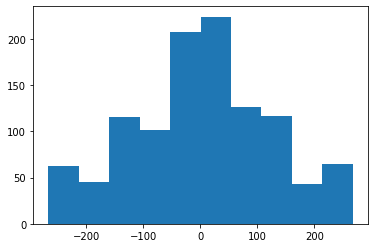

In [91]:
plt.hist(hits[hits['particle_id'].isin(bad_pids)].z)

(array([12., 12., 12., 15., 20.,  6., 15.,  8., 13.,  8.]),
 array([-267.513    , -214.2017   , -160.8904   , -107.5791   ,
         -54.2678   ,   -0.9564972,   52.354805 ,  105.66611  ,
         158.9774   ,  212.28871  ,  265.6      ], dtype=float32),
 <BarContainer object of 10 artists>)

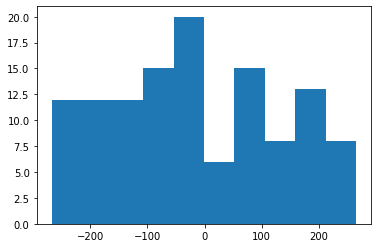

In [92]:
plt.hist(hits[hits['particle_id'].isin(good_pids)].z)

In [4]:
def calc_distance(m, b, point_z, point_r): 
    d = np.abs(m*point_z - point_r +b )/np.sqrt(m**2+1)
    return d

In [5]:
def eval_line_at_point(m, b, z): 
    r = m * z +  b
    return r 

In [8]:
hits['z_2'] = hits.groupby('particle_id')['z'].shift(-1)


In [9]:
hits['diff_z'] = hits['z_2'] - hits['z']


In [10]:
z_0 = hits.groupby('particle_id').min().z
right = z_0[z_0 > 0]
left = z_0[z_0 < 0]

In [11]:
right_particles = hits[hits['particle_id'].isin(right.index)].reset_index()
left_particles = hits[hits['particle_id'].isin(left.index)].reset_index()

In [12]:
ix_right = np.where(right_particles['diff_z'] < 0)[0]
right_particles = right_particles.drop(ix_right + 1, axis = 0)

ix_left = np.where(left_particles['diff_z'] > 0)[0]
left_particles = left_particles.drop(ix_left + 1, axis = 0 )

In [13]:
f = right_particles.append(left_particles)

In [14]:
hits

run  lumi   evt    nhit   hit_n  hit_id          x          y  \
1668      1    89  8805  136545  136545     750   1.945139   1.943948   
1751      1    89  8805  136545  136545     835   1.944333   1.944754   
8226      1    89  8805  136545  136545    7397   2.656227  -0.712008   
5657      1    89  8805  136545  136545    4804  -1.943937  -1.945150   
2048      1    89  8805  136545  136545    1135   1.944278   1.944809   
...     ...   ...   ...     ...     ...     ...        ...        ...   
130819    1    89  8805  136545  136545  130804 -21.959251  12.808491   
65243     1    89  8805  136545  136545   64791  23.471235  -9.765703   
64975     1    89  8805  136545  136545   64523 -24.480110  -6.872338   
79536     1    89  8805  136545  136545   79125   3.377235  25.205433   
79911     1    89  8805  136545  136545   79500  -9.803713 -23.474817   

                 z  particle_id  ...   sim_eta   sim_phi  volume_id  layer_id  \
1668     -8.818335       -16156  ... -1.993133  0.768413          2         1   
1751     -2.842576        -3029  ...  0.007020 -0.066176          2         1   
8226     -0.715824       -14699  ...  0.176146 -0.284227          2         1   
5657      0.912315       -10617  ...  1.037463 -2.392608          2         1   
2048     10.710626       -11587  ...  1.840821  0.819509          2         1   
...            ...          ...  ...       ...       ...        ...       ...   
130819  230.968994        -6894  ...  1.308712  3.027997          3        27   
65243  -175.199997       -17576  ... -2.624437 -0.316705          1        13   
64975  -175.199997       -15286  ... -2.629861 -2.675143          1        13   
79536  -265.200012        -7024  ... -3.017693  1.935381          1        16   
79911  -265.200012        -6123  ... -2.941274 -1.460725          1        16   

        module_id          r  unique_layer_id  discrete_module_id        z_2  \
1668            3   2.750000                1                 213 -25.200001   
1751            4   2.750000                1                 214  -5.200835   
8226            5   2.750000                1                 215  -0.075086   
5657            5   2.750000                1                 215   5.437775   
2048            7   2.750000                1                 217  24.799999   
...           ...        ...              ...                 ...        ...   
130819         20  25.421764               43               32720        NaN   
65243          45  25.421799               17               11345        NaN   
64975          27  25.426458               17               11327        NaN   
79536          11  25.430681               20               11611        NaN   
79911          33  25.439730               20               11633        NaN   

           diff_z  
1668   -16.381666  
1751    -2.358260  
8226     0.640737  
5657     4.525459  
2048    14.089374  
...           ...  
130819        NaN  
65243         NaN  
64975         NaN  
79536         NaN  
79911         NaN  

[136545 rows x 28 columns]

In [156]:
hor_vol = [8, 13, 17]
ver_vol = [7, 9, 12, 14, 16, 18]


In [15]:
len(f)/len(hits)

0.8895821890219342

  0%|                                                                                                                               | 0/200 [00:00<?, ?it/s]

pid -22485.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     179441      1    52  5105  310104  310104  177774   5.134861  29.158421   
      179407      1    52  5105  310104  310104  177740   5.278473  30.249258   
      180161      1    52  5105  310104  310104  178498  24.267282 -16.963413   
      179542      1    52  5105  310104  310104  177875 -10.095335  27.834671   
      180245      1    52  5105  310104  310104  178582  29.144062  -5.243921   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      181783      1    52  5105  310104  310104  180126  16.867661 -34.928379   
      179952      1    52  5105  310104  310104  178289 -12.899309 -26.673227   
      181784      1    52  5105  310104  310104  180127  16.919575 -34.910213   
      179385      1    52  5105  310104  310104  177718  12.834638  26.700014   
      179

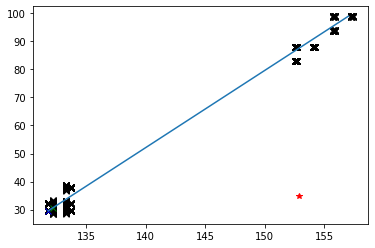

  0%|▌                                                                                                                      | 1/200 [00:00<00:58,  3.42it/s]

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     34728       1    52  5105  310104  310104   31848  5.818281 -0.584924   
      39327       1    52  5105  310104  310104   36502  4.251318  6.763046   
      35671       1    52  5105  310104  310104   32804 -0.902231 -5.605293   
      39891       1    52  5105  310104  310104   37070 -7.012793 -3.996454   
      34132       1    52  5105  310104  310104   31244 -5.516685 -1.657152   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      39244       1    52  5105  310104  310104   36418  6.527345  3.354289   
      35617       1    52  5105  310104  310104   32750 -3.588070 -3.400676   
      39936       1    52  5105  310104  310104   37116 -5.787316 -4.372754   
      2894        1    52  5105  310104  310104   37106 -5.970844 -4.117562   
      41227       1    52  5105  

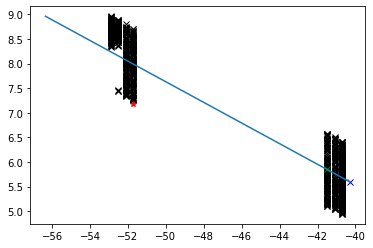

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     44883       1    52  5105  310104  310104   42107   9.166224  -0.896514   
      45855       1    52  5105  310104  310104   43089   9.336953  -0.912776   
      44784       1    52  5105  310104  310104   42008   7.985764  -4.576046   
      50398       1    52  5105  310104  310104   47673  13.282549   0.839711   
      915         1    52  5105  310104  310104   48423  11.118227  -7.160329   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      45809       1    52  5105  310104  310104   43043  10.169965  -3.637517   
      44350       1    52  5105  310104  310104   41572  -7.322847  -2.896691   
      49594       1    52  5105  310104  310104   46861   4.398041  11.307021   
      50069       1    52  5105  310104  310104   47339  -6.211331 -10.320724   
      508

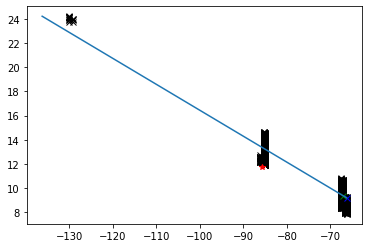

pid -22483.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     170062      1    52  5105  310104  310104  168330  36.573971  -2.747274   
      169699      1    52  5105  310104  310104  167964 -13.374792 -34.150608   
      169876      1    52  5105  310104  310104  168143  17.991724 -31.894773   
      169150      1    52  5105  310104  310104  167409  13.502216  34.106018   
      169698      1    52  5105  310104  310104  167963 -13.242649 -34.196846   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      172927      1    52  5105  310104  310104  171218  -8.641023  51.381157   
      173437      1    52  5105  310104  310104  171730  52.277424  -1.763008   
      173438      1    52  5105  310104  310104  171731  51.652519  -8.905725   
      172958      1    52  5105  310104  310104  171249 -25.349100  45.973186   
      172

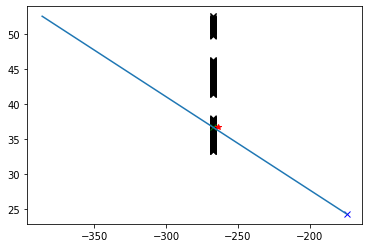

  2%|██▍                                                                                                                    | 4/200 [00:01<01:10,  2.78it/s]

pid -22479.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     44438       1    52  5105  310104  310104   41660 -4.185826 -3.672925   
      43062       1    52  5105  310104  310104   40276 -4.270363 -3.745336   
      44513       1    52  5105  310104  310104   41736 -2.730617 -4.851411   
      43173       1    52  5105  310104  310104   40391 -3.128252 -4.812315   
      48934       1    52  5105  310104  310104   46193 -4.764097 -6.709477   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      44201       1    52  5105  310104  310104   41423 -5.931128  1.915444   
      43606       1    52  5105  310104  310104   40825  6.080036 -1.812188   
      43616       1    52  5105  310104  310104   40835  6.159175  0.989720   
      49296       1    52  5105  310104  310104   46563  6.538345 -3.779707   
      43731       1    52  5105  

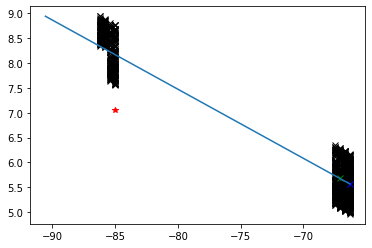

  2%|██▉                                                                                                                    | 5/200 [00:01<01:13,  2.66it/s]

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     262454      1    52  5105  310104  310104  261873  27.942097 -26.645096   
      262480      1    52  5105  310104  310104  261899  28.274437 -27.005150   
      262367      1    52  5105  310104  310104  261784  -6.192220 -38.602898   
      333         1    52  5105  310104  310104  279560 -50.761539  15.907111   
      262170      1    52  5105  310104  310104  261587 -30.172041  24.877377   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      279697      1    52  5105  310104  310104  279361  51.924686  -5.544535   
      279573      1    52  5105  310104  310104  279235 -21.223921 -47.717331   
      279629      1    52  5105  310104  310104  279293  14.413641 -50.196072   
      279499      1    52  5105  310104  310104  279157 -50.726925  -4.473674   
      279

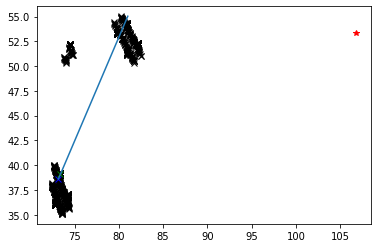

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     281444      1    52  5105  310104  310104  281144  38.494362 -36.890839   
      281435      1    52  5105  310104  310104  281134  38.830830 -37.186218   
      281265      1    52  5105  310104  310104  280961 -53.201370   3.496321   
      281418      1    52  5105  310104  310104  281115  23.499170 -47.864395   
      281400      1    52  5105  310104  310104  281096   5.854206 -52.989830   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      290179      1    52  5105  310104  310104  289948  27.993780  60.908638   
      296625      1    52  5105  310104  310104  296459   6.460839 -66.712425   
      289711      1    52  5105  310104  310104  289469  38.969955  54.530048   
      288847      1    52  5105  310104  310104  288599  61.079433  27.581448   
      294

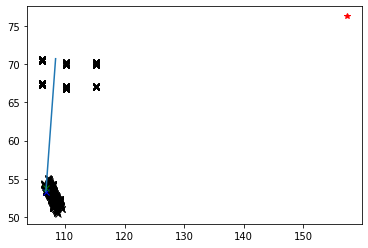

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x  \
entry subentry                                                       
4     195445      1    52  5105  310104  310104  193992  66.285034   
      195446      1    52  5105  310104  310104  193993  66.283943   
      195453      1    52  5105  310104  310104  194000  66.274162   
      195444      1    52  5105  310104  310104  193991  66.376595   
      195452      1    52  5105  310104  310104  193999  66.379585   
...             ...   ...   ...     ...     ...     ...        ...   
      196979      1    52  5105  310104  310104  195560 -20.455425   
      196974      1    52  5105  310104  310104  195555 -35.016396   
      196977      1    52  5105  310104  310104  195558 -34.978668   
      196983      1    52  5105  310104  310104  195566  25.476234   
      196984      1    52  5105  310104  310104  195567  25.546703   

                         y           z  particle_id  ...    sim_pt   s

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide


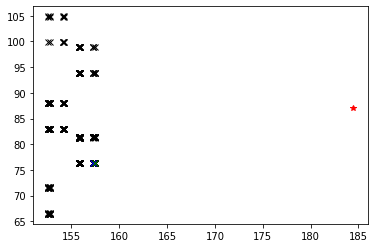

pid -22478.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x  \
entry subentry                                                       
4     204204      1    52  5105  310104  310104  202856  60.740437   
      204212      1    52  5105  310104  310104  202864  60.770657   
      204255      1    52  5105  310104  310104  202907  79.539345   
      204250      1    52  5105  310104  310104  202902  79.551376   
      204249      1    52  5105  310104  310104  202901  79.572151   
...             ...   ...   ...     ...     ...     ...        ...   
      204835      1    52  5105  310104  310104  203505  -3.792525   
      204844      1    52  5105  310104  310104  203514  40.327858   
      204842      1    52  5105  310104  310104  203512  40.516506   
      204838      1    52  5105  310104  310104  203508   7.321999   
      204837      1    52  5105  310104  310104  203507   7.416418   

                         y           z  particle_id  ...    sim_pt   s

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide


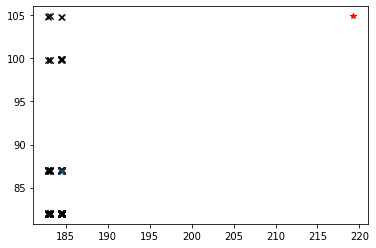

  4%|████▊                                                                                                                  | 8/200 [00:03<01:22,  2.32it/s]

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     85263       1    52  5105  310104  310104   82771   4.798038  3.116317   
      83796       1    52  5105  310104  310104   81281   4.932115  3.201865   
      85599       1    52  5105  310104  310104   83108  -3.128259  4.788238   
      85399       1    52  5105  310104  310104   82907   1.011925  5.467398   
      84672       1    52  5105  310104  310104   82171  -2.698717 -5.222190   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      85102       1    52  5105  310104  310104   82609   5.287028 -0.803212   
      85610       1    52  5105  310104  310104   83119  -3.161025  4.113781   
      241297      1    52  5105  310104  310104  240443  25.288671 -6.729295   
      90983       1    52  5105  310104  310104   88577  -6.336065  7.688543   
      85182       1  

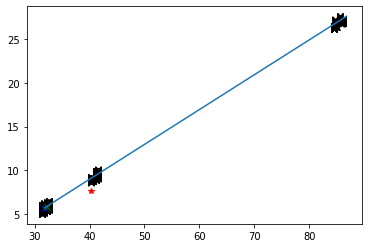

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     100557      1    52  5105  310104  310104   98252  11.315448   7.194877   
      100583      1    52  5105  310104  310104   98278  11.418778   7.257659   
      101030      1    52  5105  310104  310104   98726  -7.372366 -11.199940   
      180461      1    52  5105  310104  310104  178798  -5.149262  32.294018   
      335         1    52  5105  310104  310104  240935 -20.172457  12.773247   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      242116      1    52  5105  310104  310104  241275  -9.276837 -23.282557   
      179256      1    52  5105  310104  310104  177589  31.153164   8.217310   
      99785       1    52  5105  310104  310104   97472  -0.307229  12.658104   
      101201      1    52  5105  310104  310104   98899   8.960620  -8.764915   
      241

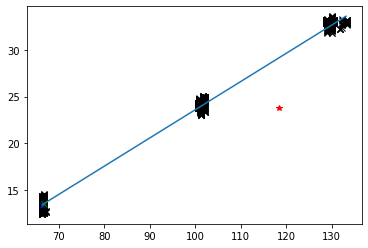

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     242607      1    52  5105  310104  310104  241766  20.263762  12.535607   
      178137      1    52  5105  310104  310104  176466   7.761155  24.998308   
      243126      1    52  5105  310104  310104  242290 -23.578323  -3.435804   
      243125      1    52  5105  310104  310104  242289 -23.568773  -3.489968   
      242726      1    52  5105  310104  310104  241886   7.399430  22.652067   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      3084        1    52  5105  310104  310104  176438  12.882589  21.274622   
      178659      1    52  5105  310104  310104  176990 -20.852160 -14.226562   
      179157      1    52  5105  310104  310104  177490  24.778252  -2.117235   
      179076      1    52  5105  310104  310104  177409  25.338577 -10.076780   
      178

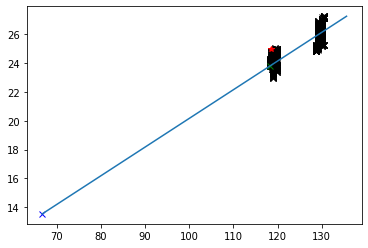

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     242607      1    52  5105  310104  310104  241766  20.263762  12.535607   
      242579      1    52  5105  310104  310104  241738  21.275179  13.119550   
      243126      1    52  5105  310104  310104  242290 -23.578323  -3.435804   
      243125      1    52  5105  310104  310104  242289 -23.568773  -3.489968   
      242726      1    52  5105  310104  310104  241886   7.399430  22.652067   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      243035      1    52  5105  310104  310104  242199 -27.125784   0.400704   
      242708      1    52  5105  310104  310104  241868  10.852974  20.386908   
      265151      1    52  5105  310104  310104  264611 -34.863636   8.357294   
      243034      1    52  5105  310104  310104  242198 -27.081503   0.651831   
      243

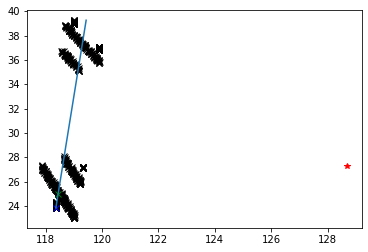

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     177968      1    52  5105  310104  310104  176292  23.409967  14.346592   
      177984      1    52  5105  310104  310104  176308  23.216171  14.242236   
      178254      1    52  5105  310104  310104  176583  -2.114044  27.155216   
      191416      1    52  5105  310104  310104  189906  41.132187  -0.174189   
      178608      1    52  5105  310104  310104  176939 -21.357069 -18.182152   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      178322      1    52  5105  310104  310104  176651 -15.266886  22.694086   
      191721      1    52  5105  310104  310104  190211 -22.614847  34.752110   
      191565      1    52  5105  310104  310104  190055  15.089579  39.253941   
      178163      1    52  5105  310104  310104  176492   7.432746  26.312817   
      179

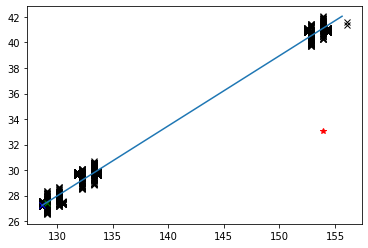

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     207884      1    52  5105  310104  310104  206575  41.469795  24.076653   
      207894      1    52  5105  310104  310104  206585  41.793240  24.249537   
      208424      1    52  5105  310104  310104  207119  45.731197 -15.596668   
      208357      1    52  5105  310104  310104  207052  21.330378 -43.353561   
      208423      1    52  5105  310104  310104  207118  45.702168 -15.692362   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      207274      1    52  5105  310104  310104  205964 -10.809340  44.176907   
      221178      1    52  5105  310104  310104  219986  76.017555 -30.930855   
      221108      1    52  5105  310104  310104  219912  45.956409 -67.990486   
      207345      1    52  5105  310104  310104  206035 -25.190609  37.409901   
      220

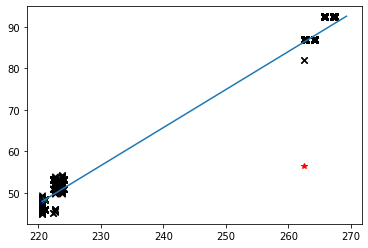

pid -22475.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     217708      1    52  5105  310104  310104  216486  49.071117  27.754511   
      217705      1    52  5105  310104  310104  216483  50.004009  28.337915   
      217903      1    52  5105  310104  310104  216681 -41.556671  38.096596   
      217805      1    52  5105  310104  310104  216583   2.436632  56.324154   
      218214      1    52  5105  310104  310104  216994  44.096016 -35.123409   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      219307      1    52  5105  310104  310104  218091 -63.596161   8.242370   
      219041      1    52  5105  310104  310104  217825  15.861223  62.136532   
      219102      1    52  5105  310104  310104  217886 -23.256807  59.764935   
      218845      1    52  5105  310104  310104  217628  62.125988  15.918783   
      219

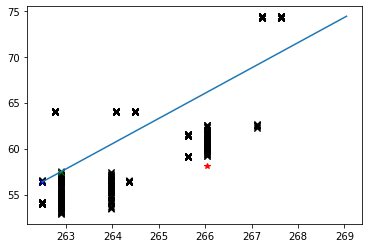

  4%|█████▎                                                                                                                 | 9/200 [00:05<02:30,  1.27it/s]

pid -22474.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     97575       1    52  5105  310104  310104   95238 -4.705834 -1.506896   
      97486       1    52  5105  310104  310104   95148 -4.747747 -1.520177   
      102472      1    52  5105  310104  310104  100181  0.658481 -6.962171   
      97199       1    52  5105  310104  310104   94860 -2.792803  4.129285   
      102619      1    52  5105  310104  310104  100328  4.631151 -5.239303   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      98806       1    52  5105  310104  310104   96477 -5.593727  0.295956   
      97716       1    52  5105  310104  310104   95382 -1.387954 -4.049011   
      97442       1    52  5105  310104  310104   95104 -5.647868 -0.700900   
      103340      1    52  5105  310104  310104  101054 -4.299056  4.466047   
      97975       1    52  5105  

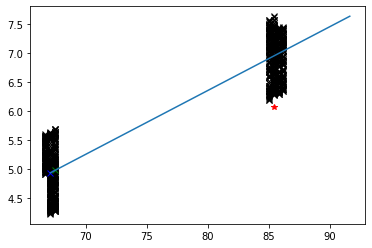

  5%|█████▉                                                                                                                | 10/200 [00:06<02:49,  1.12it/s]

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     14545       1    52  5105  310104  310104   11303  -3.657120  -5.260817   
      234364      1    52  5105  310104  310104  233356 -21.973269   9.836262   
      17673       1    52  5105  310104  310104   14512   0.236890  10.795856   
      13132       1    52  5105  310104  310104    9863  -5.198377   3.738492   
      20454       1    52  5105  310104  310104   17345   3.927230 -10.007867   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      235437      1    52  5105  310104  310104  234465  -0.211332 -26.079891   
      20443       1    52  5105  310104  310104   17333   6.141318  -8.879733   
      234825      1    52  5105  310104  310104  233843  24.227518  -4.832296   
      16454       1    52  5105  310104  310104   13274   6.419216  -0.273523   
      123

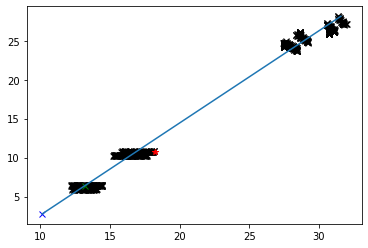

pid -22471.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     236205      1    52  5105  310104  310104  235249 -17.357676 -19.136055   
      236172      1    52  5105  310104  310104  235216 -17.624050 -19.422392   
      235933      1    52  5105  310104  310104  234971  -7.860582  24.612186   
      235739      1    52  5105  310104  310104  234773  21.840796  13.803366   
      235823      1    52  5105  310104  310104  234861   7.848991  24.616405   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      236316      1    52  5105  310104  310104  235360   4.313668 -23.783632   
      236182      1    52  5105  310104  310104  235226 -18.868361 -15.724745   
      235742      1    52  5105  310104  310104  234776  18.447897  15.614572   
      236494      1    52  5105  310104  310104  235552  24.365078  -1.764084   
      235

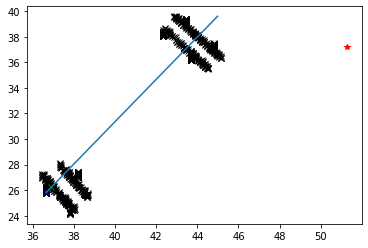

  6%|███████                                                                                                               | 12/200 [00:07<02:03,  1.52it/s]

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     89689       1    52  5105  310104  310104   87258   0.614139  5.980423   
      88239       1    52  5105  310104  310104   85785   0.633775  6.150959   
      94060       1    52  5105  310104  310104   91685  -4.022494  7.345242   
      93978       1    52  5105  310104  310104   91602  -1.131720  8.298021   
      95231       1    52  5105  310104  310104   92874  -2.126332  8.278471   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      89794       1    52  5105  310104  310104   87363  -2.751883  6.200370   
      95432       1    52  5105  310104  310104   93075  -9.124114  2.276683   
      89516       1    52  5105  310104  310104   87084   4.521569  2.648351   
      243086      1    52  5105  310104  310104  242250 -22.652981 -6.476312   
      88463       1  

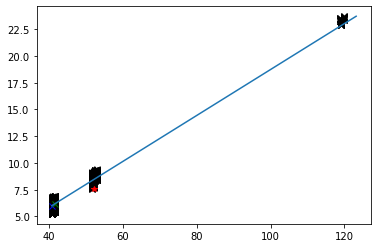

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     104304      1    52  5105  310104  310104  102033   1.328875  12.018705   
      105325      1    52  5105  310104  310104  103072   1.306378  11.848311   
      187405      1    52  5105  310104  310104  185881  -6.081794  25.709879   
      187670      1    52  5105  310104  310104  186146 -26.319193   2.234737   
      2862        1    52  5105  310104  310104  186678  20.897167 -16.152472   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      187954      1    52  5105  310104  310104  186432 -14.000802 -20.704865   
      187288      1    52  5105  310104  310104  185764   9.904062  23.039227   
      104286      1    52  5105  310104  310104  102015   2.602045  10.427284   
      187394      1    52  5105  310104  310104  185870  -6.693287  26.949785   
      187

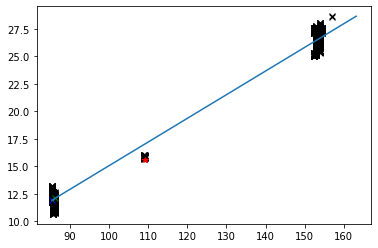

pid -22470.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     109895      1    52  5105  310104  310104  107696   1.777493  15.483856   
      110005      1    52  5105  310104  310104  107806 -12.863110   8.685549   
      110046      1    52  5105  310104  310104  107847 -12.951557   8.678862   
      110127      1    52  5105  310104  310104  107928 -15.575516   0.080807   
      109846      1    52  5105  310104  310104  107647   7.733274  13.547800   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      110203      1    52  5105  310104  310104  108005 -10.993406  -5.822241   
      187452      1    52  5105  310104  310104  185928  -8.359436  23.789585   
      109147      1    52  5105  310104  310104  106936 -10.706349   6.679070   
      187820      1    52  5105  310104  310104  186296 -20.028414 -15.328412   
      110

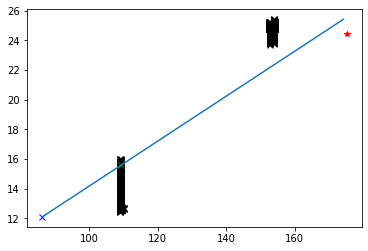

  6%|███████▋                                                                                                              | 13/200 [00:08<02:16,  1.37it/s]

pid -22468.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     59381       1    52  5105  310104  310104   56711  -9.099682  -7.819070   
      59207       1    52  5105  310104  310104   56536 -11.360429   3.850523   
      59705       1    52  5105  310104  310104   57037   8.906616  -7.957242   
      63217       1    52  5105  310104  310104   60562 -14.363976   8.056566   
      68767       1    52  5105  310104  310104   66143 -18.306721  -7.497769   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      59347       1    52  5105  310104  310104   56676 -10.242234  -4.115293   
      58877       1    52  5105  310104  310104   56204   9.191116   6.203349   
      63077       1    52  5105  310104  310104   60422  -2.466295  15.366743   
      63724       1    52  5105  310104  310104   61069  15.559161   0.321403   
      634

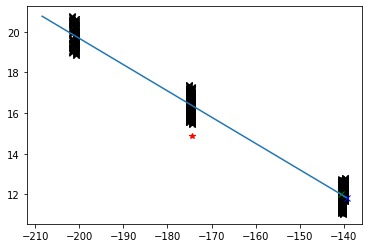

  7%|████████▎                                                                                                             | 14/200 [00:08<02:01,  1.53it/s]

pid -22467.0
final                 run  lumi   evt    nhit   hit_n  hit_id           x  \
entry subentry                                                        
4     302426      1    52  5105  310104  310104  302311  -67.720764   
      299629      1    52  5105  310104  310104  299482   82.144157   
      302425      1    52  5105  310104  310104  302310  -68.403183   
      304251      1    52  5105  310104  310104  304173  -41.431263   
      301807      1    52  5105  310104  310104  301686  -26.740585   
...             ...   ...   ...     ...     ...     ...         ...   
      307196      1    52  5105  310104  310104  307136   78.570816   
      307745      1    52  5105  310104  310104  307708  -21.300930   
      310025      1    52  5105  310104  310104  310025  105.534447   
      308814      1    52  5105  310104  310104  308797 -101.981285   
      309508      1    52  5105  310104  310104  309496   14.243514   

                         y           z  particle_id  ... 

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


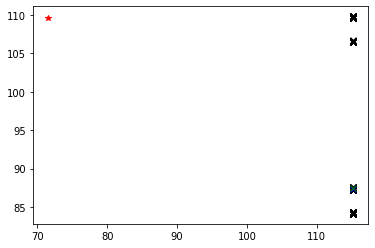

  8%|████████▊                                                                                                             | 15/200 [00:08<01:37,  1.89it/s]/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     83647       1    52  5105  310104  310104   81131   8.999292  -8.891006   
      83623       1    52  5105  310104  310104   81107   9.224060  -9.105622   
      236249      1    52  5105  310104  310104  235293  -3.926605 -24.066227   
      83668       1    52  5105  310104  310104   81153  11.988763  -4.931048   
      235731      1    52  5105  310104  310104  234765  20.573513  11.443573   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      83482       1    52  5105  310104  310104   80953 -11.926162  -9.444793   
      237124      1    52  5105  310104  310104  236187 -15.738495 -20.341175   
      82887       1    52  5105  310104  310104   80348  -2.320507 -11.075593   
      87351       1    52  5105  310104  310104   84882  14.170461   6.993118   
      236

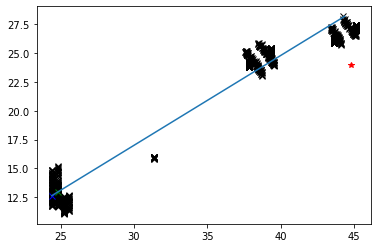

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     237348      1    52  5105  310104  310104  236418  17.290010 -16.539286   
      237316      1    52  5105  310104  310104  236382  17.482382 -16.721872   
      236974      1    52  5105  310104  310104  236037 -23.722258   7.821827   
      236676      1    52  5105  310104  310104  235735  18.827400  16.815752   
      236944      1    52  5105  310104  310104  236006 -21.899065   9.636972   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      261223      1    52  5105  310104  310104  260627  36.661774   0.175569   
      554         1    52  5105  310104  310104  260744  21.840488  31.534458   
      260744      1    52  5105  310104  310104  260139  -4.386526  37.213207   
      261850      1    52  5105  310104  310104  261267  37.899982 -10.430828   
      260

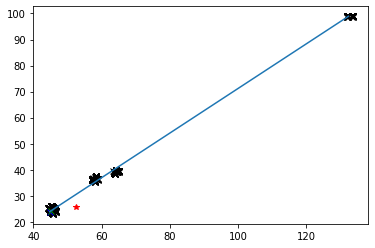

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     238123      1    52  5105  310104  310104  237218  18.599005 -17.609228   
      237550      1    52  5105  310104  310104  236627  19.130070  17.378702   
      181500      1    52  5105  310104  310104  179841 -38.945530  12.494024   
      181291      1    52  5105  310104  310104  179632  17.549461  36.710289   
      182437      1    52  5105  310104  310104  180785 -29.616674 -27.022436   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      238232      1    52  5105  310104  310104  237339  23.977127  -8.437666   
      264270      1    52  5105  310104  310104  263721 -26.640448  24.409885   
      238921      1    52  5105  310104  310104  238033 -10.963938 -24.511606   
      264729      1    52  5105  310104  310104  264186  36.128014  -0.600212   
      237

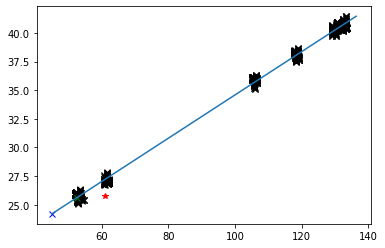

pid -22463.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     239069      1    52  5105  310104  310104  238186  18.762085 -17.608183   
      242709      1    52  5105  310104  310104  241869   4.417048  26.138641   
      178821      1    52  5105  310104  310104  177152   7.146753 -25.689734   
      238732      1    52  5105  310104  310104  237841 -24.440638   8.091265   
      241668      1    52  5105  310104  310104  240819 -11.881540  23.421789   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      239320      1    52  5105  310104  310104  238444  24.095255  10.411814   
      238569      1    52  5105  310104  310104  237676 -10.006849  24.104120   
      241436      1    52  5105  310104  310104  240583  18.409136  19.279999   
      240104      1    52  5105  310104  310104  239232  16.706511 -20.253439   
      243

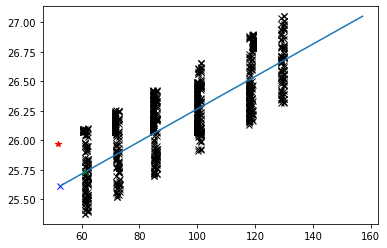

  8%|██████████                                                                                                            | 17/200 [00:09<01:29,  2.04it/s]

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     26314       1    52  5105  310104  310104   23316 -0.213002 -3.661606   
      26399       1    52  5105  310104  310104   23403 -0.218600 -3.750498   
      29553       1    52  5105  310104  310104   26606 -1.710358  4.932827   
      25401       1    52  5105  310104  310104   22395  3.626315  0.979300   
      31321       1    52  5105  310104  310104   28395 -3.504139 -3.627703   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      30403       1    52  5105  310104  310104   27466  4.290727 -3.724972   
      30507       1    52  5105  310104  310104   27575  5.290036 -1.815785   
      26449       1    52  5105  310104  310104   23453  2.129624 -3.433462   
      29871       1    52  5105  310104  310104   26927 -4.806695 -0.636013   
      30314       1    52  5105  

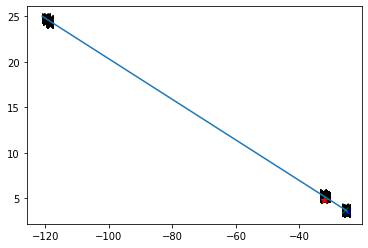

pid -22462.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     35730       1    52  5105  310104  310104   32863  -0.368989  -6.029172   
      34428       1    52  5105  310104  310104   31543  -0.382326  -6.225413   
      39490       1    52  5105  310104  310104   36665  -2.719602   8.418451   
      2911        1    52  5105  310104  310104   37737   6.286325   6.634020   
      40499       1    52  5105  310104  310104   37685   8.836076   1.913312   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      35722       1    52  5105  310104  310104   32855  -0.916628  -6.488293   
      34462       1    52  5105  310104  310104   31577   1.131151  -5.711495   
      222937      1    52  5105  310104  310104  221780  17.435551 -18.905361   
      35028       1    52  5105  310104  310104   32152   0.956179   5.541996   
      391

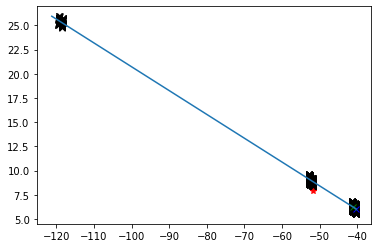

  9%|██████████▌                                                                                                           | 18/200 [00:10<01:48,  1.68it/s]

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     34812       1    52  5105  310104  310104   31932   5.552934   0.450200   
      33359       1    52  5105  310104  310104   30465   5.645859   0.457591   
      33923       1    52  5105  310104  310104   31033  -4.774297   3.048502   
      40560       1    52  5105  310104  310104   37748   6.605387   5.215021   
      40633       1    52  5105  310104  310104   37824   3.140638   7.807554   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      222173      1    52  5105  310104  310104  221003  16.852875  17.876472   
      40337       1    52  5105  310104  310104   37522   6.620336  -3.765034   
      34888       1    52  5105  310104  310104   32008   5.237472   3.112723   
      39922       1    52  5105  310104  310104   37101  -7.151048  -2.879770   
      222

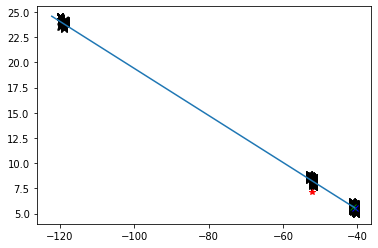

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     39160       1    52  5105  310104  310104   36332   7.106597   0.563029   
      37703       1    52  5105  310104  310104   34866   7.199267   0.569475   
      45192       1    52  5105  310104  310104   42419  -0.317801  10.697717   
      40013       1    52  5105  310104  310104   37195  -3.569576  -6.060362   
      37956       1    52  5105  310104  310104   35122   1.366130   7.083226   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      38036       1    52  5105  310104  310104   35202  -1.142726   6.120182   
      39271       1    52  5105  310104  310104   36445   4.654366   3.701694   
      45798       1    52  5105  310104  310104   43032  11.399948  -3.022597   
      40121       1    52  5105  310104  310104   37303  -0.126814  -5.942365   
      381

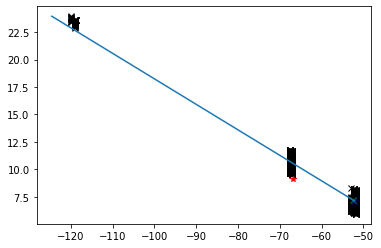

pid -22461.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     43636       1    52  5105  310104  310104   40855   9.080338   0.694624   
      44939       1    52  5105  310104  310104   42164   9.253221   0.705070   
      45663       1    52  5105  310104  310104   42893   0.986460  -9.226274   
      50473       1    52  5105  310104  310104   47748   9.786586   8.654209   
      45832       1    52  5105  310104  310104   43066   8.760914  -2.797041   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      50873       1    52  5105  310104  310104   48151 -10.832447  -4.997760   
      50545       1    52  5105  310104  310104   47821   4.382692  11.002280   
      50573       1    52  5105  310104  310104   47849   4.386716  11.093559   
      45116       1    52  5105  310104  310104   42343   5.408246   9.003049   
      507

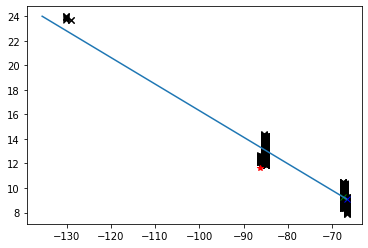

 10%|███████████▏                                                                                                          | 19/200 [00:11<02:22,  1.27it/s]

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     106158      1    52  5105  310104  310104  103920  4.310215  5.376178   
      113391      1    52  5105  310104  310104  111216  9.568241  1.724913   
      106318      1    52  5105  310104  310104  104082  0.282712  6.874963   
      106290      1    52  5105  310104  310104  104054  0.946533  6.815185   
      114076      1    52  5105  310104  310104  111906 -3.106736 -9.208654   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      427         1    52  5105  310104  310104  104261 -4.282859  3.945216   
      112673      1    52  5105  310104  310104  110494 -8.574538  1.231398   
      113376      1    52  5105  310104  310104  111201  8.347366  2.446732   
      113624      1    52  5105  310104  310104  111449  1.181106  8.655360   
      106352      1    52  5105  

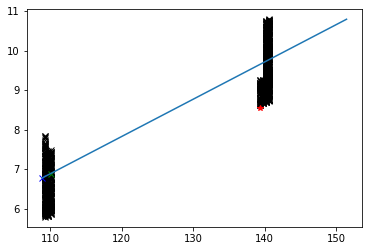

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     113532      1    52  5105  310104  310104  111357   5.422633   6.736323   
      113924      1    52  5105  310104  310104  111750  -8.581798  -0.742754   
      114348      1    52  5105  310104  310104  112182   8.640029  -0.415429   
      114051      1    52  5105  310104  310104  111880  -5.025956  -7.040704   
      113393      1    52  5105  310104  310104  111218   8.499592   1.367171   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      117175      1    52  5105  310104  310104  115040  -1.735655 -10.593044   
      116733      1    52  5105  310104  310104  114594   0.936837  10.693121   
      115855      1    52  5105  310104  310104  113712 -10.115391   3.253704   
      117122      1    52  5105  310104  310104  114986  -5.895099 -11.440323   
      112

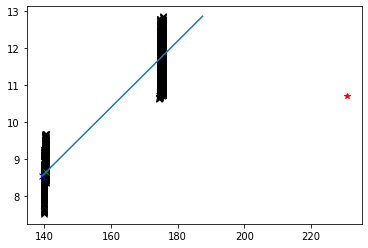

pid -22460.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     125623      1    52  5105  310104  310104  123558   6.946054  8.144607   
      125872      1    52  5105  310104  310104  123810  -6.671196  8.391157   
      130724      1    52  5105  310104  310104  128697  -7.003845  9.100145   
      131011      1    52  5105  310104  310104  128984  -9.086476 -7.063225   
      131018      1    52  5105  310104  310104  128991  -9.077683 -7.032385   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      131083      1    52  5105  310104  310104  129056  -5.702482 -9.007412   
      130858      1    52  5105  310104  310104  128831 -10.569989  1.224910   
      129811      1    52  5105  310104  310104  127778  -6.768768 -8.221838   
      125568      1    52  5105  310104  310104  123503  10.359692  5.149841   
      126464      1  

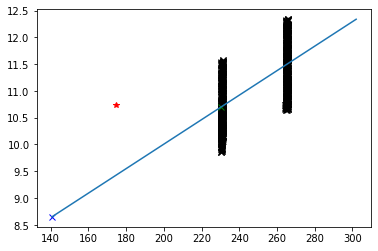

 10%|███████████▊                                                                                                          | 20/200 [00:12<02:24,  1.25it/s]

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     26723       1    52  5105  310104  310104   23731   7.479725   2.949504   
      27907       1    52  5105  310104  310104   24931   7.952752   3.142589   
      227649      1    52  5105  310104  310104  226533  25.786589  -2.481829   
      28526       1    52  5105  310104  310104   25567   5.992951  -6.104469   
      26779       1    52  5105  310104  310104   23787   7.504019   3.544670   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227202      1    52  5105  310104  310104  226080 -25.758928   8.708970   
      227223      1    52  5105  310104  310104  226103 -25.773516   9.412186   
      227024      1    52  5105  310104  310104  225892  -2.756330  27.006935   
      33114       1    52  5105  310104  310104   30218  -8.632974  -8.197778   
      320

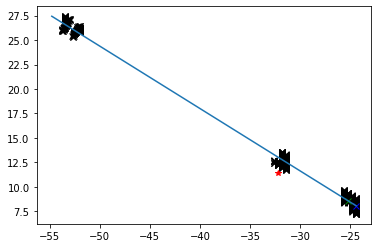

pid -22457.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     37035       1    52  5105  310104  310104   34185  13.697678   5.548444   
      37006       1    52  5105  310104  310104   34156  13.491875   5.460355   
      226638      1    52  5105  310104  310104  225503  -7.956923 -25.606071   
      226634      1    52  5105  310104  310104  225498 -10.428313 -24.706558   
      37124       1    52  5105  310104  310104   34274   4.024738  14.216423   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227561      1    52  5105  310104  310104  226445  18.331833 -15.665093   
      226764      1    52  5105  310104  310104  225629  16.530382 -17.219902   
      226167      1    52  5105  310104  310104  225026  13.095421  21.029350   
      226342      1    52  5105  310104  310104  225203 -13.096542  21.028410   
      226

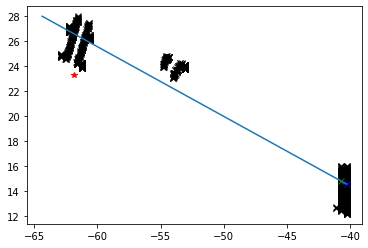

 10%|████████████▍                                                                                                         | 21/200 [00:13<02:16,  1.31it/s]

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     11348       1    52  5105  310104  310104    8050  4.921407   3.278108   
      237169      1    52  5105  310104  310104  236232 -6.195827 -25.403490   
      15224       1    52  5105  310104  310104   11988  0.416640  -5.896059   
      20434       1    52  5105  310104  310104   17321  4.575666  -9.677472   
      19568       1    52  5105  310104  310104   16440 -7.615786  -7.516299   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      83341       1    52  5105  310104  310104   80811 -6.595727  14.609909   
      19326       1    52  5105  310104  310104   16196 -9.084914  -4.637282   
      19796       1    52  5105  310104  310104   16670 -6.069914  -8.354952   
      15963       1    52  5105  310104  310104   12770  4.710844  -4.373858   
      18616       1  

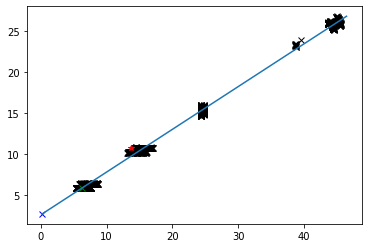

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     17197       1    52  5105  310104  310104   14026   7.077110   8.054975   
      18855       1    52  5105  310104  310104   15710 -10.233130   0.593577   
      19563       1    52  5105  310104  310104   16435  -7.398049  -7.734036   
      235850      1    52  5105  310104  310104  234888  -1.456332  26.625797   
      236431      1    52  5105  310104  310104  235479  22.336784 -14.563152   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      235963      1    52  5105  310104  310104  235001 -16.233860  19.974758   
      235524      1    52  5105  310104  310104  234552   8.391109 -23.532913   
      22933       1    52  5105  310104  310104   19873 -11.995705   7.974983   
      235222      1    52  5105  310104  310104  234248 -24.563499   4.568480   
      236

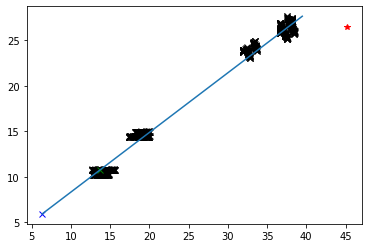

pid -22454.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     236636      1    52  5105  310104  310104  235695  19.603500  17.810680   
      236657      1    52  5105  310104  310104  235716  20.111036  18.392200   
      236562      1    52  5105  310104  310104  235621  25.983168   8.223190   
      236892      1    52  5105  310104  310104  235952 -14.589895  23.024988   
      236672      1    52  5105  310104  310104  235731  14.664460  22.962421   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      260089      1    52  5105  310104  310104  259471   9.747872  37.410786   
      260591      1    52  5105  310104  310104  259979  38.405811  -4.403043   
      260490      1    52  5105  310104  310104  259878  22.108784 -31.917898   
      260347      1    52  5105  310104  310104  259733 -34.118622 -18.408569   
      260

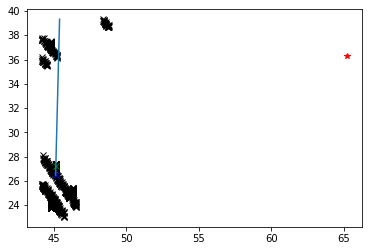

 12%|██████████████▏                                                                                                       | 24/200 [00:14<01:30,  1.94it/s]

pid -22451.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28645       1    52  5105  310104  310104   25686  12.585443   3.791632   
      28831       1    52  5105  310104  310104   25873 -10.749091   7.900081   
      227422      1    52  5105  310104  310104  226306 -13.317158 -23.903170   
      228288      1    52  5105  310104  310104  227188   1.403669 -23.411926   
      227456      1    52  5105  310104  310104  226340   1.243670 -26.588074   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228099      1    52  5105  310104  310104  226994 -25.033216   1.904576   
      227307      1    52  5105  310104  310104  226191 -23.355354 -11.782572   
      228362      1    52  5105  310104  310104  227262   6.192226 -24.333241   
      227760      1    52  5105  310104  310104  226646  19.028637  15.389835   
      226

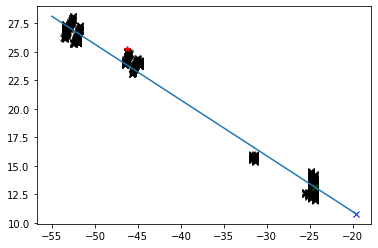

 13%|███████████████▎                                                                                                      | 26/200 [00:14<01:10,  2.48it/s]

pid -22450.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     52634       1    52  5105  310104  310104   49929  5.561891 -0.603755   
      58640       1    52  5105  310104  310104   55966  6.983030 -3.393758   
      1843        1    52  5105  310104  310104   49815  3.676320 -4.211953   
      53445       1    52  5105  310104  310104   50743 -4.732227 -2.879516   
      61791       1    52  5105  310104  310104   59130  9.248456 -4.623941   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      57627       1    52  5105  310104  310104   54949  2.367415  8.032544   
      56088       1    52  5105  310104  310104   53402  4.911565  5.312848   
      57909       1    52  5105  310104  310104   55232 -6.073793  3.820541   
      1844        1    52  5105  310104  310104   55888  4.932068 -5.211736   
      58775       1    52  5105  

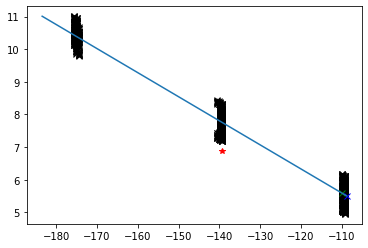

pid -22450.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     57340       1    52  5105  310104  310104   54660   6.939377 -0.738399   
      61416       1    52  5105  310104  310104   58753  -7.031435 -6.451602   
      66969       1    52  5105  310104  310104   64330 -11.390030 -2.212595   
      61072       1    52  5105  310104  310104   58409  -5.755967  7.609970   
      61721       1    52  5105  310104  310104   59059   5.969741 -7.520072   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      57866       1    52  5105  310104  310104   55189  -5.276932  3.282512   
      58512       1    52  5105  310104  310104   55836   2.753220 -5.571258   
      66738       1    52  5105  310104  310104   64099  -8.667025  6.508588   
      60797       1    52  5105  310104  310104   58131   6.651512  5.818894   
      61076       1  

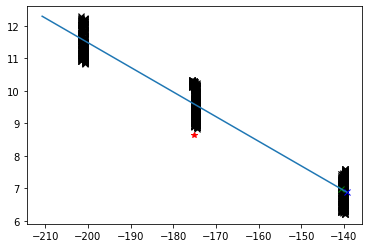

 14%|███████████████▉                                                                                                      | 27/200 [00:15<01:23,  2.07it/s]

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     43198       1    52  5105  310104  310104   40416 -1.124528 -3.735962   
      43109       1    52  5105  310104  310104   40325 -1.135964 -3.771214   
      48892       1    52  5105  310104  310104   46151 -5.262722 -1.897394   
      47598       1    52  5105  310104  310104   44846 -2.019390 -5.298656   
      43354       1    52  5105  310104  310104   40573  2.043717 -3.319927   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      43366       1    52  5105  310104  310104   40585  2.606878 -3.538610   
      48303       1    52  5105  310104  310104   45559  0.820310  5.033810   
      47924       1    52  5105  310104  310104   45176  4.169206 -3.001133   
      48981       1    52  5105  310104  310104   46241 -2.615601 -4.333939   
      43064       1    52  5105  

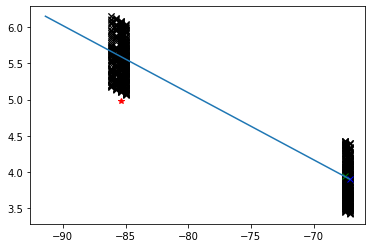

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     47665       1    52  5105  310104  310104   44914 -1.443151 -4.820765   
      49026       1    52  5105  310104  310104   46289 -1.429155 -4.775884   
      52795       1    52  5105  310104  310104   50091  7.177481  3.029966   
      817         1    52  5105  310104  310104   45763 -2.740692  4.164909   
      49292       1    52  5105  310104  310104   46559  4.106620 -2.743553   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      49015       1    52  5105  310104  310104   46278 -1.021158 -5.506445   
      48066       1    52  5105  310104  310104   45318  4.282274 -1.259148   
      47738       1    52  5105  310104  310104   44987  1.450881 -5.508810   
      47583       1    52  5105  310104  310104   44831 -3.418242 -4.498348   
      53722       1    52  5105  

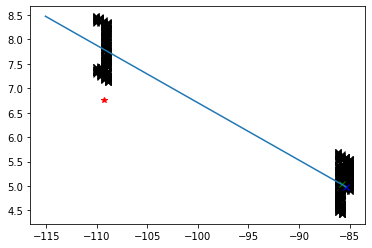

pid -22448.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     59512       1    52  5105  310104  310104   56843  -2.454303  -8.366566   
      59471       1    52  5105  310104  310104   56802  -2.463009  -8.402493   
      67526       1    52  5105  310104  310104   64893  10.835009   9.289974   
      59539       1    52  5105  310104  310104   56870  -0.494260  -8.705394   
      67511       1    52  5105  310104  310104   64878  11.414473   8.691371   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      68041       1    52  5105  310104  310104   65413  -6.071740 -13.665682   
      61999       1    52  5105  310104  310104   59339   7.104781   8.792918   
      59360       1    52  5105  310104  310104   56689  -8.244886  -4.517831   
      66709       1    52  5105  310104  310104   64069  -3.247599  13.234076   
      594

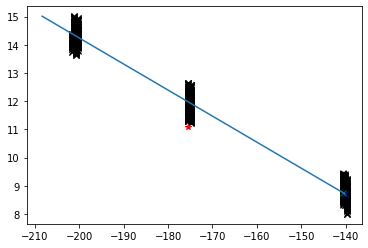

 14%|█████████████████                                                                                                     | 29/200 [00:16<01:35,  1.79it/s]

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     15574       1    52  5105  310104  310104   12351   3.233264  -4.955816   
      227144      1    52  5105  310104  310104  226017 -20.425081  15.766133   
      227309      1    52  5105  310104  310104  226193 -23.350378 -12.045280   
      13888       1    52  5105  310104  310104   10630  -6.007719  -2.220089   
      227556      1    52  5105  310104  310104  226440  15.100639 -20.876400   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      226943      1    52  5105  310104  310104  225810  19.854412  18.607534   
      28393       1    52  5105  310104  310104   25434  -3.201382 -12.279096   
      11444       1    52  5105  310104  310104    8146   4.091887   4.927207   
      228471      1    52  5105  310104  310104  227371  22.633003  -5.002511   
      286

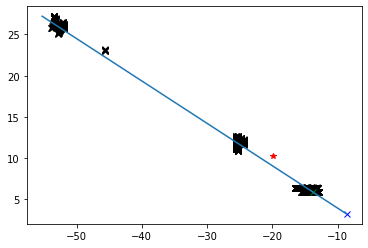

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     20476       1    52  5105  310104  310104   17367   7.698703  -6.726275   
      28845       1    52  5105  310104  310104   25887 -11.462242   6.920243   
      228775      1    52  5105  310104  310104  227675 -11.485328  20.463734   
      19126       1    52  5105  310104  310104   15988  -8.784469  -5.226939   
      19612       1    52  5105  310104  310104   16484  -4.621461  -9.092976   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228947      1    52  5105  310104  310104  227851 -22.762674  -7.870942   
      28804       1    52  5105  310104  310104   25845  -6.597892  13.327566   
      29065       1    52  5105  310104  310104   26111   4.731906 -11.542147   
      229317      1    52  5105  310104  310104  228221  24.084543  -0.374254   
      284

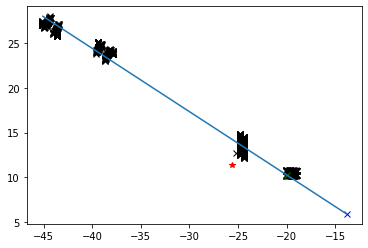

pid -22447.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28500       1    52  5105  310104  310104   25541   7.361437  -8.718919   
      224178      1    52  5105  310104  310104  223027  19.801264  13.336678   
      224637      1    52  5105  310104  310104  223490 -22.407715  -9.035053   
      225080      1    52  5105  310104  310104  223933  23.742168  -2.506594   
      223451      1    52  5105  310104  310104  222298 -17.979971  20.376450   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      28634       1    52  5105  310104  310104   25675  12.006163  -0.194170   
      224089      1    52  5105  310104  310104  222938  25.256548  -6.911482   
      223516      1    52  5105  310104  310104  222363 -23.782024  10.954344   
      224969      1    52  5105  310104  310104  223822  19.357445 -13.190136   
      223

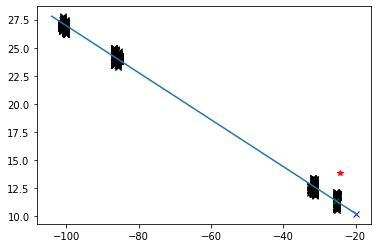

 16%|██████████████████▎                                                                                                   | 31/200 [00:17<01:22,  2.04it/s]

pid -22444.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     16421       1    52  5105  310104  310104   13240   6.342483  -0.856369   
      13800       1    52  5105  310104  310104   10542  -5.769479  -1.378107   
      13805       1    52  5105  310104  310104   10547  -5.758191  -1.463853   
      234456      1    52  5105  310104  310104  233449 -26.291735  -0.445461   
      234249      1    52  5105  310104  310104  233240   3.503182  27.446976   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      234697      1    52  5105  310104  310104  233713   5.918499 -26.123466   
      233796      1    52  5105  310104  310104  232777  -3.231819 -24.054831   
      234749      1    52  5105  310104  310104  233767  15.327248 -22.321793   
      234300      1    52  5105  310104  310104  233291 -20.253412  19.513746   
      234

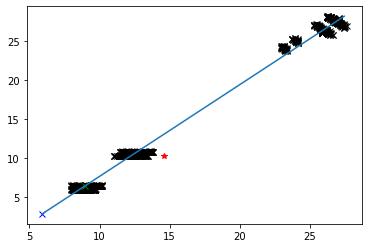

 16%|███████████████████▍                                                                                                  | 33/200 [00:18<01:09,  2.39it/s]

pid -22441.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     195346      1    52  5105  310104  310104  193886  32.643585 -57.887264   
      195337      1    52  5105  310104  310104  193876  32.635883 -57.891922   
      195414      1    52  5105  310104  310104  193961  61.433189 -25.354189   
      195412      1    52  5105  310104  310104  193959  59.710072 -29.182800   
      195408      1    52  5105  310104  310104  193955  61.416569 -25.391121   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      196036      1    52  5105  310104  310104  194592  56.537113 -51.364792   
      195975      1    52  5105  310104  310104  194529  51.420773 -56.491779   
      196023      1    52  5105  310104  310104  194578  56.486137 -51.427742   
      195982      1    52  5105  310104  310104  194536  44.510391 -62.087696   
      201

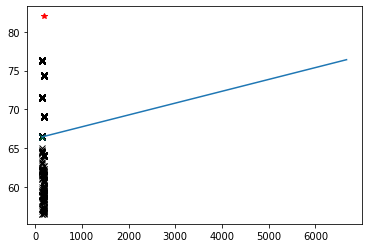

 18%|████████████████████▋                                                                                                 | 35/200 [00:18<00:50,  3.25it/s]

pid -22440.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     233687      1    52  5105  310104  310104  232663 -15.181429 -21.162249   
      233665      1    52  5105  310104  310104  232640 -15.172811 -21.190870   
      233369      1    52  5105  310104  310104  232324   7.027962  25.078363   
      233690      1    52  5105  310104  310104  232666 -18.207304 -18.623236   
      234791      1    52  5105  310104  310104  233809  23.692345 -11.679049   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      233998      1    52  5105  310104  310104  232985  25.654392  -6.007931   
      233964      1    52  5105  310104  310104  232949  21.592766 -14.242728   
      234118      1    52  5105  310104  310104  233107  21.726292  14.308271   
      233927      1    52  5105  310104  310104  232911  20.100477 -17.034676   
      335

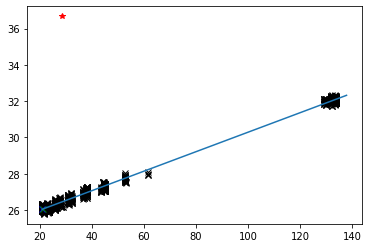

 18%|█████████████████████▏                                                                                                | 36/200 [00:19<00:58,  2.82it/s]

pid -22438.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     94380       1    52  5105  310104  310104   92008 -4.565282 -2.088930   
      93076       1    52  5105  310104  310104   90687 -4.638767 -2.123672   
      92855       1    52  5105  310104  310104   90462 -4.785197  1.990652   
      93107       1    52  5105  310104  310104   90718 -4.193901 -3.043085   
      98341       1    52  5105  310104  310104   96009  4.940211  6.169409   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      98971       1    52  5105  310104  310104   96646 -6.473294 -5.762043   
      93391       1    52  5105  310104  310104   91014  2.024891 -5.503460   
      99028       1    52  5105  310104  310104   96707 -3.992035 -6.117775   
      94687       1    52  5105  310104  310104   92326 -0.079401 -5.620637   
      94809       1    52  5105  

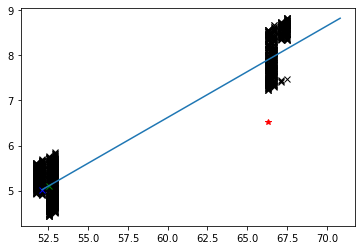

pid -22438.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     97551       1    52  5105  310104  310104   95214 -6.044689  -2.782497   
      98936       1    52  5105  310104  310104   96608 -5.921784  -2.724461   
      99124       1    52  5105  310104  310104   96806 -1.263436  -6.464195   
      98551       1    52  5105  310104  310104   96219 -2.146444   6.227572   
      98314       1    52  5105  310104  310104   95982  4.547944   4.762465   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      97291       1    52  5105  310104  310104   94953 -6.388651   3.827510   
      97955       1    52  5105  310104  310104   95623  3.379915  -4.953756   
      104909      1    52  5105  310104  310104  102653 -0.307121 -10.547738   
      104588      1    52  5105  310104  310104  102321 -9.164536  -0.232023   
      99081       1  

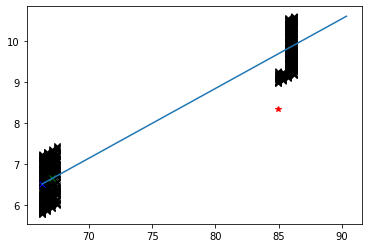

 20%|███████████████████████                                                                                               | 39/200 [00:20<00:57,  2.79it/s]

pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     79804       1    52  5105  310104  310104   77223  5.547755   3.581366   
      81243       1    52  5105  310104  310104   78686  5.402480   3.484490   
      81818       1    52  5105  310104  310104   79266 -5.397722  -3.490288   
      81935       1    52  5105  310104  310104   79387 -1.548923  -6.057766   
      81289       1    52  5105  310104  310104   78732  3.519049   5.166896   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      80067       1    52  5105  310104  310104   77487  0.158404   6.058153   
      239430      1    52  5105  310104  310104  238554  9.994129  24.108749   
      86515       1    52  5105  310104  310104   84038  8.430409   6.032442   
      80743       1    52  5105  310104  310104   78180 -1.071225  -5.964258   
      238442      1  

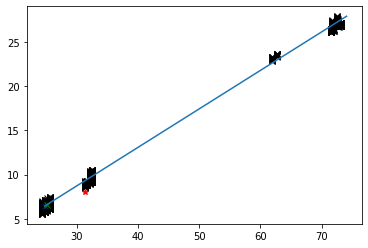

pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     86491       1    52  5105  310104  310104   84014   7.107871   4.620532   
      91172       1    52  5105  310104  310104   88766 -10.862188  -4.676507   
      91292       1    52  5105  310104  310104   88886  -4.533775 -10.759315   
      87216       1    52  5105  310104  310104   84745   7.481859  -3.990551   
      239885      1    52  5105  310104  310104  239011 -16.664312 -16.607153   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      87148       1    52  5105  310104  310104   84677   6.329579  -6.563067   
      90853       1    52  5105  310104  310104   88445   6.213147  10.809064   
      85185       1    52  5105  310104  310104   82693   8.739550   2.020196   
      90820       1    52  5105  310104  310104   88412   6.297538  10.936013   
      865

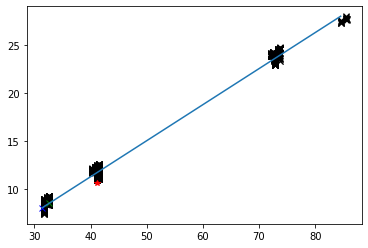

pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     96945       1    52  5105  310104  310104   94602  1.395254  2.785148   
      92574       1    52  5105  310104  310104   90179  0.593464  3.059851   
      97247       1    52  5105  310104  310104   94909 -2.115145  2.290154   
      97527       1    52  5105  310104  310104   95189 -2.689810 -1.582366   
      92592       1    52  5105  310104  310104   90197  0.433788  3.090453   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      96724       1    52  5105  310104  310104   94380  4.463903  0.432382   
      97364       1    52  5105  310104  310104   95026 -4.471533  0.384208   
      97692       1    52  5105  310104  310104   95357 -2.138224 -3.945945   
      93528       1    52  5105  310104  310104   91151  2.646551 -3.627661   
      97560       1    52  5105  

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


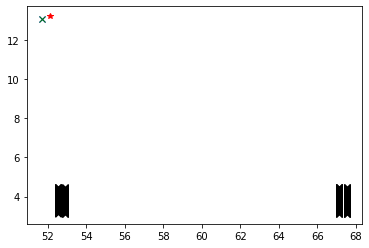

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     96945       1    52  5105  310104  310104   94602  1.395254  2.785148   
      92574       1    52  5105  310104  310104   90179  0.593464  3.059851   
      97247       1    52  5105  310104  310104   94909 -2.115145  2.290154   
      97527       1    52  5105  310104  310104   95189 -2.689810 -1.582366   
      92592       1    52  5105  310104  310104   90197  0.433788  3.090453   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      92839       1    52  5105  310104  310104   90446 -3.670779  1.884386   
      92506       1    52  5105  310104  310104   90109  1.856541  3.684967   
      92997       1    52  5105  310104  310104   90606 -4.020322 -0.929106   
      97186       1    52  5105  310104  310104   94847 -1.987964  3.618003   
      93226       1    52  5105  

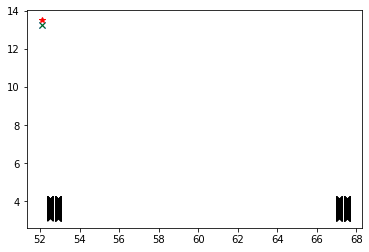

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     96945       1    52  5105  310104  310104   94602  1.395254  2.785148   
      92574       1    52  5105  310104  310104   90179  0.593464  3.059851   
      97247       1    52  5105  310104  310104   94909 -2.115145  2.290154   
      97527       1    52  5105  310104  310104   95189 -2.689810 -1.582366   
      92592       1    52  5105  310104  310104   90197  0.433788  3.090453   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      92839       1    52  5105  310104  310104   90446 -3.670779  1.884386   
      92506       1    52  5105  310104  310104   90109  1.856541  3.684967   
      92997       1    52  5105  310104  310104   90606 -4.020322 -0.929106   
      97186       1    52  5105  310104  310104   94847 -1.987964  3.618003   
      93226       1    52  5105  

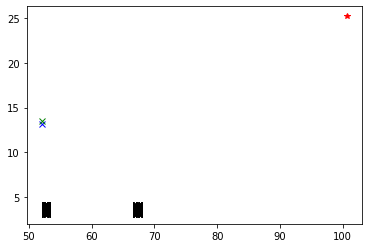

pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     180324      1    52  5105  310104  310104  178661  26.533516  18.878820   
      180341      1    52  5105  310104  310104  178678  26.824478  19.102083   
      180404      1    52  5105  310104  310104  178741  11.480804  30.865913   
      180551      1    52  5105  310104  310104  178888 -22.355637  23.680748   
      180493      1    52  5105  310104  310104  178830  -5.396102  32.483467   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      181105      1    52  5105  310104  310104  179444  33.564461 -11.099465   
      181739      1    52  5105  310104  310104  180080  -8.236061 -36.969460   
      180273      1    52  5105  310104  310104  178610  35.306587   1.934982   
      181785      1    52  5105  310104  310104  180128  16.303223 -34.193352   
      180

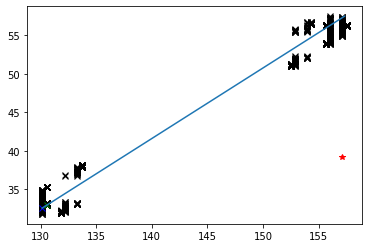

pid -22434.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     190656      1    52  5105  310104  310104  189146  31.689917  23.106749   
      190667      1    52  5105  310104  310104  189157  32.616203  23.700584   
      190780      1    52  5105  310104  310104  189270   1.825882  40.275208   
      191028      1    52  5105  310104  310104  189518 -40.281925  -1.766241   
      190664      1    52  5105  310104  310104  189154  35.526421  19.069002   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      193539      1    52  5105  310104  310104  192053 -17.895599  50.873352   
      193479      1    52  5105  310104  310104  191993   9.716951  53.046501   
      193538      1    52  5105  310104  310104  192052 -17.817070  50.905884   
      193417      1    52  5105  310104  310104  191931  48.573425  23.448116   
      193

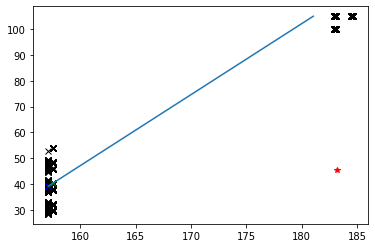

 20%|███████████████████████▌                                                                                              | 40/200 [00:22<01:53,  1.40it/s]

pid -22433.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     33160       1    52  5105  310104  310104   30264  -2.396858 -12.998404   
      33142       1    52  5105  310104  310104   30246  -2.452341 -13.264546   
      227367      1    52  5105  310104  310104  226251 -20.788898 -17.430157   
      33149       1    52  5105  310104  310104   30253  -4.372460 -12.768867   
      33243       1    52  5105  310104  310104   30347   7.069880 -11.158442   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227838      1    52  5105  310104  310104  226726  14.238794  20.666050   
      227923      1    52  5105  310104  310104  226811   2.378669  24.983633   
      33234       1    52  5105  310104  310104   30338   5.487458 -10.406851   
      32429       1    52  5105  310104  310104   29516  -7.008291  -9.784910   
      227

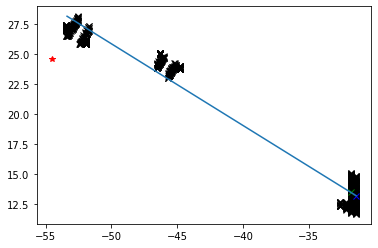

pid -22433.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     227392      1    52  5105  310104  310104  226276  -4.907386 -24.114851   
      227420      1    52  5105  310104  310104  226304  -5.109079 -24.727474   
      227324      1    52  5105  310104  310104  226208 -23.460796  -9.331975   
      227583      1    52  5105  310104  310104  226467  22.891335  -9.028992   
      227617      1    52  5105  310104  310104  226501  23.472126  -9.312351   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      226826      1    52  5105  310104  310104  225691  26.376694   0.024374   
      226659      1    52  5105  310104  310104  225524  -4.340732 -25.971739   
      226197      1    52  5105  310104  310104  225056  12.449678  23.107235   
      226478      1    52  5105  310104  310104  225341 -26.185934  -1.057473   
      226

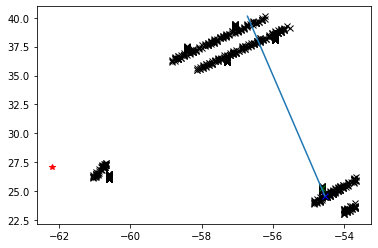

 20%|████████████████████████▏                                                                                             | 41/200 [00:23<01:55,  1.37it/s]

pid -22432.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     27753       1    52  5105  310104  310104   24776  4.486409 -4.437065   
      26492       1    52  5105  310104  310104   23499  4.737860 -4.679523   
      26290       1    52  5105  310104  310104   23292 -0.996568 -6.411943   
      32439       1    52  5105  310104  310104   29526 -4.606865 -8.337004   
      32033       1    52  5105  310104  310104   29115  4.620200  8.527575   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      32409       1    52  5105  310104  310104   29496 -6.540169 -5.997880   
      32326       1    52  5105  310104  310104   29413 -9.804737 -2.766443   
      26335       1    52  5105  310104  310104   23337  1.557126 -5.796072   
      32604       1    52  5105  310104  310104   29693  5.563520 -7.132987   
      97          1    52  5105  

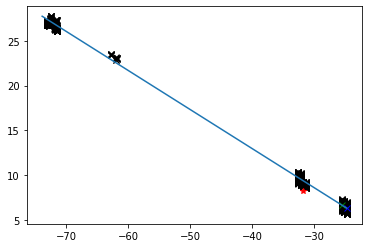

pid -22432.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     32640       1    52  5105  310104  310104   29729   6.029108  -5.916706   
      32590       1    52  5105  310104  310104   29679   6.138740  -6.022785   
      32548       1    52  5105  310104  310104   29636  -0.101821  -8.602107   
      225470      1    52  5105  310104  310104  224325 -19.185331  14.200965   
      36896       1    52  5105  310104  310104   34045  11.272004  -4.100815   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      36913       1    52  5105  310104  310104   34062   9.896422  -5.015207   
      32189       1    52  5105  310104  310104   29274  -7.732411   5.266813   
      32392       1    52  5105  310104  310104   29479  -7.849759  -5.369462   
      31711       1    52  5105  310104  310104   28793   6.830692  -6.173390   
      324

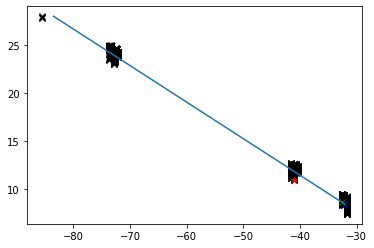

pid -22432.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     36848       1    52  5105  310104  310104   33997   7.830156  -7.615181   
      36816       1    52  5105  310104  310104   33964   7.941186  -7.718815   
      41618       1    52  5105  310104  310104   38822  -3.352939  14.566679   
      224285      1    52  5105  310104  310104  223134   6.193141  26.735033   
      36912       1    52  5105  310104  310104   34061   9.880752  -4.989774   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224450      1    52  5105  310104  310104  223301 -18.239180  19.658581   
      225667      1    52  5105  310104  310104  224522 -16.785583 -17.241732   
      42095       1    52  5105  310104  310104   39302  10.010135  -9.630028   
      225641      1    52  5105  310104  310104  224496 -21.613132 -11.618938   
      225

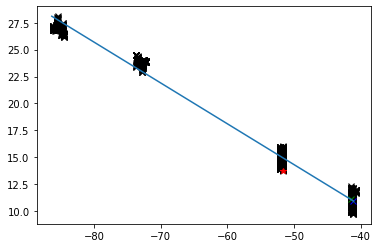

pid -22432.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     42079       1    52  5105  310104  310104   39285   9.895589  -9.525864   
      42095       1    52  5105  310104  310104   39302  10.010135  -9.630028   
      224809      1    52  5105  310104  310104  223662   4.154271 -26.253773   
      224305      1    52  5105  310104  310104  223154  13.043430  22.998896   
      225035      1    52  5105  310104  310104  223888  21.247852 -16.764170   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      41167       1    52  5105  310104  310104   38363  -0.144372 -11.755391   
      41202       1    52  5105  310104  310104   38398   1.026442 -11.866661   
      225696      1    52  5105  310104  310104  224551 -13.486476 -19.774044   
      225964      1    52  5105  310104  310104  224821  21.893864 -11.132699   
      225

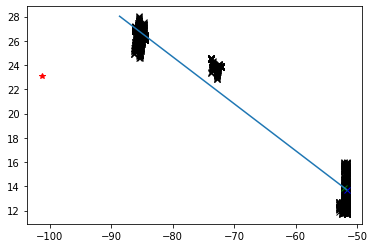

pid -22432.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     223920      1    52  5105  310104  310104  222767  17.162418 -15.452852   
      222579      1    52  5105  310104  310104  221418 -25.268087  -6.846038   
      223085      1    52  5105  310104  310104  221928  26.093533  -2.164707   
      222242      1    52  5105  310104  310104  221075  11.196932  23.670967   
      223923      1    52  5105  310104  310104  222770  13.407519 -18.787672   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      134825      1    52  5105  310104  310104  132821 -21.652739 -16.745424   
      135203      1    52  5105  310104  310104  133204  25.767603  -9.234772   
      223503      1    52  5105  310104  310104  222350 -20.950535  11.346081   
      222207      1    52  5105  310104  310104  221038   9.785358  23.476698   
      222

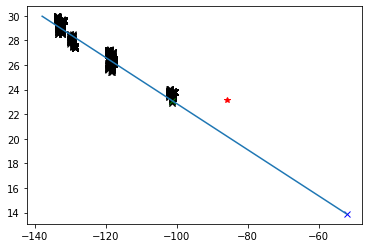

 21%|████████████████████████▊                                                                                             | 42/200 [00:24<02:17,  1.15it/s]

pid -22430.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     44250       1    52  5105  310104  310104   41472  -8.380385   0.908301   
      45366       1    52  5105  310104  310104   42595  -8.521749   0.926488   
      50654       1    52  5105  310104  310104   47930  -6.279752  10.022337   
      49626       1    52  5105  310104  310104   46893   2.887340  11.540886   
      49684       1    52  5105  310104  310104   46951   0.026585  11.969953   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      50383       1    52  5105  310104  310104   47658  12.511182   2.338822   
      43938       1    52  5105  310104  310104   41158  -0.854218   7.550735   
      49567       1    52  5105  310104  310104   46834   6.260646   9.033004   
      43930       1    52  5105  310104  310104   41150  -1.115249   7.510207   
      440

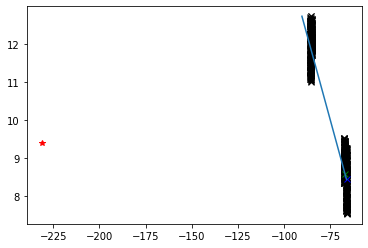

pid -22430.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     70451       1    52  5105  310104  310104   67835  -9.361339  0.838509   
      75965       1    52  5105  310104  310104   73366   8.536621 -4.322971   
      71064       1    52  5105  310104  310104   68449   8.678846 -3.602792   
      75434       1    52  5105  310104  310104   72834  -9.426131 -1.653681   
      70236       1    52  5105  310104  310104   67619  -4.679811  8.149390   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      76413       1    52  5105  310104  310104   73818  -4.595433  9.348295   
      70619       1    52  5105  310104  310104   68003  -8.177299 -6.162019   
      74773       1    52  5105  310104  310104   72172   9.909249  3.216800   
      77069       1    52  5105  310104  310104   74477  10.414762 -0.367194   
      76010       1  

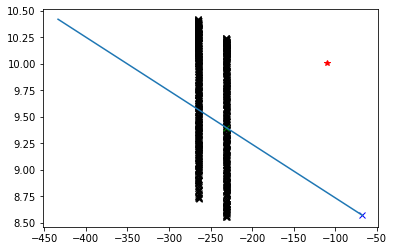

 22%|█████████████████████████▉                                                                                            | 44/200 [00:25<01:37,  1.59it/s]

pid -22428.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     51520       1    52  5105  310104  310104   48808  -1.862728  6.447075   
      58785       1    52  5105  310104  310104   56111   9.282075  1.022812   
      62383       1    52  5105  310104  310104   59724 -12.214466 -1.251701   
      52796       1    52  5105  310104  310104   50092   6.174487  2.442829   
      51960       1    52  5105  310104  310104   49250  -6.643120 -0.688945   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      59750       1    52  5105  310104  310104   57082   8.165011 -3.074930   
      51818       1    52  5105  310104  310104   49108  -5.499659  2.551095   
      52787       1    52  5105  310104  310104   50082   5.480306  2.509746   
      53179       1    52  5105  310104  310104   50477  -4.659183  3.822075   
      62272       1  

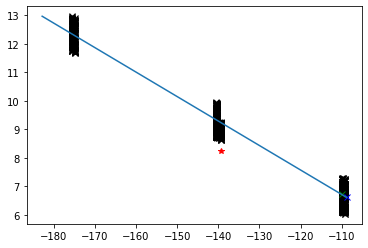

 22%|██████████████████████████▌                                                                                           | 45/200 [00:25<01:40,  1.54it/s]

pid -22427.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     97875       1    52  5105  310104  310104   95543 -0.259220 -3.245584   
      97772       1    52  5105  310104  310104   95438 -0.260506 -3.274767   
      97588       1    52  5105  310104  310104   95252 -2.668655 -1.914085   
      102379      1    52  5105  310104  310104  100087 -0.861489 -4.568256   
      97546       1    52  5105  310104  310104   95209 -2.970187 -1.340828   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      101485      1    52  5105  310104  310104   99187  3.806849  3.585879   
      101549      1    52  5105  310104  310104   99251  1.822317  3.601279   
      103248      1    52  5105  310104  310104  100962 -2.029088  4.726901   
      102300      1    52  5105  310104  310104  100008 -1.603930 -3.701316   
      101760      1    52  5105  

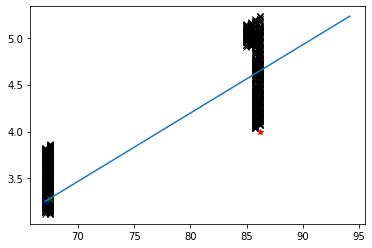

pid -22427.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     108380      1    52  5105  310104  310104  106166 -0.416598 -5.058727   
      107010      1    52  5105  310104  310104  104780 -0.419934 -5.104462   
      106039      1    52  5105  310104  310104  103801  4.263568  2.793884   
      106364      1    52  5105  310104  310104  104128 -0.771466  5.038649   
      112577      1    52  5105  310104  310104  110398 -4.839941  4.785415   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      113271      1    52  5105  310104  310104  111095  6.809640 -2.719962   
      108063      1    52  5105  310104  310104  105845 -5.577404 -0.253289   
      108467      1    52  5105  310104  310104  106255  2.157010 -5.151426   
      112080      1    52  5105  310104  310104  109895  7.204332  1.390509   
      111641      1    52  5105  

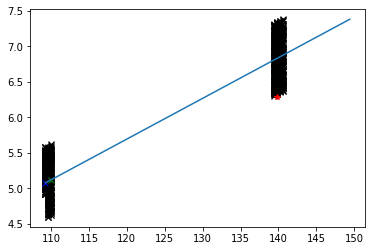

 23%|███████████████████████████▏                                                                                          | 46/200 [00:26<01:44,  1.47it/s]

pid -22426.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     27298       1    52  5105  310104  310104   24317  -5.229256   0.089122   
      25885       1    52  5105  310104  310104   22886  -5.530555   0.097621   
      31440       1    52  5105  310104  310104   28517  -1.902201  -7.624522   
      27144       1    52  5105  310104  310104   24155  -3.839430   3.550862   
      25562       1    52  5105  310104  310104   22559   1.002979   5.285798   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      31569       1    52  5105  310104  310104   28647   1.771495  -6.722590   
      30751       1    52  5105  310104  310104   27822   3.863642   5.959057   
      29912       1    52  5105  310104  310104   26968  -7.022922  -1.810871   
      225493      1    52  5105  310104  310104  224348 -21.005533  11.250821   
      226

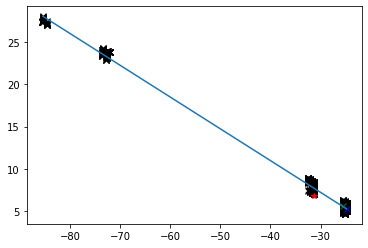

pid -22426.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     31160       1    52  5105  310104  310104   28234  -6.792521   0.132672   
      31206       1    52  5105  310104  310104   28280  -6.924166   0.138229   
      1264        1    52  5105  310104  310104   27346   1.009583  -7.117376   
      36258       1    52  5105  310104  310104   33398   1.259007   9.917441   
      30606       1    52  5105  310104  310104   27676   6.898510   0.632970   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      36612       1    52  5105  310104  310104   33760  -6.426566  -6.861945   
      36024       1    52  5105  310104  310104   33162   8.995773  -1.605722   
      30472       1    52  5105  310104  310104   27539   5.706655  -3.026933   
      224219      1    52  5105  310104  310104  223068  13.438828  21.609735   
      309

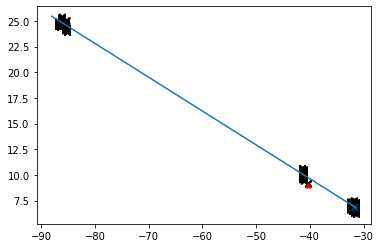

pid -22426.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     36467       1    52  5105  310104  310104   33615  -9.261665   0.223361   
      36519       1    52  5105  310104  310104   33667  -9.396420   0.229232   
      36678       1    52  5105  310104  310104   33826  -3.791763  -8.599815   
      224539      1    52  5105  310104  310104  223391 -24.623346   1.599368   
      224526      1    52  5105  310104  310104  223378 -23.684778   6.922254   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      35341       1    52  5105  310104  310104   32472  -7.996028   2.382463   
      224555      1    52  5105  310104  310104  223408 -23.520399  -0.744860   
      35531       1    52  5105  310104  310104   32663  -7.551121  -3.541500   
      42082       1    52  5105  310104  310104   39288  11.536663  -7.514299   
      224

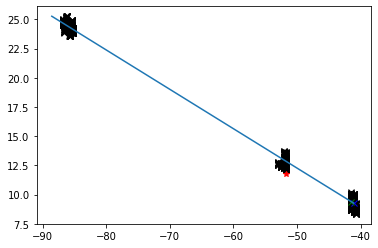

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
 24%|███████████████████████████▋                                                                                          | 47/200 [00:27<02:06,  1.21it/s]

pid -22425.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     49182       1    52  5105  310104  310104   46448  2.563652 -4.316298   
      47850       1    52  5105  310104  310104   45100  2.584318 -4.347875   
      53957       1    52  5105  310104  310104   51262  6.891279 -2.319040   
      51342       1    52  5105  310104  310104   48628  5.595732  4.699474   
      48707       1    52  5105  310104  310104   45966 -4.860102  1.105446   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      52911       1    52  5105  310104  310104   50208  2.015101  7.517040   
      48047       1    52  5105  310104  310104   45299  5.526133 -0.957516   
      47366       1    52  5105  310104  310104   44613 -5.564855 -0.265048   
      52886       1    52  5105  310104  310104   50182  3.307528  5.848518   
      49097       1    52  5105  

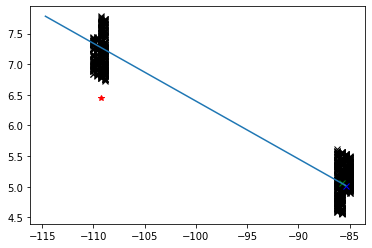

pid -22425.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     53773       1    52  5105  310104  310104   51073  3.302155 -5.533536   
      52460       1    52  5105  310104  310104   49754  3.318738 -5.557973   
      59501       1    52  5105  310104  310104   56832 -4.334260 -7.605722   
      59167       1    52  5105  310104  310104   56496 -6.312712  6.024032   
      59471       1    52  5105  310104  310104   56802 -2.463009 -8.402493   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      51711       1    52  5105  310104  310104   49001 -4.710855  3.857023   
      53257       1    52  5105  310104  310104   50555 -6.613670  1.815849   
      59524       1    52  5105  310104  310104   56855 -1.835544 -8.952923   
      52728       1    52  5105  310104  310104   50023  6.697901  1.335557   
      58071       1    52  5105  

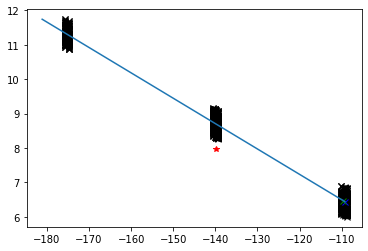

 24%|████████████████████████████▎                                                                                         | 48/200 [00:29<02:20,  1.09it/s]

pid -22423.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     235014      1    52  5105  310104  310104  234036   5.208591  23.414240   
      234996      1    52  5105  310104  310104  234018   5.193023  23.429943   
      235259      1    52  5105  310104  310104  234285 -22.881624  -7.196348   
      178695      1    52  5105  310104  310104  177026 -10.748268 -24.255533   
      238844      1    52  5105  310104  310104  237955 -23.068132  -9.098806   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      236715      1    52  5105  310104  310104  235774  10.931011  21.476686   
      178399      1    52  5105  310104  310104  176730 -22.175877  14.183557   
      239181      1    52  5105  310104  310104  238303  21.888865 -11.141358   
      237766      1    52  5105  310104  310104  236846 -20.307407  14.191309   
      242

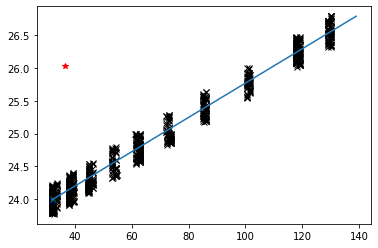

pid -22423.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     235820      1    52  5105  310104  310104  234858   5.664205  25.411602   
      235760      1    52  5105  310104  310104  234796  18.078928  19.587488   
      236303      1    52  5105  310104  310104  235347   3.358668 -25.816366   
      236011      1    52  5105  310104  310104  235050 -20.689465  15.797531   
      261058      1    52  5105  310104  310104  260453  -4.036623 -35.892605   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      236028      1    52  5105  310104  310104  235068 -25.221554   5.171918   
      261054      1    52  5105  310104  310104  260449   2.628376 -36.853981   
      236286      1    52  5105  310104  310104  235330  -3.486332 -25.063522   
      235963      1    52  5105  310104  310104  235001 -16.233860  19.974758   
      261

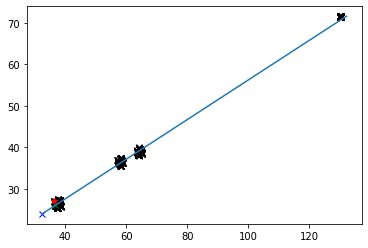

 24%|████████████████████████████▉                                                                                         | 49/200 [00:29<02:07,  1.19it/s]

pid -22422.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     12704       1    52  5105  310104  310104    9424  -3.757629   4.553457   
      28646       1    52  5105  310104  310104   25687  11.433976   3.981813   
      227674      1    52  5105  310104  310104  226558  25.970921  -1.382131   
      28994       1    52  5105  310104  310104   26039  -3.146244 -11.904503   
      226862      1    52  5105  310104  310104  225727  26.471115   3.206708   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227892      1    52  5105  310104  310104  226780  -0.756331  23.957834   
      15811       1    52  5105  310104  310104   12602   4.823816  -4.226630   
      13893       1    52  5105  310104  310104   10635  -6.087448  -2.027607   
      12948       1    52  5105  310104  310104    9673  -4.768561   4.298640   
      228

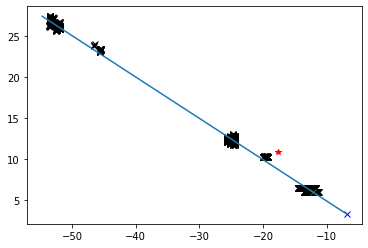

pid -22422.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     17921       1    52  5105  310104  310104   14762  -3.625180  10.161769   
      20040       1    52  5105  310104  310104   16918   0.880012 -10.187764   
      228659      1    52  5105  310104  310104  227559  20.357479  19.168177   
      229912      1    52  5105  310104  310104  228826   3.433668 -23.538973   
      229167      1    52  5105  310104  310104  228071  13.810904 -24.389421   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      28823       1    52  5105  310104  310104   25864  -9.933550  11.331041   
      229628      1    52  5105  310104  310104  228536 -13.602641  21.685074   
      228766      1    52  5105  310104  310104  227666  -2.676332  27.016367   
      230070      1    52  5105  310104  310104  228986  20.191534 -15.737915   
      229

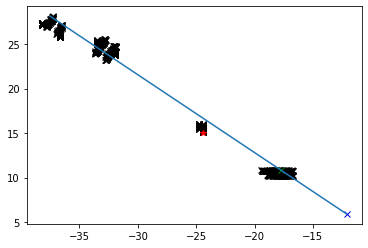

pid -22422.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28811       1    52  5105  310104  310104   25852  -8.240858  12.484277   
      28792       1    52  5105  310104  310104   25833  -8.442324  12.808651   
      28877       1    52  5105  310104  310104   25921 -14.906794   1.220750   
      29147       1    52  5105  310104  310104   26195  14.857673  -1.671826   
      228988      1    52  5105  310104  310104  227892 -22.545603 -15.726020   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      28901       1    52  5105  310104  310104   25945 -12.133415  -2.074678   
      228874      1    52  5105  310104  310104  227775 -23.032431   9.725520   
      229021      1    52  5105  310104  310104  227925 -19.225657 -16.088326   
      28937       1    52  5105  310104  310104   25981 -10.430593  -6.504890   
      291

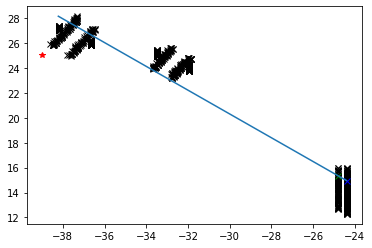

pid -22422.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     228818      1    52  5105  310104  310104  227718 -13.410044  21.183294   
      228842      1    52  5105  310104  310104  227742 -13.467130  21.313553   
      228176      1    52  5105  310104  310104  227076 -25.466194  -9.923991   
      227965      1    52  5105  310104  310104  226854  -7.890766  25.557632   
      228914      1    52  5105  310104  310104  227818 -24.013035   7.690321   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      253516      1    52  5105  310104  310104  252796 -38.233814   6.555381   
      140330      1    52  5105  310104  310104  138378 -38.764030  44.947998   
      253832      1    52  5105  310104  310104  253114  38.075592  -5.551076   
      140892      1    52  5105  310104  310104  138942   5.844921 -60.626450   
      253

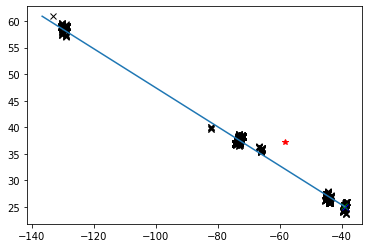

 25%|█████████████████████████████▌                                                                                        | 50/200 [00:31<02:25,  1.03it/s]

pid -22421.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     16305       1    52  5105  310104  310104   13124   6.430940  -0.184469   
      19659       1    52  5105  310104  310104   16531  -4.192118  -9.311736   
      231013      1    52  5105  310104  310104  229939  21.115080  12.610163   
      231148      1    52  5105  310104  310104  230074   1.693182  25.730343   
      14886       1    52  5105  310104  310104   11648  -0.274553  -6.419080   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      16338       1    52  5105  310104  310104   13157   6.238903  -1.643132   
      231404      1    52  5105  310104  310104  230336 -20.257624 -14.838630   
      18696       1    52  5105  310104  310104   15549 -10.274035   0.335313   
      17760       1    52  5105  310104  310104   14599  -2.622566   9.911771   
      198

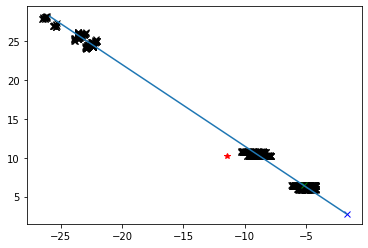

pid -22421.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     20947       1    52  5105  310104  310104   17860  10.213711  -0.716189   
      20940       1    52  5105  310104  310104   17853  10.111634  -1.360675   
      17497       1    52  5105  310104  310104   14334   3.245698  10.319308   
      20946       1    52  5105  310104  310104   17859  10.208317  -0.750243   
      18176       1    52  5105  310104  310104   15021  -6.885000   7.539979   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      18437       1    52  5105  310104  310104   15287  -9.153913   5.603210   
      228985      1    52  5105  310104  310104  227889 -20.220228 -15.942309   
      24598       1    52  5105  310104  310104   21570   8.821050 -11.464085   
      21928       1    52  5105  310104  310104   18855   4.167147  13.797975   
      229

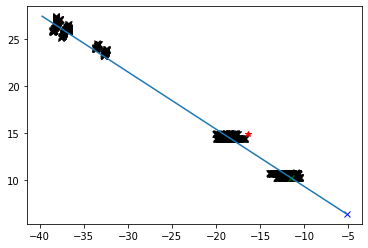

pid -22421.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     24964       1    52  5105  310104  310104   21949  13.587522  -6.282460   
      22812       1    52  5105  310104  310104   19751 -12.645040   6.941572   
      24141       1    52  5105  310104  310104   21106  -2.057030 -14.762509   
      230183      1    52  5105  310104  310104  229099  26.099869   2.532487   
      230877      1    52  5105  310104  310104  229799  24.576097  -9.504606   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      230688      1    52  5105  310104  310104  229610  -6.670827 -24.137012   
      230460      1    52  5105  310104  310104  229378 -14.316424  23.515074   
      230217      1    52  5105  310104  310104  229133  26.419308   8.229507   
      230813      1    52  5105  310104  310104  229735  12.720337 -24.578638   
      231

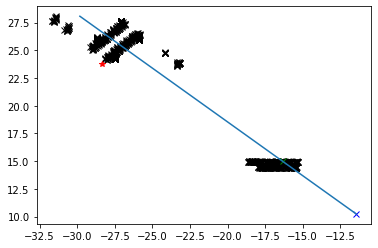

 26%|██████████████████████████████                                                                                        | 51/200 [00:31<02:18,  1.08it/s]

pid -22419.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     83532       1    52  5105  310104  310104   81004  -2.307342 -11.528406   
      82888       1    52  5105  310104  310104   80349  -2.455017 -12.183481   
      235924      1    52  5105  310104  310104  234962  -6.698760  22.341103   
      83537       1    52  5105  310104  310104   81009  -1.803491 -11.615890   
      83547       1    52  5105  310104  310104   81019   0.317217 -11.749955   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      83480       1    52  5105  310104  310104   80951 -10.740925  -7.962333   
      83054       1    52  5105  310104  310104   80522   8.282574  -6.954122   
      236893      1    52  5105  310104  310104  235953 -14.873332  22.787157   
      87670       1    52  5105  310104  310104   85204 -14.198197  -6.594145   
      236

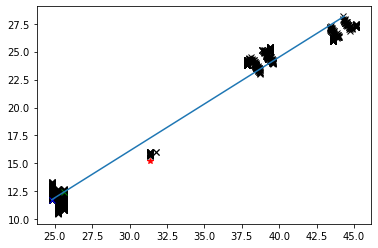

pid -22419.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     87727       1    52  5105  310104  310104   85262  -3.088685 -14.910764   
      87749       1    52  5105  310104  310104   85284  -3.157463 -15.199310   
      87718       1    52  5105  310104  310104   85253  -7.772136 -13.440189   
      87827       1    52  5105  310104  310104   85366   7.328637 -13.344061   
      87563       1    52  5105  310104  310104   85097 -11.526371   9.944586   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      87744       1    52  5105  310104  310104   85279  -4.966518 -12.361435   
      237038      1    52  5105  310104  310104  236101 -23.758017  -0.085505   
      237448      1    52  5105  310104  310104  236525  26.210554  -0.023097   
      87750       1    52  5105  310104  310104   85285  -2.963698 -13.281326   
      236

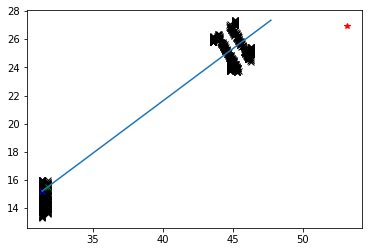

pid -22419.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     237978      1    52  5105  310104  310104  237064  -6.043077 -26.270283   
      237998      1    52  5105  310104  310104  237085  -6.123810 -26.521334   
      261532      1    52  5105  310104  310104  260937 -37.376648   4.154020   
      238067      1    52  5105  310104  310104  237154   4.799319 -26.587774   
      238187      1    52  5105  310104  310104  237294  22.869333 -14.148933   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      261550      1    52  5105  310104  310104  260955 -39.354000   0.571240   
      261377      1    52  5105  310104  310104  260782  11.549706  36.719135   
      261363      1    52  5105  310104  310104  260768  21.935926  32.685745   
      238024      1    52  5105  310104  310104  237111   2.768669 -24.428293   
      261

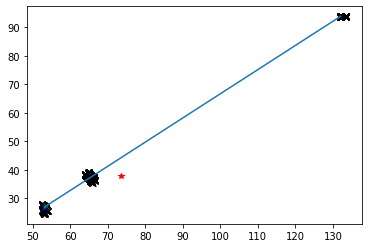

 26%|███████████████████████████████▎                                                                                      | 53/200 [00:33<01:55,  1.27it/s]

pid -22412.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     27386       1    52  5105  310104  310104   24406  -5.135520  -1.986705   
      26077       1    52  5105  310104  310104   23078  -5.378212  -2.083775   
      224568      1    52  5105  310104  310104  223421 -23.657099  -8.902532   
      25674       1    52  5105  310104  310104   22672  -1.871923   5.317613   
      25573       1    52  5105  310104  310104   22570   0.791839   5.582783   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224512      1    52  5105  310104  310104  223363 -24.809902   1.124549   
      224462      1    52  5105  310104  310104  223313 -19.983452  14.228746   
      29969       1    52  5105  310104  310104   27025  -6.533221  -3.168886   
      32728       1    52  5105  310104  310104   29819   8.699888   0.191241   
      309

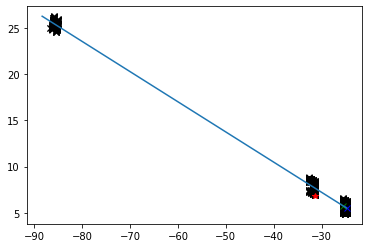

pid -22412.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     31288       1    52  5105  310104  310104   28362  -6.480017  -2.529601   
      30003       1    52  5105  310104  310104   27059  -6.723333  -2.627455   
      36788       1    52  5105  310104  310104   33936   3.056951  -9.532695   
      29433       1    52  5105  310104  310104   26484   1.242378   6.981190   
      224659      1    52  5105  310104  310104  223512 -23.638134  -8.111534   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      36500       1    52  5105  310104  310104   33648 -10.759955  -1.634691   
      36771       1    52  5105  310104  310104   33919   0.030147  -9.402663   
      224151      1    52  5105  310104  310104  223000  20.800686  11.685122   
      36519       1    52  5105  310104  310104   33667  -9.396420   0.229232   
      348

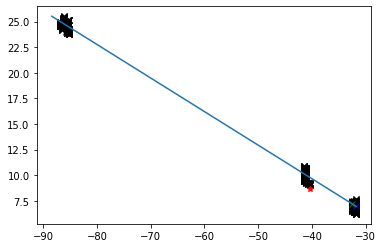

pid -22412.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     35485       1    52  5105  310104  310104   32617  -8.091751  -3.190022   
      36540       1    52  5105  310104  310104   33688  -8.330941  -3.289783   
      36828       1    52  5105  310104  310104   33976   5.583141  -7.168408   
      42006       1    52  5105  310104  310104   39212   0.657694 -12.505739   
      36240       1    52  5105  310104  310104   33380   4.876778   7.669523   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      36293       1    52  5105  310104  310104   33434  -1.030527   9.695073   
      36836       1    52  5105  310104  310104   33984   5.122835  -8.296301   
      41766       1    52  5105  310104  310104   38972 -13.052189  -0.396320   
      223299      1    52  5105  310104  310104  222145   6.869718  26.488779   
      368

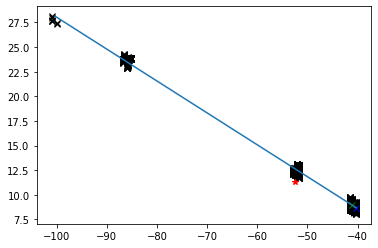

pid -22412.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     46295       1    52  5105  310104  310104   43537 -13.048223  -5.310101   
      46323       1    52  5105  310104  310104   43565 -13.150839  -5.353951   
      136153      1    52  5105  310104  310104  134165  18.645374 -26.582438   
      223096      1    52  5105  310104  310104  221939  22.813828   7.572349   
      45880       1    52  5105  310104  310104   43115  14.040529   2.082490   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      136005      1    52  5105  310104  310104  134017  -9.027840 -30.261679   
      136338      1    52  5105  310104  310104  134354  31.915623  -2.174433   
      46342       1    52  5105  310104  310104   43584 -10.051247  -8.545251   
      46627       1    52  5105  310104  310104   43870  14.719440  -2.797478   
      223

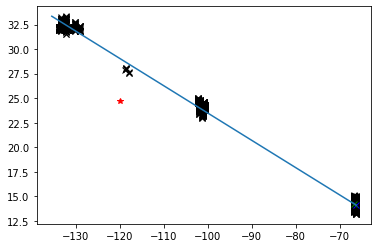

 28%|█████████████████████████████████▋                                                                                    | 57/200 [00:34<01:19,  1.80it/s]

pid -22411.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     13384       1    52  5105  310104  310104   10119  -6.430467   0.188059   
      11447       1    52  5105  310104  310104    8149   4.294523   4.771720   
      227893      1    52  5105  310104  310104  226781  -4.681332  23.957834   
      16241       1    52  5105  310104  310104   13058   6.381266  -0.561780   
      227985      1    52  5105  310104  310104  226875 -17.379671  17.023148   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227514      1    52  5105  310104  310104  226398   4.755832 -27.009201   
      228068      1    52  5105  310104  310104  226961 -24.569838   4.478211   
      28863       1    52  5105  310104  310104   25907 -11.733534   3.804863   
      15779       1    52  5105  310104  310104   12570   4.961957  -4.046600   
      288

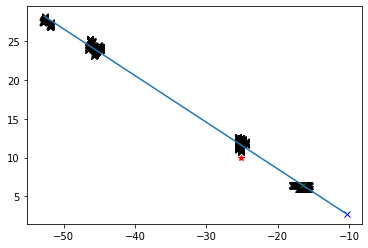

pid -22411.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28206       1    52  5105  310104  310104   25242  -9.629489   2.449103   
      28169       1    52  5105  310104  310104   25197  -9.864154   2.504221   
      227690      1    52  5105  310104  310104  226574  24.840471  -7.793230   
      28452       1    52  5105  310104  310104   25493   0.040858 -10.174443   
      28150       1    52  5105  310104  310104   25177  -7.818088   6.139257   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228468      1    52  5105  310104  310104  227368  23.469898   0.475386   
      33154       1    52  5105  310104  310104   30258  -4.531931 -11.860900   
      32752       1    52  5105  310104  310104   29843  15.091022   0.532995   
      33075       1    52  5105  310104  310104   30179 -10.321344  -6.965031   
      331

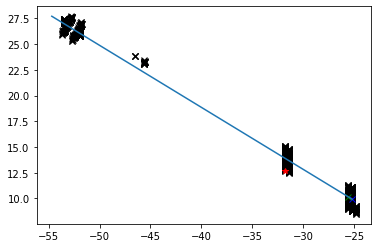

pid -22411.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     226451      1    52  5105  310104  310104  225314 -26.182875   5.748205   
      226420      1    52  5105  310104  310104  225283 -25.170740   5.574816   
      226559      1    52  5105  310104  310104  225422 -22.634623 -14.362213   
      226071      1    52  5105  310104  310104  224930  26.573330   3.533829   
      226612      1    52  5105  310104  310104  225475  -7.793651 -24.572729   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      254040      1    52  5105  310104  310104  253326 -31.257097  21.549063   
      254117      1    52  5105  310104  310104  253409 -36.828560  -9.615994   
      254118      1    52  5105  310104  310104  253410 -34.094555 -16.824970   
      254054      1    52  5105  310104  310104  253341 -33.333515  14.680868   
      253

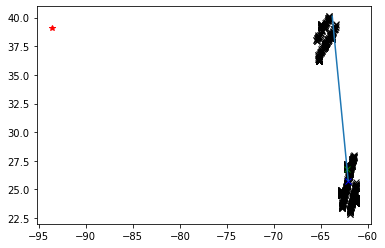

 29%|██████████████████████████████████▏                                                                                   | 58/200 [00:35<01:29,  1.58it/s]

pid -22410.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     81411       1    52  5105  310104  310104   78856   0.848285   8.804073   
      82501       1    52  5105  310104  310104   79959   0.899886   9.449727   
      82719       1    52  5105  310104  310104   80180  -8.756579  -2.713306   
      237379      1    52  5105  310104  310104  236455  20.534060 -15.398737   
      82731       1    52  5105  310104  310104   80192  -9.131515  -0.900859   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      237387      1    52  5105  310104  310104  236463  23.211386  -8.982831   
      237200      1    52  5105  310104  310104  236265  -6.490426 -24.224705   
      237110      1    52  5105  310104  310104  236173 -20.548296 -14.376575   
      237155      1    52  5105  310104  310104  236218 -14.120626 -19.198715   
      874

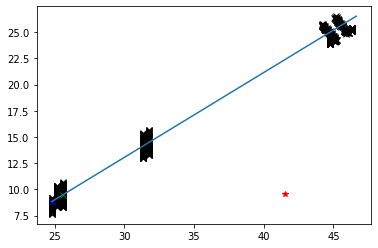

pid -22410.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     90877       1    52  5105  310104  310104   88470  0.958742  9.484988   
      91007       1    52  5105  310104  310104   88601 -6.519660  6.954868   
      95073       1    52  5105  310104  310104   92715  6.992072  6.520113   
      90996       1    52  5105  310104  310104   88590 -5.004299  8.115171   
      95456       1    52  5105  310104  310104   93099 -9.557304  0.389561   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      94325       1    52  5105  310104  310104   91953 -8.322210 -0.273285   
      95642       1    52  5105  310104  310104   93287 -3.310565 -7.639640   
      94952       1    52  5105  310104  310104   92594  8.259625 -1.034943   
      93815       1    52  5105  310104  310104   91439  4.711486  6.856264   
      95051       1    52  5105  

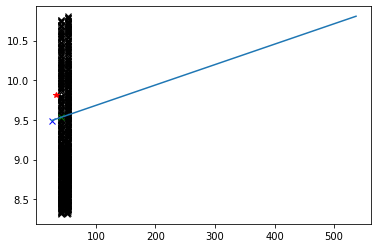

 30%|██████████████████████████████████▊                                                                                   | 59/200 [00:36<01:26,  1.64it/s]

pid -22409.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     40257       1    52  5105  310104  310104   37439  2.410047 -5.556300   
      38867       1    52  5105  310104  310104   36036  2.445644 -5.636815   
      39619       1    52  5105  310104  310104   36797 -4.691916  3.829534   
      45447       1    52  5105  310104  310104   42676 -8.581330 -3.731745   
      45594       1    52  5105  310104  310104   42824 -2.023370 -9.134639   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      38196       1    52  5105  310104  310104   35363 -5.135770  4.564782   
      39488       1    52  5105  310104  310104   36663 -1.959767  6.309771   
      38747       1    52  5105  310104  310104   35916 -0.628061 -6.754127   
      45226       1    52  5105  310104  310104   42454 -5.147393  8.569279   
      39083       1    52  5105  

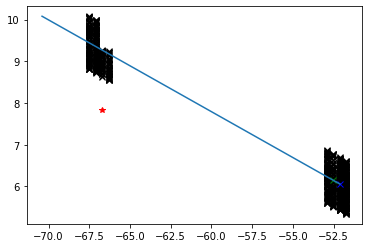

pid -22409.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55762       1    52  5105  310104  310104   53072   5.408786 -12.020391   
      55748       1    52  5105  310104  310104   53058   5.377931 -11.954161   
      64528       1    52  5105  310104  310104   61878  24.775623   3.895877   
      55712       1    52  5105  310104  310104   53022   0.160902 -13.188446   
      55489       1    52  5105  310104  310104   52798 -12.693503  -3.235290   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      60621       1    52  5105  310104  310104   57955  14.856963  -4.016968   
      60653       1    52  5105  310104  310104   57987  15.204556  -1.855492   
      60632       1    52  5105  310104  310104   57966  14.510283  -5.125333   
      143207      1    52  5105  310104  310104  141281  23.722675   6.947045   
      649

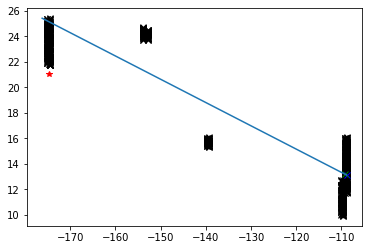

 30%|███████████████████████████████████▍                                                                                  | 60/200 [00:37<01:39,  1.41it/s]

pid -22402.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     82719       1    52  5105  310104  310104   80180  -8.756579  -2.713306   
      82756       1    52  5105  310104  310104   80217  -8.989282  -2.791272   
      87505       1    52  5105  310104  310104   85037  -4.503284  12.407798   
      87713       1    52  5105  310104  310104   85248  -7.385472 -10.937172   
      83099       1    52  5105  310104  310104   80568   8.226458  -4.055593   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      83008       1    52  5105  310104  310104   80473   6.655228  -7.683406   
      81831       1    52  5105  310104  310104   79281  -6.233896  -4.891255   
      237709      1    52  5105  310104  310104  236786 -18.545509  19.859367   
      81532       1    52  5105  310104  310104   78977  -4.687730   6.387858   
      868

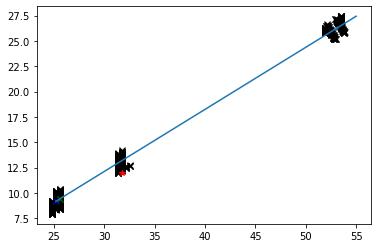

pid -22402.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     87646       1    52  5105  310104  310104   85180 -11.446495  -3.619862   
      86901       1    52  5105  310104  310104   84429 -11.980536  -3.802988   
      237711      1    52  5105  310104  310104  236788 -20.418633  17.790091   
      237835      1    52  5105  310104  310104  236918 -25.921986   8.570175   
      237917      1    52  5105  310104  310104  237002 -25.368696 -10.092865   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      87570       1    52  5105  310104  310104   85104 -12.140375   7.053254   
      237482      1    52  5105  310104  310104  236559  25.445787   2.436969   
      92084       1    52  5105  310104  310104   89681   1.280851 -15.925110   
      236844      1    52  5105  310104  310104  235903 -10.248432  21.319527   
      872

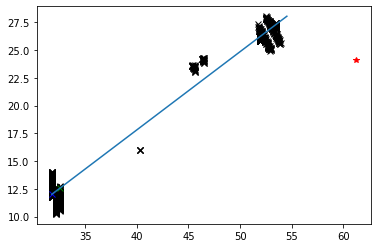

pid -22402.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     238796      1    52  5105  310104  310104  237907 -22.775202  -7.990534   
      238855      1    52  5105  310104  310104  237966 -19.445633 -15.373159   
      238621      1    52  5105  310104  310104  237728 -18.564814  16.204016   
      238899      1    52  5105  310104  310104  238010 -18.301065 -15.734121   
      238752      1    52  5105  310104  310104  237861 -23.534573   7.774110   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      263603      1    52  5105  310104  310104  263044 -36.016155  -1.521273   
      183418      1    52  5105  310104  310104  181783  -9.522581  50.298141   
      263808      1    52  5105  310104  310104  263253  14.198347 -33.133919   
      183480      1    52  5105  310104  310104  181845 -44.005001  26.155388   
      263

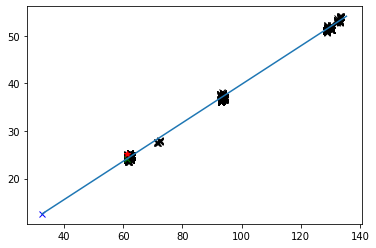

pid -22402.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     238796      1    52  5105  310104  310104  237907 -22.775202  -7.990534   
      238772      1    52  5105  310104  310104  237882 -23.781258  -8.198392   
      238899      1    52  5105  310104  310104  238010 -18.301065 -15.734121   
      238599      1    52  5105  310104  310104  237706 -19.997221  18.867863   
      238583      1    52  5105  310104  310104  237690 -11.791122  21.053621   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      238742      1    52  5105  310104  310104  237851 -23.048506   6.241421   
      239153      1    52  5105  310104  310104  238274  19.598820 -13.618166   
      261583      1    52  5105  310104  310104  260992 -35.270897 -17.789806   
      261509      1    52  5105  310104  310104  260914 -36.596722  10.143143   
      238

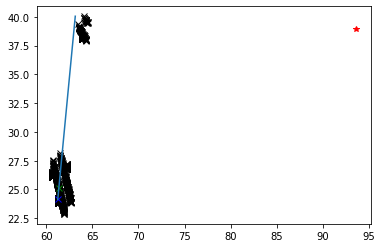

 31%|████████████████████████████████████▌                                                                                 | 62/200 [00:38<01:33,  1.47it/s]

pid -22401.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     82723       1    52  5105  310104  310104   80184  -8.802919  -1.747714   
      81701       1    52  5105  310104  310104   79148  -8.206055  -1.618377   
      237154      1    52  5105  310104  310104  236217 -13.316280 -19.873642   
      81866       1    52  5105  310104  310104   79317  -5.456517  -6.335494   
      236924      1    52  5105  310104  310104  235986 -19.649782  14.059891   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      237176      1    52  5105  310104  310104  236239  -7.997808 -22.854830   
      237019      1    52  5105  310104  310104  236082 -23.985518  -6.111558   
      81718       1    52  5105  310104  310104   79165  -7.437831  -0.877008   
      81820       1    52  5105  310104  310104   79268  -6.403852  -4.442127   
      813

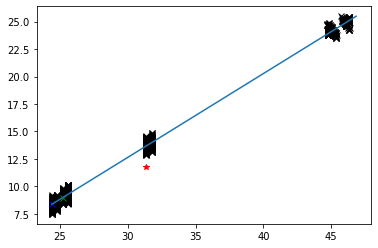

pid -22401.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     87636       1    52  5105  310104  310104   85170 -11.806913  -2.425560   
      86868       1    52  5105  310104  310104   84396 -12.139903  -2.504754   
      236928      1    52  5105  310104  310104  235990 -21.737183   9.428041   
      237038      1    52  5105  310104  310104  236101 -23.758017  -0.085505   
      87410       1    52  5105  310104  310104   84941   6.421061  10.196548   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      86515       1    52  5105  310104  310104   84038   8.430409   6.032442   
      87101       1    52  5105  310104  310104   84630   2.986434 -10.280524   
      87099       1    52  5105  310104  310104   84628   2.669703 -10.361656   
      237808      1    52  5105  310104  310104  236891 -27.236431   5.451040   
      237

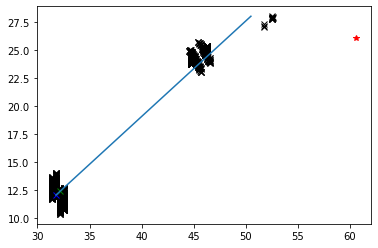

pid -22401.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     238787      1    52  5105  310104  310104  237898 -25.420898  -5.979401   
      238766      1    52  5105  310104  310104  237875 -25.456568  -6.005999   
      239917      1    52  5105  310104  310104  239043  -8.521525 -25.958544   
      239814      1    52  5105  310104  310104  238940 -24.999073 -11.033472   
      181088      1    52  5105  310104  310104  179427  32.018909  -8.505559   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      238660      1    52  5105  310104  310104  237767 -21.289942  16.478388   
      239615      1    52  5105  310104  310104  238739 -24.421070  10.209014   
      239675      1    52  5105  310104  310104  238801 -25.663683   6.839630   
      181038      1    52  5105  310104  310104  179377  27.228386 -17.250303   
      238

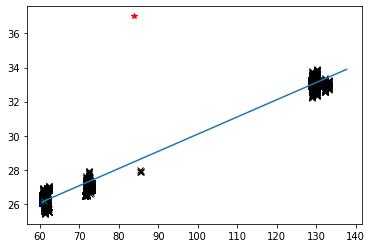

 32%|█████████████████████████████████████▏                                                                                | 63/200 [00:39<01:50,  1.24it/s]

pid -22400.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     98517       1    52  5105  310104  310104   96185 -0.016541  6.174545   
      98479       1    52  5105  310104  310104   96147 -0.015872  6.228037   
      104110      1    52  5105  310104  310104  101839  8.483479  2.256574   
      103537      1    52  5105  310104  310104  101254 -8.187772 -3.011439   
      97898       1    52  5105  310104  310104   95566  2.417770 -5.854746   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      98263       1    52  5105  310104  310104   95931  4.936950  2.431915   
      98706       1    52  5105  310104  310104   96375 -6.269085  2.881750   
      103823      1    52  5105  310104  310104  101550  0.347394 -7.990659   
      102922      1    52  5105  310104  310104  100633  6.589207  4.626585   
      104863      1    52  5105  

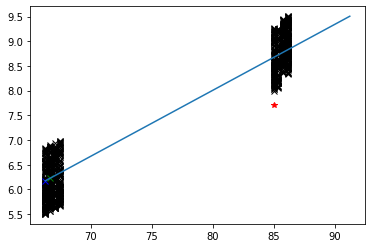

pid -22400.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     103132      1    52  5105  310104  310104  100845   0.006400   7.754958   
      103173      1    52  5105  310104  310104  100886   0.004759   7.705757   
      103306      1    52  5105  310104  310104  101020  -6.345303   4.371439   
      103131      1    52  5105  310104  310104  100844   0.022571   7.753366   
      108877      1    52  5105  310104  310104  106665   5.856721   9.065896   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      108871      1    52  5105  310104  310104  106659   5.483276   8.002192   
      109797      1    52  5105  310104  310104  107598   8.721772   7.924282   
      109468      1    52  5105  310104  310104  107266  -0.366711 -11.876986   
      110125      1    52  5105  310104  310104  107926 -11.783657  -0.182127   
      103

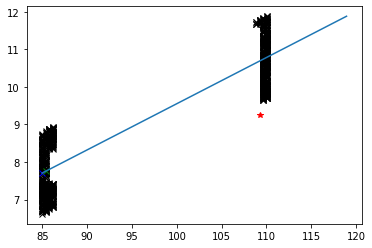

pid -22400.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     107717      1    52  5105  310104  310104  105494   0.121954  9.263541   
      109005      1    52  5105  310104  310104  106793   0.153103  9.309692   
      108004      1    52  5105  310104  310104  105786  -8.753644  2.888815   
      109019      1    52  5105  310104  310104  106807  -2.300292  9.072297   
      108166      1    52  5105  310104  310104  105948  -8.031496 -4.518931   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      113527      1    52  5105  310104  310104  111352   7.639304  9.300716   
      108869      1    52  5105  310104  310104  106657   4.803498  6.984256   
      113452      1    52  5105  310104  310104  111277  10.673344  5.561615   
      114480      1    52  5105  310104  310104  112314   9.323008  9.982818   
      109667      1  

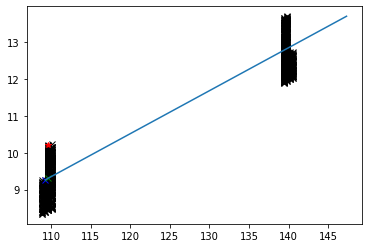

pid -22400.0
final 

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


                run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     111150      1    52  5105  310104  310104  108963 -2.185848  2.205293   
      111850      1    52  5105  310104  310104  109664  2.272469 -2.118673   
      111626      1    52  5105  310104  310104  109439 -0.649933 -3.040771   
      106445      1    52  5105  310104  310104  104210 -1.558880  2.690541   
      106910      1    52  5105  310104  310104  104680 -1.342918 -2.806344   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      111786      1    52  5105  310104  310104  109600  1.791870 -3.701219   
      106814      1    52  5105  310104  310104  104584 -3.968035 -1.080464   
      111462      1    52  5105  310104  310104  109275 -3.273815 -2.490694   
      105956      1    52  5105  310104  310104  103718  4.114578 -0.113992   
      111126      1    52  5105  310104  310104  108

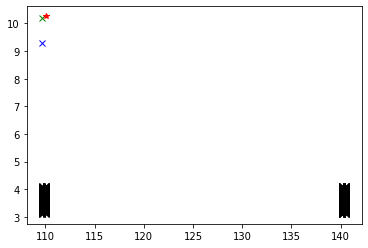

pid -22400.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     114593      1    52  5105  310104  310104  112427   0.140849  12.674928   
      114561      1    52  5105  310104  310104  112395   0.141952  12.727554   
      117542      1    52  5105  310104  310104  115408   8.018512  15.427013   
      118040      1    52  5105  310104  310104  115917   5.839895 -16.380770   
      115163      1    52  5105  310104  310104  113013  11.098621  -6.220061   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      118065      1    52  5105  310104  310104  115942   8.132953 -14.019054   
      114757      1    52  5105  310104  310104  112595 -13.579201   2.479182   
      113824      1    52  5105  310104  310104  111649 -10.959044   4.113193   
      117950      1    52  5105  310104  310104  115826  -8.374933 -13.996714   
      117

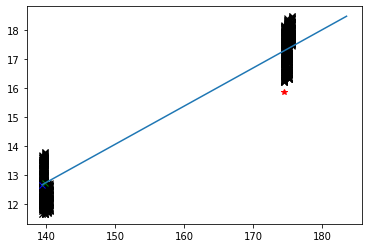

 32%|█████████████████████████████████████▊                                                                                | 64/200 [00:41<02:33,  1.13s/it]

pid -22399.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     94041       1    52  5105  310104  310104   91666 -2.307778  5.545095   
      92701       1    52  5105  310104  310104   90307 -2.364705  5.684519   
      1702        1    52  5105  310104  310104   92151 -3.343025 -4.989501   
      98235       1    52  5105  310104  310104   95903  8.298297  2.785041   
      99765       1    52  5105  310104  310104   97452 -0.864464  8.787928   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      98475       1    52  5105  310104  310104   96143  0.368383  7.910445   
      92764       1    52  5105  310104  310104   90370 -5.119901  4.651443   
      94037       1    52  5105  310104  310104   91662 -1.870906  4.819735   
      92790       1    52  5105  310104  310104   90396 -4.585286  5.179587   
      99077       1    52  5105  

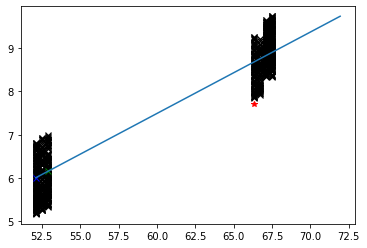

pid -22399.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     109975      1    52  5105  310104  310104  107776  -4.854833  12.134853   
      109965      1    52  5105  310104  310104  107766  -4.880162  12.199315   
      110042      1    52  5105  310104  310104  107843  -9.176291   9.303183   
      110216      1    52  5105  310104  310104  108018 -12.154307  -4.797198   
      110365      1    52  5105  310104  310104  108172   2.262716 -12.860716   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      108876      1    52  5105  310104  310104  106664   5.849913   9.030351   
      109221      1    52  5105  310104  310104  107012 -10.734513   0.728619   
      109207      1    52  5105  310104  310104  106998 -10.645049   1.561567   
      109148      1    52  5105  310104  310104  106937  -9.269438   5.459896   
      109

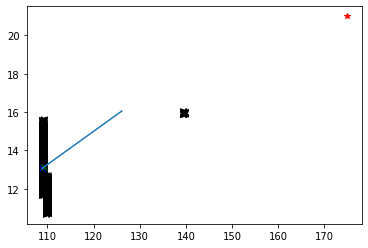

 32%|██████████████████████████████████████▎                                                                               | 65/200 [00:43<02:35,  1.15s/it]

pid -22397.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     12266       1    52  5105  310104  310104    8982  -1.524392  5.750221   
      12029       1    52  5105  310104  310104    8742   1.623304  6.241514   
      15133       1    52  5105  310104  310104   11897   0.941873 -5.826911   
      15596       1    52  5105  310104  310104   12373   3.401375 -4.826820   
      15138       1    52  5105  310104  310104   11902   1.584763 -5.742273   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      231398      1    52  5105  310104  310104  230330 -25.828094 -3.074897   
      18650       1    52  5105  310104  310104   15503  -9.958449  2.327849   
      14863       1    52  5105  310104  310104   11625  -1.112710 -6.308734   
      20727       1    52  5105  310104  310104   17633   8.876112 -6.148423   
      231397      1  

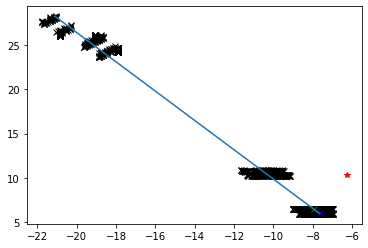

 34%|████████████████████████████████████████                                                                              | 68/200 [00:43<01:23,  1.59it/s]

pid -22394.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     86886       1    52  5105  310104  310104   84414 -10.822831  -0.543563   
      239581      1    52  5105  310104  310104  238705 -18.853348  16.330076   
      239828      1    52  5105  310104  310104  238954 -21.285084 -12.953745   
      91692       1    52  5105  310104  310104   89288   7.345319  11.636982   
      239578      1    52  5105  310104  310104  238702 -16.253893  18.879446   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      91628       1    52  5105  310104  310104   89224  11.812974   4.458842   
      91992       1    52  5105  310104  310104   89589 -10.220898  -7.644156   
      86850       1    52  5105  310104  310104   84378  -9.964075   0.521282   
      87138       1    52  5105  310104  310104   84667   7.145785  -6.764361   
      917

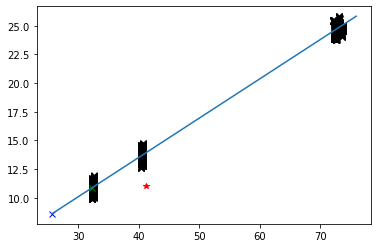

pid -22394.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     91142       1    52  5105  310104  310104   88736 -11.027210  -0.548502   
      91364       1    52  5105  310104  310104   88958   1.196622 -10.975837   
      95534       1    52  5105  310104  310104   93177 -10.553351  -4.072330   
      91258       1    52  5105  310104  310104   88852  -5.939281  -9.319248   
      95888       1    52  5105  310104  310104   93538  10.058090  -5.163351   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      95609       1    52  5105  310104  310104   93254  -6.979389 -10.374953   
      91773       1    52  5105  310104  310104   89369  -2.061204  12.049441   
      91947       1    52  5105  310104  310104   89544 -12.019386  -2.231376   
      95718       1    52  5105  310104  310104   93364   1.511328  -9.995299   
      912

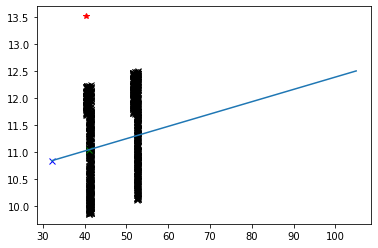

 34%|████████████████████████████████████████▋                                                                             | 69/200 [00:44<01:23,  1.57it/s]

pid -22392.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     60626       1    52  5105  310104  310104   57960  11.952224  -3.728861   
      59735       1    52  5105  310104  310104   57067  12.060007  -3.757433   
      63756       1    52  5105  310104  310104   61101  17.155411   3.486896   
      63541       1    52  5105  310104  310104   60886   4.579423 -16.723598   
      63751       1    52  5105  310104  310104   61096  16.999981   4.180306   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      69205       1    52  5105  310104  310104   66582  19.628424  10.065732   
      64125       1    52  5105  310104  310104   61471 -17.825304  -5.352525   
      64487       1    52  5105  310104  310104   61837  18.073889  -3.953478   
      63810       1    52  5105  310104  310104   61155  12.213602  14.050186   
      642

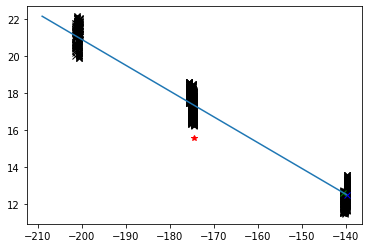

 36%|█████████████████████████████████████████▉                                                                            | 71/200 [00:45<01:13,  1.76it/s]

pid -22389.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     100531      1    52  5105  310104  310104   98226  11.974472   3.330673   
      99553       1    52  5105  310104  310104   97239  12.182463   3.383317   
      179801      1    52  5105  310104  310104  178138 -29.121284  -7.180848   
      243453      1    52  5105  310104  310104  242617  17.720236 -19.166853   
      243098      1    52  5105  310104  310104  242262 -25.443472  -5.851382   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      242799      1    52  5105  310104  310104  241959 -12.800018  24.030191   
      180144      1    52  5105  310104  310104  178481  24.540308 -15.282204   
      243434      1    52  5105  310104  310104  242598  14.613972 -20.536610   
      101051      1    52  5105  310104  310104   98747  -7.451218 -11.280598   
      242

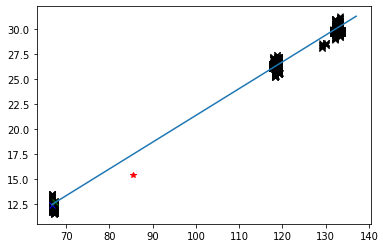

 36%|██████████████████████████████████████████▍                                                                           | 72/200 [00:46<01:17,  1.66it/s]

pid -22384.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     42598       1    52  5105  310104  310104   39809  0.102435  3.899885   
      42494       1    52  5105  310104  310104   39705  0.101776  3.862786   
      46903       1    52  5105  310104  310104   44148  1.510199  5.387916   
      47597       1    52  5105  310104  310104   44845 -1.965903 -5.280964   
      49140       1    52  5105  310104  310104   46404  1.402551 -5.338441   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      43229       1    52  5105  310104  310104   40447 -0.353141 -3.341186   
      42479       1    52  5105  310104  310104   39690  0.308044  3.343261   
      43188       1    52  5105  310104  310104   40406 -1.282420 -3.102776   
      42464       1    52  5105  310104  310104   39675  0.638459  3.295996   
      47988       1    52  5105  

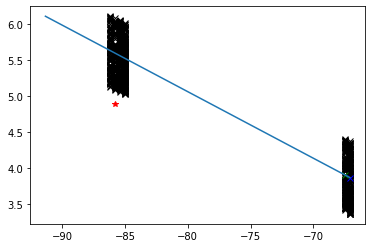

pid -22384.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     51519       1    52  5105  310104  310104   48807  0.206358   6.496555   
      53030       1    52  5105  310104  310104   50327  0.204032   6.447769   
      63009       1    52  5105  310104  310104   60353  4.831436  13.570209   
      51712       1    52  5105  310104  310104   49002 -5.036283   4.187709   
      51765       1    52  5105  310104  310104   49055 -4.044582   5.153562   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      59326       1    52  5105  310104  310104   56655 -9.614385  -0.492896   
      53100       1    52  5105  310104  310104   50398 -2.592225   5.186477   
      59341       1    52  5105  310104  310104   56670 -9.104355  -2.966118   
      59140       1    52  5105  310104  310104   56469 -5.905564   9.199333   
      1885        1  

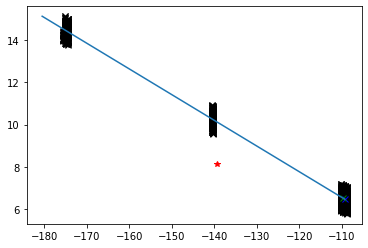

pid -22384.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     57672       1    52  5105  310104  310104   54994  0.285978   8.145016   
      60783       1    52  5105  310104  310104   58117  8.229280   5.841028   
      60779       1    52  5105  310104  310104   58113  8.271097   5.858495   
      62115       1    52  5105  310104  310104   59455  1.436297  10.012204   
      61969       1    52  5105  310104  310104   59309  8.252028   5.850888   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      58401       1    52  5105  310104  310104   55724 -0.298294  -7.504890   
      57541       1    52  5105  310104  310104   54861  5.300949   5.320621   
      59724       1    52  5105  310104  310104   57056  7.847457  -4.056804   
      61452       1    52  5105  310104  310104   58789 -5.623104  -7.597699   
      59715       1  

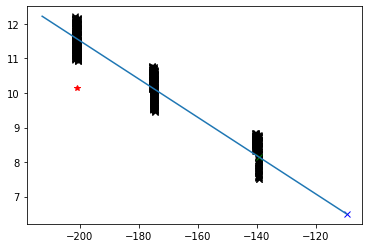

pid -22384.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     65477       1    52  5105  310104  310104   62832 -0.112277  10.148273   
      66702       1    52  5105  310104  310104   64062 -2.798532   9.742495   
      66999       1    52  5105  310104  310104   64360 -9.103616  -4.457957   
      66091       1    52  5105  310104  310104   63447 -1.968674  -9.928671   
      71751       1    52  5105  310104  310104   69138 -7.205420  -8.479901   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      71797       1    52  5105  310104  310104   69184 -4.687797  -9.054231   
      72201       1    52  5105  310104  310104   69591  9.843520  -2.754499   
      69887       1    52  5105  310104  310104   67268  9.673360   3.260766   
      67168       1    52  5105  310104  310104   64530  1.612286 -10.949490   
      71087       1  

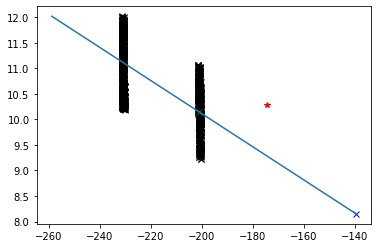

 36%|███████████████████████████████████████████                                                                           | 73/200 [00:47<01:39,  1.28it/s]

pid -22383.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     91727       1    52  5105  310104  310104   89323   2.829467  11.728479   
      90857       1    52  5105  310104  310104   88449   2.901345  12.068643   
      91330       1    52  5105  310104  310104   88924  -1.905929 -12.261724   
      91418       1    52  5105  310104  310104   89012   8.516918  -8.797659   
      90769       1    52  5105  310104  310104   88361  10.547038   6.195969   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      239283      1    52  5105  310104  310104  238407  24.735096   0.965605   
      240051      1    52  5105  310104  310104  239179  12.465688 -21.221508   
      240075      1    52  5105  310104  310104  239203   5.264934 -24.184799   
      96010       1    52  5105  310104  310104   93661  11.864259   9.723810   
      239

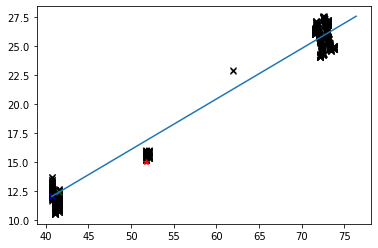

pid -22383.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     240495      1    52  5105  310104  310104  239631   4.965630  23.537899   
      240473      1    52  5105  310104  310104  239609   5.056891  23.847115   
      240713      1    52  5105  310104  310104  239851 -18.519579  15.918147   
      240865      1    52  5105  310104  310104  240005 -24.038492  -0.826060   
      240708      1    52  5105  310104  310104  239846 -21.888828  10.646505   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      185487      1    52  5105  310104  310104  183893   0.022879 -66.549393   
      240387      1    52  5105  310104  310104  239523  14.175458  23.016562   
      240817      1    52  5105  310104  310104  239957 -25.256872  -7.138530   
      263236      1    52  5105  310104  310104  262675  35.769230   0.899050   
      185

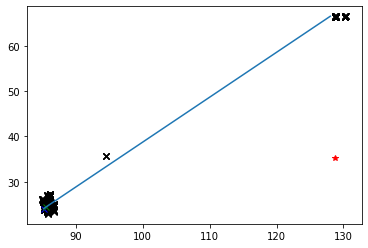

pid -22383.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     180431      1    52  5105  310104  310104  178768   6.460929  34.710735   
      180411      1    52  5105  310104  310104  178748   6.594625  35.802879   
      180367      1    52  5105  310104  310104  178704  19.991488  29.100594   
      180372      1    52  5105  310104  310104  178709  22.926895  26.848177   
      181011      1    52  5105  310104  310104  179350  31.032005 -19.040800   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      181077      1    52  5105  310104  310104  179416  31.310297 -15.583134   
      182914      1    52  5105  310104  310104  181266 -11.096100  47.051388   
      1382        1    52  5105  310104  310104  180956  24.855663 -32.343784   
      183094      1    52  5105  310104  310104  181452 -20.026871 -44.001434   
      183

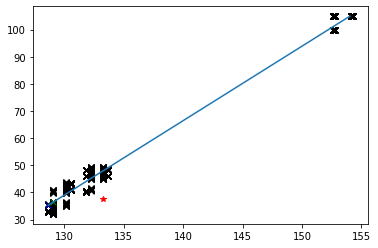

pid -22383.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     187434      1    52  5105  310104  310104  185910  -3.061216  23.514776   
      187577      1    52  5105  310104  310104  186053 -15.704245  17.818487   
      187361      1    52  5105  310104  310104  185837   2.142665  23.660259   
      187300      1    52  5105  310104  310104  185776   8.796784  22.121605   
      187576      1    52  5105  310104  310104  186052 -18.366503  15.156229   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      187668      1    52  5105  310104  310104  186144 -26.746628   5.162650   
      187183      1    52  5105  310104  310104  185659  23.191202  14.291243   
      188379      1    52  5105  310104  310104  186863  26.469252  -6.445047   
      188075      1    52  5105  310104  310104  186553   6.449996 -26.468468   
      187

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


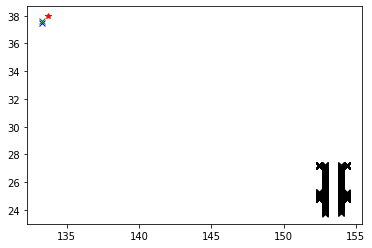

pid -22383.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     181346      1    52  5105  310104  310104  179687   6.760193  37.357193   
      181329      1    52  5105  310104  310104  179670   6.719130  36.992748   
      181226      1    52  5105  310104  310104  179567  33.403320  18.036133   
      181228      1    52  5105  310104  310104  179569  30.775082  22.218950   
      181168      1    52  5105  310104  310104  179509  37.387985   6.486906   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      193520      1    52  5105  310104  310104  192034  -9.342588  53.136375   
      194519      1    52  5105  310104  310104  193040 -56.626987  25.560730   
      194723      1    52  5105  310104  310104  193255  47.131905 -40.479008   
      192864      1    52  5105  310104  310104  191369  48.957451  14.526096   
      193

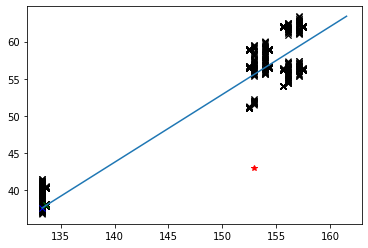

 37%|███████████████████████████████████████████▋                                                                          | 74/200 [00:49<02:31,  1.20s/it]

pid -22382.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     43500       1    52  5105  310104  310104   40719  3.356613 -0.979364   
      43585       1    52  5105  310104  310104   40804  3.387398 -0.988324   
      46836       1    52  5105  310104  310104   44080  1.584580  4.767378   
      42803       1    52  5105  310104  310104   40017 -3.520389 -0.266319   
      43165       1    52  5105  310104  310104   40383 -1.886685 -2.984200   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      43348       1    52  5105  310104  310104   40567  1.982427 -3.469468   
      46776       1    52  5105  310104  310104   44020  4.349733  3.354480   
      48494       1    52  5105  310104  310104   45750 -3.173545  4.444382   
      43268       1    52  5105  310104  310104   40486  0.954159 -3.914991   
      49431       1    52  5105  

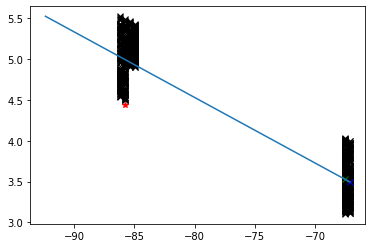

pid -22382.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     53949       1    52  5105  310104  310104   51254  5.613010  -1.670032   
      52681       1    52  5105  310104  310104   49976  5.673724  -1.689618   
      62503       1    52  5105  310104  310104   59845 -4.454646 -10.146195   
      57713       1    52  5105  310104  310104   55035 -0.589782   8.270918   
      58473       1    52  5105  310104  310104   55796  2.768919  -7.780087   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      62451       1    52  5105  310104  310104   59792 -9.244411  -5.071537   
      62675       1    52  5105  310104  310104   60019  2.294818 -10.289987   
      61792       1    52  5105  310104  310104   59131  9.425071  -4.652203   
      57788       1    52  5105  310104  310104   55110 -4.544431   7.571288   
      58628       1  

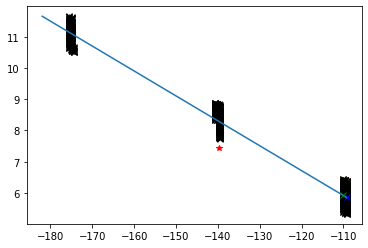

 38%|████████████████████████████████████████████▎                                                                         | 75/200 [00:50<02:25,  1.16s/it]

pid -22379.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     10755       1    52  5105  310104  310104    7449   5.896114   0.416218   
      15796       1    52  5105  310104  310104   12587   5.332348  -3.563898   
      226293      1    52  5105  310104  310104  225154 -11.417133  23.783184   
      27872       1    52  5105  310104  310104   24896  11.177304   1.167671   
      226811      1    52  5105  310104  310104  225676  24.525352 -11.087371   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227568      1    52  5105  310104  310104  226452  14.302438 -19.046156   
      28450       1    52  5105  310104  310104   25491   0.226682 -10.426971   
      27999       1    52  5105  310104  310104   25024   5.871317  10.316621   
      226988      1    52  5105  310104  310104  225856   9.371428  21.899092   
      227

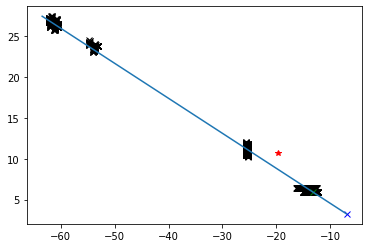

pid -22379.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     28637       1    52  5105  310104  310104   25678  12.803384   2.440462   
      28617       1    52  5105  310104  310104   25658  13.119979   2.511828   
      229230      1    52  5105  310104  310104  228134  17.286180 -16.542500   
      228661      1    52  5105  310104  310104  227561  18.413736  17.162857   
      29020       1    52  5105  310104  310104   26065   0.082284 -13.037175   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227749      1    52  5105  310104  310104  226634  25.993587   8.164102   
      227714      1    52  5105  310104  310104  226599  26.968706   1.116358   
      227715      1    52  5105  310104  310104  226600  26.181299   6.313584   
      228052      1    52  5105  310104  310104  226945 -23.864464  10.298269   
      291

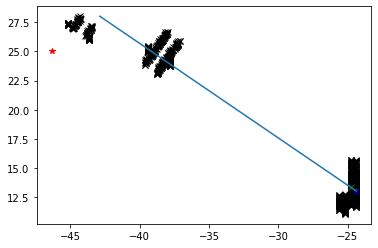

 38%|█████████████████████████████████████████████▍                                                                        | 77/200 [00:51<01:33,  1.31it/s]

pid -22378.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     43459       1    52  5105  310104  310104   40678  2.969604 -1.893277   
      43371       1    52  5105  310104  310104   40590  3.001090 -1.913913   
      42616       1    52  5105  310104  310104   39827 -1.042751  3.362621   
      48348       1    52  5105  310104  310104   45604  1.218108  5.060265   
      47046       1    52  5105  310104  310104   44291 -0.503110  5.294014   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      49396       1    52  5105  310104  310104   46663  5.554025 -1.005481   
      49328       1    52  5105  310104  310104   46595  5.589621 -1.022876   
      42384       1    52  5105  310104  310104   39594  1.327804  3.774592   
      46796       1    52  5105  310104  310104   44040  4.174944  3.911547   
      48725       1    52  5105  

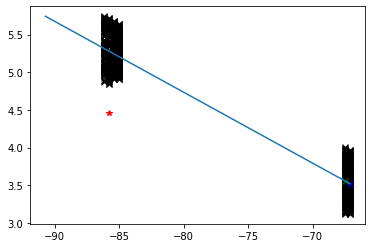

pid -22378.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     52546       1    52  5105  310104  310104   49841  4.955630  -3.199818   
      53845       1    52  5105  310104  310104   51150  4.927076  -3.180021   
      59092       1    52  5105  310104  310104   56421 -3.975797   7.569983   
      62438       1    52  5105  310104  310104   59779 -9.210530  -6.978709   
      62719       1    52  5105  310104  310104   60063  8.407830  -7.928773   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      62586       1    52  5105  310104  310104   59928 -0.406743 -11.145769   
      52225       1    52  5105  310104  310104   49516 -3.272926  -5.424008   
      62732       1    52  5105  310104  310104   60076  7.452898  -8.296130   
      62192       1    52  5105  310104  310104   59532 -3.950262  11.285432   
      51415       1  

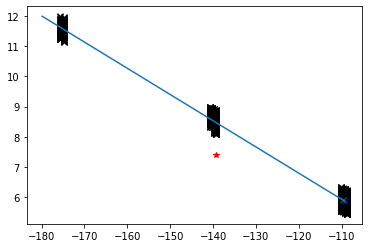

pid -22378.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     58571       1    52  5105  310104  310104   55897   6.222566  -4.047557   
      57241       1    52  5105  310104  310104   54560   6.253717  -4.070279   
      57967       1    52  5105  310104  310104   55290  -7.029180   2.381771   
      67271       1    52  5105  310104  310104   64635   9.742135  -9.043876   
      61908       1    52  5105  310104  310104   59247  10.687588   1.522448   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      67329       1    52  5105  310104  310104   64694  11.485907  -7.921340   
      62592       1    52  5105  310104  310104   59934  -0.585704 -10.188643   
      66886       1    52  5105  310104  310104   64247 -12.345245  -2.994803   
      55934       1    52  5105  310104  310104   53248   6.749430   1.297695   
      582

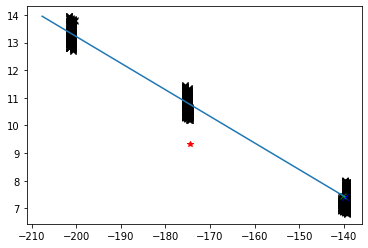

 40%|███████████████████████████████████████████████▏                                                                      | 80/200 [00:52<01:03,  1.89it/s]

pid -22373.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     79913       1    52  5105  310104  310104   77332   4.430236   4.930514   
      80301       1    52  5105  310104  310104   77722  -5.738153   3.317952   
      87024       1    52  5105  310104  310104   84552  -4.937127  -8.317264   
      81034       1    52  5105  310104  310104   78475   6.038921  -2.727660   
      238690      1    52  5105  310104  310104  237798 -22.139708   7.673661   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      238620      1    52  5105  310104  310104  237727 -17.607258  17.007500   
      239050      1    52  5105  310104  310104  238165   6.082467 -23.887241   
      238890      1    52  5105  310104  310104  238001 -13.766083 -19.539425   
      238316      1    52  5105  310104  310104  237423  23.724463   6.697187   
      238

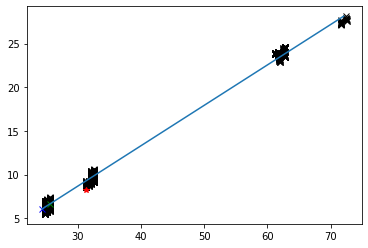

pid -22373.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     86495       1    52  5105  310104  310104   84018   5.738379   6.443603   
      86543       1    52  5105  310104  310104   84066   5.848955   6.573245   
      86651       1    52  5105  310104  310104   84175   1.077882   8.733193   
      87069       1    52  5105  310104  310104   84597   1.851865  -8.425682   
      87257       1    52  5105  310104  310104   84786   8.583239  -1.925561   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      239259      1    52  5105  310104  310104  238381  26.590578   4.019197   
      239876      1    52  5105  310104  310104  239002 -15.423279 -19.305265   
      86656       1    52  5105  310104  310104   84180   0.902044   9.772575   
      91701       1    52  5105  310104  310104   89297   5.703228  11.987880   
      867

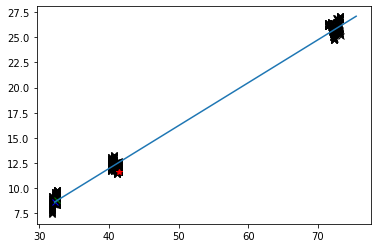

 41%|████████████████████████████████████████████████▍                                                                     | 82/200 [00:53<00:57,  2.05it/s]

pid -22371.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     108367      1    52  5105  310104  310104  106153 -1.082043 -5.234626   
      106986      1    52  5105  310104  310104  104756 -1.093776 -5.291689   
      108137      1    52  5105  310104  310104  105919 -5.011776 -1.858624   
      106969      1    52  5105  310104  310104  104739 -1.368424 -5.227917   
      106985      1    52  5105  310104  310104  104755 -1.112288 -5.288757   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      112120      1    52  5105  310104  310104  109935  5.703409  3.940055   
      112312      1    52  5105  310104  310104  110129  2.758482  7.668171   
      106963      1    52  5105  310104  310104  104733 -1.360364 -4.595441   
      108462      1    52  5105  310104  310104  106250  2.067002 -5.586749   
      108108      1    52  5105  

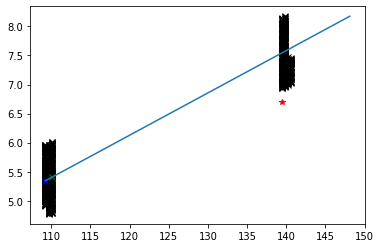

pid -22371.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     112995      1    52  5105  310104  310104  110818 -1.350832 -6.586367   
      111617      1    52  5105  310104  310104  109430 -1.362985 -6.647862   
      115529      1    52  5105  310104  310104  113384  2.425038  9.182325   
      116147      1    52  5105  310104  310104  114005 -2.021836 -9.281482   
      111453      1    52  5105  310104  310104  109266 -6.342214 -2.330885   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      116484      1    52  5105  310104  310104  114344  8.308257 -2.153714   
      115949      1    52  5105  310104  310104  113806 -8.871626 -5.209146   
      112355      1    52  5105  310104  310104  110172  0.179656  5.866741   
      116833      1    52  5105  310104  310104  114694 -5.562709  8.693228   
      112595      1    52  5105  

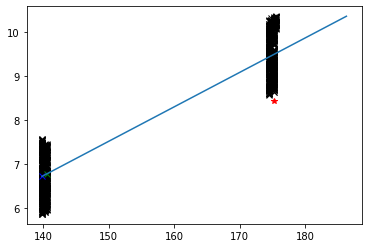

 42%|████████████████████████████████████████████████▉                                                                     | 83/200 [00:54<01:10,  1.67it/s]

pid -22370.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     11790       1    52  5105  310104  310104    8501   2.795221   5.228296   
      18885       1    52  5105  310104  310104   15741 -10.597110  -1.491732   
      12454       1    52  5105  310104  310104    9171  -1.704887   6.221123   
      11807       1    52  5105  310104  310104    8519   1.609052   5.719623   
      16753       1    52  5105  310104  310104   13578   8.437523   5.907860   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      227607      1    52  5105  310104  310104  226491  21.999483 -17.180109   
      226895      1    52  5105  310104  310104  225761  26.252323   6.696736   
      17699       1    52  5105  310104  310104   14538  -1.952371  10.017919   
      13886       1    52  5105  310104  310104   10628  -5.975117  -2.298798   
      227

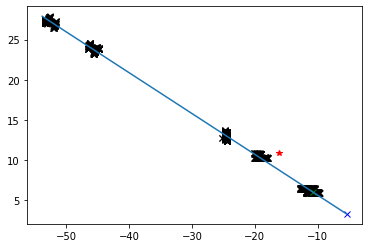

pid -22370.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     17452       1    52  5105  310104  310104   14289   0.257526  10.792588   
      230007      1    52  5105  310104  310104  228921  19.239080 -15.579521   
      229794      1    52  5105  310104  310104  228706 -22.347702 -12.003324   
      230069      1    52  5105  310104  310104  228985  23.449011  -9.841711   
      19633       1    52  5105  310104  310104   16505  -4.272935  -9.270558   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228699      1    52  5105  310104  310104  227599  13.257747  23.469011   
      1219        1    52  5105  310104  310104   19904 -13.538612   6.422236   
      20274       1    52  5105  310104  310104   17154   4.603997  -9.663036   
      21475       1    52  5105  310104  310104   18396  11.731359   9.335480   
      220

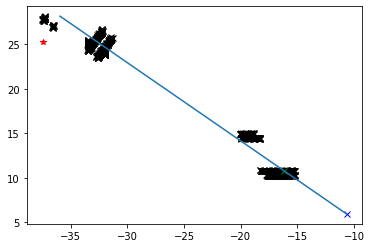

 42%|█████████████████████████████████████████████████▌                                                                    | 84/200 [00:55<01:13,  1.58it/s]

pid -22369.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     4955        1    52  5105  310104  310104    1523   1.581078  2.940999   
      5586        1    52  5105  310104  310104    2159  -1.505970  2.443486   
      12466       1    52  5105  310104  310104    9183  -2.842989  5.749705   
      3633        1    52  5105  310104  310104     185   3.246106  0.442403   
      231310      1    52  5105  310104  310104  230240 -25.719732 -0.254499   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      230970      1    52  5105  310104  310104  229894  24.682014  2.541415   
      15568       1    52  5105  310104  310104   12345   3.057952 -5.090338   
      230193      1    52  5105  310104  310104  229109  28.133377  0.885582   
      13677       1    52  5105  310104  310104   10415  -5.840096 -0.841722   
      16268       1  

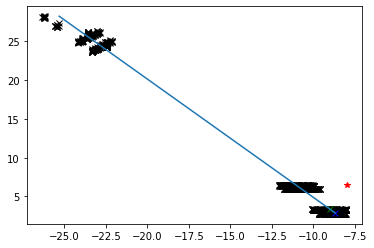

 42%|██████████████████████████████████████████████████▏                                                                   | 85/200 [00:55<01:03,  1.82it/s]

pid -22368.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     11900       1    52  5105  310104  310104    8612   2.391887   5.395362   
      1917        1    52  5105  310104  310104  238214  17.973026 -18.954737   
      14744       1    52  5105  310104  310104   11504  -2.701174  -5.267251   
      83547       1    52  5105  310104  310104   81019   0.317217 -11.749955   
      83537       1    52  5105  310104  310104   81009  -1.803491 -11.615890   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      17443       1    52  5105  310104  310104   14280   4.496163   9.156817   
      15478       1    52  5105  310104  310104   12251   2.778493  -5.776421   
      15496       1    52  5105  310104  310104   12269   1.914333  -6.134367   
      14547       1    52  5105  310104  310104   11305  -3.761985  -5.180351   
      833

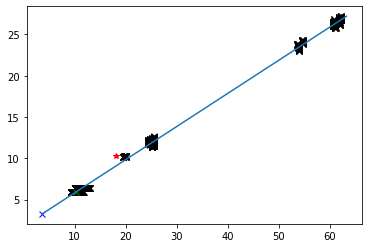

 43%|██████████████████████████████████████████████████▋                                                                   | 86/200 [00:55<01:00,  1.89it/s]

pid -22364.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     12827       1    52  5105  310104  310104    9547  -3.845895   4.485728   
      20431       1    52  5105  310104  310104   17317   4.695326  -9.616503   
      235020      1    52  5105  310104  310104  234042  10.235947  21.584433   
      12816       1    52  5105  310104  310104    9536  -3.501811   4.749753   
      235471      1    52  5105  310104  310104  234499   2.243667 -23.783632   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      235064      1    52  5105  310104  310104  234086 -10.295348  22.384047   
      17871       1    52  5105  310104  310104   14711  -2.806523   9.882635   
      18330       1    52  5105  310104  310104   15179  -7.626843   6.798135   
      16681       1    52  5105  310104  310104   13505  10.678510   0.977790   
      178

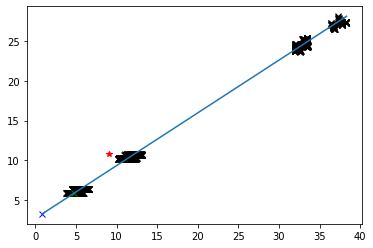

pid -22364.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     18101       1    52  5105  310104  310104   14944  -3.801706  10.071825   
      19966       1    52  5105  310104  310104   16843  -0.543907 -10.747231   
      18081       1    52  5105  310104  310104   14923  -5.917856   8.993592   
      18080       1    52  5105  310104  310104   14922  -5.983286   8.960255   
      17182       1    52  5105  310104  310104   14011   8.435596   6.696488   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      233697      1    52  5105  310104  310104  232673 -13.767751 -20.107559   
      233396      1    52  5105  310104  310104  232351   0.283181  27.216013   
      233303      1    52  5105  310104  310104  232258  15.182772  20.547216   
      234035      1    52  5105  310104  310104  233024  24.289719  -1.913759   
      233

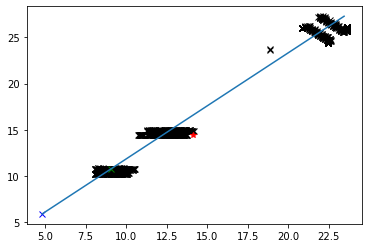

pid -22364.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     22623       1    52  5105  310104  310104   19559  -7.534029  12.272774   
      22346       1    52  5105  310104  310104   19281  -3.220597  14.128243   
      24561       1    52  5105  310104  310104   21533   5.534693 -13.849176   
      24429       1    52  5105  310104  310104   21399   1.283714 -14.346478   
      235645      1    52  5105  310104  310104  234679  25.491743  -7.080497   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      235480      1    52  5105  310104  310104  234508   5.326646 -27.612637   
      234711      1    52  5105  310104  310104  233728  10.045300 -23.822206   
      234621      1    52  5105  310104  310104  233637 -13.285620 -22.546089   
      22642       1    52  5105  310104  310104   19578  -8.665464  11.561846   
      234

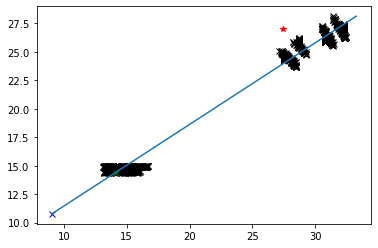

 44%|███████████████████████████████████████████████████▎                                                                  | 87/200 [00:56<01:09,  1.62it/s]

pid -22363.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     38537       1    52  5105  310104  310104   35704 -5.113955 -2.183415   
      39908       1    52  5105  310104  310104   37087 -4.990622 -2.130363   
      38608       1    52  5105  310104  310104   35776 -3.576354 -4.170335   
      39981       1    52  5105  310104  310104   37162 -3.535695 -4.117129   
      44587       1    52  5105  310104  310104   41811 -0.912131 -7.756291   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      45482       1    52  5105  310104  310104   42712 -6.895033 -5.462484   
      38121       1    52  5105  310104  310104   35287 -2.729051  5.656181   
      39443       1    52  5105  310104  310104   36618 -1.078831  6.120219   
      38590       1    52  5105  310104  310104   35758 -4.423797 -4.460104   
      44391       1    52  5105  

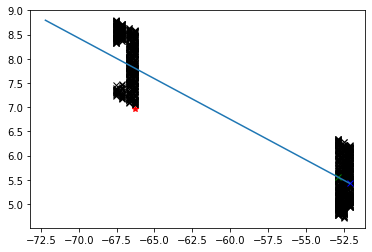

pid -22363.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x          y  \
entry subentry                                                                 
4     44398       1    52  5105  310104  310104   41620 -6.449296  -2.778216   
      43016       1    52  5105  310104  310104   40230 -6.578662  -2.837128   
      50186       1    52  5105  310104  310104   47457  0.375120 -10.472311   
      43526       1    52  5105  310104  310104   40745  7.149714  -0.498347   
      43958       1    52  5105  310104  310104   41178  0.040356   7.025186   
...             ...   ...   ...     ...     ...     ...       ...        ...   
      45497       1    52  5105  310104  310104   42727 -7.198975  -4.293431   
      44023       1    52  5105  310104  310104   41244 -4.010540   7.198247   
      49498       1    52  5105  310104  310104   46765  8.532416   3.416938   
      48949       1    52  5105  310104  310104   46208 -5.757554  -7.072741   
      43959       1  

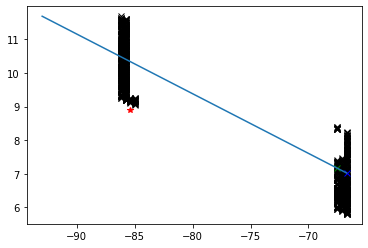

pid -22363.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
4     48887       1    52  5105  310104  310104   46146  -8.153033 -3.551409   
      49957       1    52  5105  310104  310104   47225  -8.220602 -3.582327   
      48735       1    52  5105  310104  310104   45994  -8.796023  0.627134   
      55450       1    52  5105  310104  310104   52759 -13.245396  0.501943   
      49084       1    52  5105  310104  310104   46348  -0.743797 -8.788926   
...             ...   ...   ...     ...     ...     ...        ...       ...   
      55432       1    52  5105  310104  310104   52741 -13.301552  5.159659   
      48721       1    52  5105  310104  310104   45980  -7.827626  0.902839   
      48496       1    52  5105  310104  310104   45752  -4.333914  6.668312   
      48882       1    52  5105  310104  310104   46141  -7.216204 -3.339805   
      55142       1  

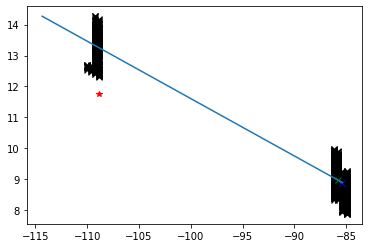

pid -22363.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55535       1    52  5105  310104  310104   52844 -10.806633  -4.791201   
      54622       1    52  5105  310104  310104   51930 -10.870732  -4.823463   
      64834       1    52  5105  310104  310104   62185 -23.633337  -0.191136   
      54163       1    52  5105  310104  310104   51468   7.618300   9.127544   
      55411       1    52  5105  310104  310104   52720 -10.949941   4.246996   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      54389       1    52  5105  310104  310104   51697  -6.939631   7.452557   
      54491       1    52  5105  310104  310104   51799  -9.106026   4.557927   
      54476       1    52  5105  310104  310104   51784  -9.607980   3.372263   
      55345       1    52  5105  310104  310104   52654  -8.718388  10.349503   
      553

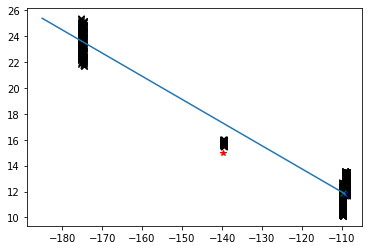

 44%|███████████████████████████████████████████████████▉                                                                  | 88/200 [00:58<01:51,  1.00it/s]

pid -22362.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     39916       1    52  5105  310104  310104   37095 -5.727705 -2.238036   
      38548       1    52  5105  310104  310104   35715 -5.875232 -2.299141   
      39255       1    52  5105  310104  310104   36429  5.725961  2.241299   
      39989       1    52  5105  310104  310104   37170 -4.183751 -4.504828   
      39440       1    52  5105  310104  310104   36615 -1.104306  6.047290   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      37826       1    52  5105  310104  310104   34990  4.317881  3.329699   
      38750       1    52  5105  310104  310104   35919 -0.344450 -5.440780   
      45434       1    52  5105  310104  310104   42663 -7.995525 -2.451384   
      45803       1    52  5105  310104  310104   43037  8.145586 -2.219912   
      38755       1    52  5105  

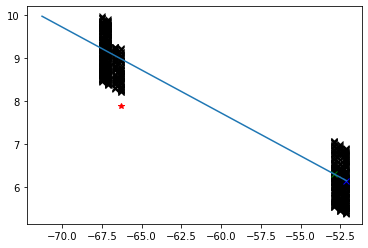

pid -22362.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     55511       1    52  5105  310104  310104   52820 -12.257382  -5.033627   
      55538       1    52  5105  310104  310104   52847 -12.319634  -5.061320   
      55857       1    52  5105  310104  310104   53167  12.947396  -2.812602   
      64629       1    52  5105  310104  310104   61979  12.837310  20.759945   
      55596       1    52  5105  310104  310104   52905  -8.750655 -10.038092   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      55083       1    52  5105  310104  310104   52392  11.759231   0.270157   
      55452       1    52  5105  310104  310104   52761 -14.797061   0.579406   
      64968       1    52  5105  310104  310104   62321  -7.408392 -21.618317   
      55757       1    52  5105  310104  310104   53067   6.502648 -13.382725   
      553

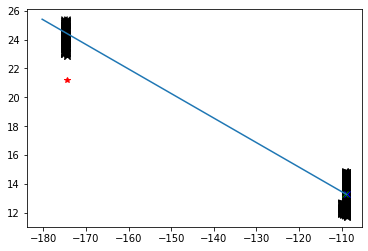

 44%|████████████████████████████████████████████████████▌                                                                 | 89/200 [00:59<01:50,  1.00it/s]

pid -22361.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     30426       1    52  5105  310104  310104   27489  2.482065 -2.720183   
      30344       1    52  5105  310104  310104   27407  1.444451 -3.371801   
      33856       1    52  5105  310104  310104   30966 -3.007670  2.615255   
      30279       1    52  5105  310104  310104   27339  0.614839 -3.634235   
      29479       1    52  5105  310104  310104   26530 -1.363733  3.424396   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      34681       1    52  5105  310104  310104   31799  4.172409 -1.838352   
      34305       1    52  5105  310104  310104   31419 -1.353245 -4.368384   
      34635       1    52  5105  310104  310104   31751  2.798660 -3.617136   
      29753       1    52  5105  310104  310104   26809 -3.959012  1.561272   
      33698       1    52  5105  

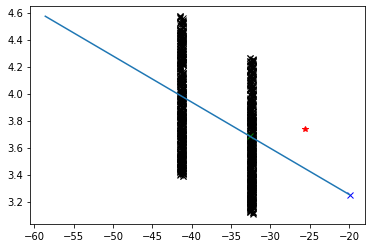

 45%|█████████████████████████████████████████████████████                                                                 | 90/200 [00:59<01:25,  1.28it/s]

pid -22357.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     30968       1    52  5105  310104  310104   28040  -3.143699   4.982524   
      29610       1    52  5105  310104  310104   26665  -3.212127   5.095429   
      31437       1    52  5105  310104  310104   28514  -1.253531  -5.755743   
      30776       1    52  5105  310104  310104   27847   3.868827   4.445297   
      31111       1    52  5105  310104  310104   28185  -5.516674   2.074482   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      224530      1    52  5105  310104  310104  223382 -23.821960   6.144256   
      30024       1    52  5105  310104  310104   27080  -4.990731  -4.278321   
      223888      1    52  5105  310104  310104  222735  13.920470 -24.443691   
      36654       1    52  5105  310104  310104   33802  -1.972270  -8.318599   
      301

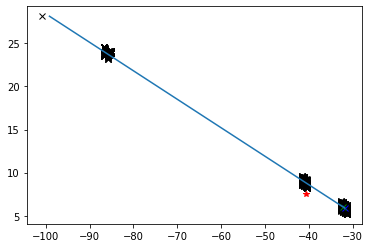

pid -22357.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     40757       1    52  5105  310104  310104   37951  -5.172340   8.374726   
      40783       1    52  5105  310104  310104   37977  -5.224504   8.465758   
      1655        1    52  5105  310104  310104  221338 -26.463112   6.366264   
      41112       1    52  5105  310104  310104   38308  -3.849847  -9.166964   
      46338       1    52  5105  310104  310104   43580 -10.550079  -8.347734   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      40965       1    52  5105  310104  310104   38161 -10.248309  -3.006056   
      222240      1    52  5105  310104  310104  221073  10.041109  24.091652   
      223646      1    52  5105  310104  310104  222493 -20.050966 -12.552993   
      41373       1    52  5105  310104  310104   38571   7.815315  -4.678144   
      222

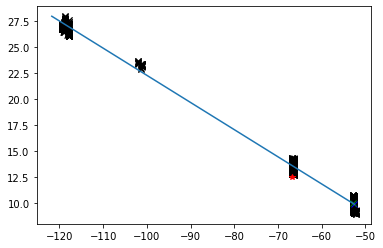

pid -22357.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     46111       1    52  5105  310104  310104   43351  -6.476739  10.632217   
      45260       1    52  5105  310104  310104   42488  -6.592524  10.835855   
      222502      1    52  5105  310104  310104  221340 -26.419613   8.237133   
      135432      1    52  5105  310104  310104  133435  21.692657  23.596987   
      135558      1    52  5105  310104  310104  133563  -7.634720  30.678883   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      45457       1    52  5105  310104  310104   42687 -10.163030  -5.328588   
      45169       1    52  5105  310104  310104   42396  -1.777862  11.454700   
      136800      1    52  5105  310104  310104  134819 -29.892790 -11.721733   
      222707      1    52  5105  310104  310104  221548 -19.314720 -17.828920   
      222

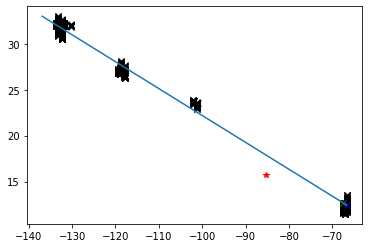

pid -22357.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     50656       1    52  5105  310104  310104   47932  -8.050110  13.435207   
      144006      1    52  5105  310104  310104  142084 -12.936913 -23.881268   
      144003      1    52  5105  310104  310104  142081 -11.725144 -24.498693   
      143753      1    52  5105  310104  310104  141831 -26.715635   4.889449   
      50986       1    52  5105  310104  310104   48265  -2.326351 -15.419739   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      134782      1    52  5105  310104  310104  132778 -22.545795 -10.387772   
      143902      1    52  5105  310104  310104  141980 -19.460388 -16.136995   
      144818      1    52  5105  310104  310104  142913 -22.204817  19.048817   
      134120      1    52  5105  310104  310104  132109  21.477121  12.323595   
      134

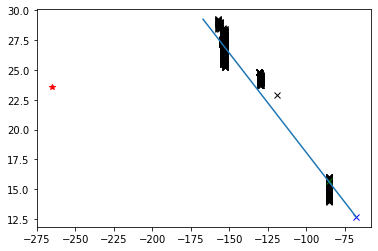

pid -22357.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     79072       1    52  5105  310104  310104   76488  11.227983  20.763159   
      79412       1    52  5105  310104  310104   76831 -16.611177 -16.779356   
      79525       1    52  5105  310104  310104   76944   3.260135 -23.335176   
      79062       1    52  5105  310104  310104   76478  12.736771  19.822392   
      79142       1    52  5105  310104  310104   76560  -2.318279  23.482088   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      78282       1    52  5105  310104  310104   75694   0.214843  19.667299   
      78494       1    52  5105  310104  310104   75908 -18.951893   5.239501   
      78793       1    52  5105  310104  310104   76209   6.115286 -18.722984   
      78641       1    52  5105  310104  310104   76056 -14.802487 -12.990394   
      787

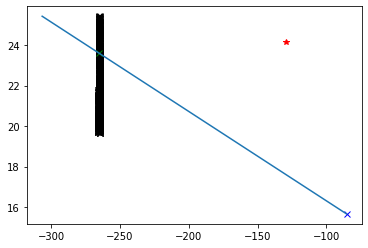

 46%|██████████████████████████████████████████████████████▊                                                               | 93/200 [01:01<01:14,  1.45it/s]

pid -22355.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     10801       1    52  5105  310104  310104    7497   5.767406   1.393856   
      231284      1    52  5105  310104  310104  230213 -23.270325   8.200661   
      231664      1    52  5105  310104  310104  230596  20.089041 -16.665447   
      231060      1    52  5105  310104  310104  229986  13.987763  21.690004   
      12463       1    52  5105  310104  310104    9180  -2.957769   5.702162   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      18444       1    52  5105  310104  310104   15294  -8.994776   5.915533   
      19668       1    52  5105  310104  310104   16540  -3.318669  -9.756781   
      17984       1    52  5105  310104  310104   14826  -3.533142  10.208665   
      231626      1    52  5105  310104  310104  230558  19.371614 -16.547203   
      177

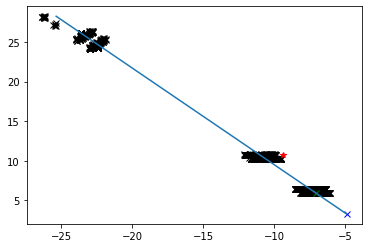

pid -22355.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     16538       1    52  5105  310104  310104   13358  10.373289   2.904880   
      24469       1    52  5105  310104  310104   21439   5.039393 -14.022490   
      20730       1    52  5105  310104  310104   17636   8.810910  -6.276390   
      22386       1    52  5105  310104  310104   19321  -3.800360  14.456046   
      17963       1    52  5105  310104  310104   14805  -4.889120   9.517759   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      231772      1    52  5105  310104  310104  230704  20.045488  15.964804   
      24740       1    52  5105  310104  310104   21716  11.713675  -9.358106   
      23912       1    52  5105  310104  310104   20874  -8.353926 -12.348111   
      25124       1    52  5105  310104  310104   22114  14.256977  -2.078049   
      167

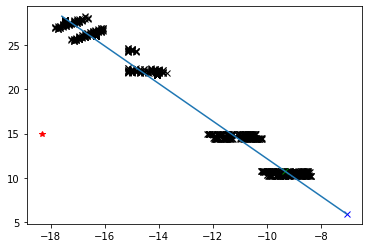

pid -22355.0
final                 run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
4     21158       1    52  5105  310104  310104   18075  14.725528   2.385249   
      22361       1    52  5105  310104  310104   19296  -5.793674  13.758555   
      228701      1    52  5105  310104  310104  227601   5.748914  23.217579   
      229033      1    52  5105  310104  310104  227937 -13.373734 -19.825432   
      228778      1    52  5105  310104  310104  227678  -5.492387  23.456184   
...             ...   ...   ...     ...     ...     ...        ...        ...   
      228595      1    52  5105  310104  310104  227495  23.003788  10.029223   
      228647      1    52  5105  310104  310104  227547  14.907935  20.755648   
      229102      1    52  5105  310104  310104  228006   1.078668 -23.030788   
      24012       1    52  5105  310104  310104   20977  -5.344724 -13.385922   
      229

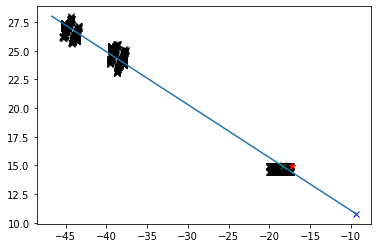

 48%|████████████████████████████████████████████████████████                                                              | 95/200 [01:02<01:03,  1.65it/s]

pid -22353.0
final                 run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
4     49106       1    52  5105  310104  310104   46370  0.702855 -5.835330   
      47771       1    52  5105  310104  310104   45020  0.711087 -5.919935   
      47590       1    52  5105  310104  310104   44838 -2.046415 -5.599499   
      49033       1    52  5105  310104  310104   46296 -2.010259 -5.520265   
      52964       1    52  5105  310104  310104   50261  0.725020  8.343225   
...             ...   ...   ...     ...     ...     ...       ...       ...   
      806         1    52  5105  310104  310104   51535  4.329662  8.051919   
      53839       1    52  5105  310104  310104   51144  5.479330 -5.449032   
      55027       1    52  5105  310104  310104   52336  9.026964 -1.158165   
      53472       1    52  5105  310104  310104   50770 -7.175191 -2.980551   
      47046       1    52  5105  

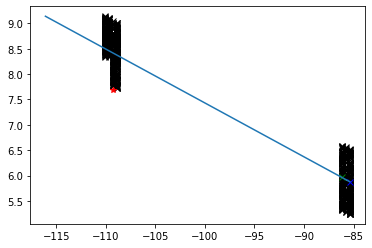

 48%|████████████████████████████████████████████████████████▋                                                             | 96/200 [01:03<01:08,  1.52it/s]


KeyboardInterrupt: 

In [35]:

success = 0 
tries = 0 
num_comp = []

hitsfound = 0 
rewards = [] 
rewards_track = [] 


selected_hits_z = []
selected_hits_r = [] 

hit1_z = []
hit1_r = []

hit2_z = []
hit2_r = [] 
pids = [] 

under= []
over= [] 

not_in_comp_mod = 0 
not_allowed_pid = []

#for pid in tqdm(np.unique(hits.particle_id)): 
for pid in tqdm(np.unique(allowed_pids)[:200]): 
#for pid in rl_pids[: 
#for pid in tqdm(safe_pids):
    p = hits[hits['particle_id']==pid]
    if len(p) < 4: 
        print("nope")
        continue
        #print(p)
    start_hit = p.iloc[0]
    next_start_hit = p.iloc[1]
    
    if start_hit.unique_layer_id == next_start_hit.unique_layer_id: 
        next_start_hit = p.iloc[2]
    track_reward = 0 

    m = (next_start_hit.r - start_hit.r)/(next_start_hit.z - start_hit.z)
    b = next_start_hit.r - m*next_start_hit.z
    #print(p)
    hitids = [] 
    prev_m = m 
    prev_b = b 
    for i in range(len(p)-2):
        #print(hit1)
        hit1 = p.iloc[i]
        hit2 = p.iloc[i+1]
        hit3 = p.iloc[i+2]
        
        m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
        b = hit2.r - m*hit2.z
# how much does this matter
        if hit2.unique_layer_id != hit1.unique_layer_id: 
            m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
            b = hit2.r - m*hit2.z
        else: 
            #print("keeping prev vlas")
            pass 
        

        dm = m - prev_m 
        db = b - prev_b
#         m = m - dm 
#         b = b - db
#         prev_m = m 
#         prev_b = b
        #print(dm)
        
        #m = m + dm
        
        #removing inwards ones 
        if (hit1.z < 0) & (m > 0): 
            not_allowed_pid.append(pid)
            break 
        elif (hit1.z > 0) & (m < 0):
            not_allowed_pid.append(pid)
            break
        
        try: 
            comp_mod = mappings[str(int(hit2.discrete_module_id))]
            #print("hit2 mod id", hit2.discrete_module_id)
        except: 
            print("haven't seen this module", hit2.discrete_module_id)
            comp_mod = []
            
        
    
        if m > 0: 
            compy = hits[((hits['z'] > hit2.z - 1)) ] #|  (hits['z'] == hit2.z))]
        else: 
            compy = hits[((hits['z'] < hit2.z+1))] #|  (hits['z'] == hit2.z))] 
        
        #comp_hits = compy[compy['discrete_module_id'].isin(comp_mod) & 
        #            (compy['r'] > hit2.r)]# & 
                    #(np.abs(hits['z']) > np.abs(hit2.z))]
            
        comp_hits = compy[compy['discrete_module_id'].isin(comp_mod)]
        #print("is in comp hits", hit3.hit_id in comp_hits.hit_id)
        num_comp.append(len(comp_hits))
        
        #comp_hits 
        distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
        num_close = 1000
        

        if len(comp_hits) > num_close: 
            idx = np.argpartition(distances, range(num_close))
            final = comp_hits.iloc[idx.values][:num_close]
        else: 
            final = comp_hits 
        
 
        #print("hit is ", hit2[['z', 'r']], "final is ", final, "and hit found is", hit3.hit_id in final.hit_id.values)

        hitids.append(final.hit_id.values)
        if hit3.hit_id in final.hit_id.values: 
            hitsfound += 1 
            
        else: 
            #print("hit1", hit1[['z', 'r']], "hit2", hit2[['z', 'r']], "hit3", hit3[['z', 'r']])
            not_allowed_pid.append(pid)
            if hit3.discrete_module_id not in comp_mod: 
                #print("it wasn't in the comp mods")
                not_in_comp_mod +=1 
                #not_allowed_pid.append(pid)
            
            hit3_line_r = eval_line_at_point(m, b, hit3.z)
            if hit3.r - hit3_line_r  < 0: 
                under.append(  hit3.r - hit3_line_r)
            else: 
                over.append(  hit3.r - hit3_line_r)

            print("pid", pid)
            print("final", final)
            print("distances", distances)
            #print("idx", idx)
            plt.plot(final.z, final.r, "kx")
            plt.plot(hit1.z, hit1.r, "bx")
            plt.plot(hit2.z, hit2.r, "gx")
            plt.plot(hit3.z, hit3.r, "r*")
            plt.plot()
            y = np.linspace(hit1.r, np.max(final.r), 1000)
            x = (y -b )/m 
            plt.plot(x, y)
            print("particle id is", p.particle_id.iloc[0])
            print("is in mapping", hit3.discrete_module_id in comp_mod)
            print("hit 2 z", hit2.z, "hit3 z", hit3.z)
            #plt.plot(p.z, p.r, "gd")
            print("hit 1 layer", hit1.unique_layer_id, "hit 2 lauer", hit2.unique_layer_id)
            print("dm is ", dm, "db is", db)
            print("distance line and correct hit", calc_distance(m, b, hit3.z, hit3.r))
            print("m", m, " b ", b)
            print("hit3 ", hit3.z, hit3.r)
#             #print("distance line and best hit ", calc_distance(m, b, final.iloc[0].z, final.iloc[0].r))
# #             for vol in hor_vol: 
# #                 v = md[md['volume_id']==vol]
# #                 for i in range(v.shape[0]): 
# #                     row = v.iloc[i]
# #                     plt.plot([row.z_min,row.z_max], [row.r_mean, row.r_mean], "r")

# #             for vol in ver_vol: 
# #                 v = md[md['volume_id']==vol]
# #                 for i in range(v.shape[0]): 
# #                     row = v.iloc[i]
# #                     plt.plot([row.z_mean,row.z_mean], [row.r_min, row.r_max], "r")
        plt.show()
        tries +=1 
        try: 
            selected_hit = final.iloc[0]
            #print("hit3", hit3[['z', 'r']], "selected_hit", selected_hit[['z', 'r']])
        except:
            #print(final)
            pass
        #reward = -np.sqrt((hit3.z - selected_hit.z)**2 + (hit3.r - selected_hit.r)**2)
        #rewards.append(reward)
        #track_reward += reward
#         selected_hits_z.append(selected_hit.z)
#         selected_hits_r.append(selected_hit.r)
#         pids.append(pid)
#         hit1_z.append(hit1.z)
#         hit1_r.append(hit1.r)
#         hit2_z.append(hit2.z)
#         hit2_r.append(hit2.r)
        #print(final)
    #rewards_track.append(track_reward)

In [36]:
hitsfound/tries

0.7132867132867133

In [14]:
len(hits[hits['volume_id']==6]['layer_id'].value_counts())

5

In [29]:
not_in_comp_mod

6

In [32]:
num_comp

[9431,
 12069,
 13825,
 8839,
 13094,
 9548,
 12707,
 10066,
 12375,
 19707,
 18605,
 10684,
 1836,
 21356,
 19903,
 14340,
 29993,
 13586,
 16082,
 15863,
 23433,
 22122,
 11650,
 11615,
 1486,
 1486,
 898,
 282,
 564,
 120,
 2445,
 20628,
 19427,
 13856,
 29179,
 29093,
 13631,
 14066,
 14695,
 12950,
 12017,
 13616,
 14604,
 9461,
 9461,
 14314,
 14314,
 10498,
 10498,
 9206,
 11421,
 11421,
 6749,
 6749,
 3429,
 13234,
 13222,
 11921,
 16565,
 15470,
 25677,
 22420,
 20504,
 23657,
 21789,
 22728,
 20343,
 17209,
 17612,
 15756,
 14034,
 22555,
 22555,
 15119,
 14206,
 14091,
 13967,
 13176,
 12137,
 14481,
 21462,
 20497,
 21860,
 23834,
 5207,
 1962,
 23293,
 21909,
 21285,
 20333,
 19438,
 16187,
 371,
 183,
 183,
 183,
 13409,
 14667,
 10108,
 11351,
 20491,
 20406,
 18808,
 17333,
 14890,
 13823,
 11324,
 13952,
 11809,
 17446,
 19833,
 12684,
 12539,
 13592,
 11549,
 11549,
 10848,
 10848,
 14900,
 14129,
 21809,
 25332,
 22040,
 4238,
 11587,
 14604,
 13092,
 19881,
 19155,


In [44]:
new_allowed_pids = [pid for pid in allowed_pids if pid not in not_allowed_pid]

In [57]:
np.savetxt('new_allowed_pids.out', new_allowed_pids)

In [46]:
len(under)/(len(under)+ len(over))

0.5812854125456801

In [44]:
hit3_line_r = eval_line_at_point(m, b, hit3.z)
if hit3.r - hit3_line_r  < 0: 

[20.134414672851562]

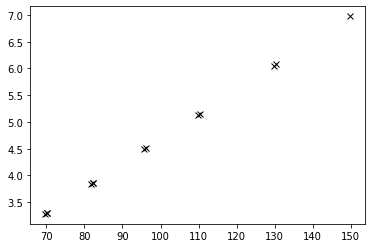

In [163]:
plotting.plot_particle(hits[hits['particle_id']==8.286641868620431e+17])

In [164]:
p = hits[hits['particle_id']== 8.286641868620431e+17]

In [165]:
p

hit_id        x        y           z         r  layer_id  volume_id  \
5189    39208  1.12280  3.08304   69.750000  3.281130         4          9   
5493    39132  1.12886  3.10050   70.199997  3.299610         4          9   
5542    39255  1.13299  3.10214   70.250000  3.302565         4          9   
8538    41349  1.29761  3.60960   81.750000  3.835753         6          9   
8622    41374  1.30616  3.63071   82.250000  3.858511         6          9   
8624    41276  1.30736  3.63104   82.199997  3.859228         6          9   
10871   43237  1.49038  4.23178   95.750000  4.486557         8          9   
10943   43308  1.50159  4.25197   96.250000  4.509326         8          9   
12965   44882  1.68118  4.84920  109.750000  5.132359        10          9   
13043   44921  1.68900  4.86931  110.250000  5.153921        10          9   
15561   46278  1.94890  5.73072  129.750000  6.053046        12          9   
15623   46315  1.95481  5.75421  130.250000  6.077188        12          9   
17722   47462  2.19815  6.61990  149.750000  6.975309        14          9   

       module_id       phi   particle_id        pt  nhits  discrete_module_id  \
5189          74  1.221540  8.286642e+17  0.246616     14                3429   
5493          71  1.221625  8.286642e+17  0.246616     14                3426   
5542          77  1.220620  8.286642e+17  0.246616     14                3432   
8538          74  1.225694  8.286642e+17  0.246616     14                3537   
8622          77  1.225459  8.286642e+17  0.246616     14                3540   
8624          71  1.225196  8.286642e+17  0.246616     14                3534   
10871         74  1.232174  8.286642e+17  0.246616     14                3645   
10943         77  1.231317  8.286642e+17  0.246616     14                3648   
12965         74  1.237071  8.286642e+17  0.246616     14                3753   
13043         77  1.236916  8.286642e+17  0.246616     14                3756   
15561         74  1.242987  8.286642e+17  0.246616     14                3861   
15623         77  1.243310  8.286642e+17  0.246616     14                3864   
17722         74  1.250200  8.286642e+17  0.246616     14                3969   

       Unnamed: 0  unique_layer_id  next_mod_id  connecting_layer_id  
5189           29             19.0       3426.0                 19.0  
5493           29             19.0       3432.0                 19.0  
5542           29             19.0       3537.0                 20.0  
8538           30             20.0       3540.0                 20.0  
8622           30             20.0       3534.0                 20.0  
8624           30             20.0       3645.0                 21.0  
10871          31             21.0       3648.0                 21.0  
10943          31             21.0       3753.0                 22.0  
12965          34             22.0       3756.0                 22.0  
13043          34             22.0       3861.0                 23.0  
15561          33             23.0       3864.0                 23.0  
15623          33             23.0       3969.0                 24.0  
17722          32             24.0       3972.0                 24.0

In [134]:
p['z_2'] = p.groupby('particle_id')['z'].shift(-1)

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


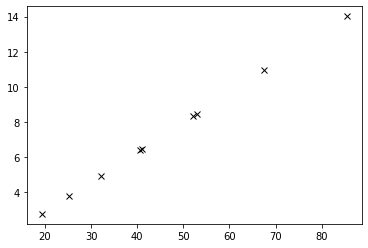

In [89]:
p = hits[hits['particle_id']==-17938.]
plt.plot(p.z, p.r, "kx")

In [90]:
p

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
4735      1    89  8805  136545  136545    3869  -2.749814  0.362738   
80850     1    89  8805  136545  136545   80456  -3.734851  0.491561   
84872     1    89  8805  136545  136545   84534  -4.907141  0.641798   
90534     1    89  8805  136545  136545   90269  -6.350805  0.827724   
89104     1    89  8805  136545  136545   88819  -6.417197  0.835406   
94998     1    89  8805  136545  136545   94784  -8.283895  1.070870   
96180     1    89  8805  136545  136545   95980  -8.415209  1.087709   
100859    1    89  8805  136545  136545  100701 -10.884128  1.393838   
106465    1    89  8805  136545  136545  106353 -13.906260  1.759048   

                z  particle_id  ...   sim_eta  sim_phi  volume_id  layer_id  \
4735    19.387152       -17938  ...  2.469641  3.00885          2         1   
80850   25.200001       -17938  ...  2.469641  3.00885          3        17   
84872   32.175999       -17938  ...  2.469641  3.00885          3        18   
90534   40.699001       -17938  ...  2.469641  3.00885          3        19   
89104   41.098999       -17938  ...  2.469641  3.00885          3        19   
94998   52.111000       -17938  ...  2.469641  3.00885          3        20   
96180   52.910999       -17938  ...  2.469641  3.00885          3        20   
100859  67.508003       -17938  ...  2.469641  3.00885          3        21   
106465  85.377998       -17938  ...  2.469641  3.00885          3        22   

        module_id          r  unique_layer_id  discrete_module_id        z_2  \
4735            9   2.773636                1                 219  25.200001   
80850          10   3.767061               33               31710  32.175999   
84872          10   4.948933               34               31810  40.699001   
90534          16   6.404519               35               31916  41.098999   
89104          10   6.471346               35               31910  52.111000   
94998          16   8.352824               36               32016  52.910999   
96180          12   8.485214               36               32012  67.508003   
100859         12  10.973013               37               32112  85.377998   
106465         16  14.017072               38               32216        NaN   

           diff_z  
4735     5.812849  
80850    6.975998  
84872    8.523003  
90534    0.399998  
89104   11.012001  
94998    0.799999  
96180   14.597004  
100859  17.869995  
106465        NaN  

[9 rows x 28 columns]

In [144]:
np.where(diff > 0)[0]

array([0, 3, 6])

In [138]:
p = p.drop(labels=p.iloc[pos+1].name, axis=0)

In [139]:
p

hit_id        x        y           z         r  layer_id  volume_id  \
7250     6391 -2.59016 -2.33594  -81.800003  3.487914        10          7   
7332     6334 -2.60499 -2.35309  -82.250000  3.510414        10          7   
9404     4413 -3.04598 -2.72336  -95.800003  4.085913         8          7   
9405     4323 -3.04830 -2.72123  -95.750000  4.086224         8          7   
9492     4371 -3.06163 -2.73652  -96.250000  4.106351         8          7   
11505    2726 -3.51320 -3.10103 -109.800003  4.686039         6          7   
11510    2644 -3.51488 -3.10098 -109.750000  4.687266         6          7   
11571    2670 -3.52904 -3.11601 -110.250000  4.707828         6          7   
14136    1314 -4.17919 -3.63444 -129.800003  5.538482         4          7   
14202    1278 -4.19692 -3.64697 -130.250000  5.560083         4          7   

       module_id       phi   particle_id        pt  nhits  discrete_module_id  \
7250          14 -2.407756  5.855140e+16  0.354168     12                 445   
7332          12 -2.406957  5.855140e+16  0.354168     12                 443   
9404          14 -2.412056  5.855140e+16  0.354168     12                 337   
9405           9 -2.412823  5.855140e+16  0.354168     12                 332   
9492          12 -2.412207  5.855140e+16  0.354168     12                 335   
11505         14 -2.418430  5.855140e+16  0.354168     12                 229   
11510          9 -2.418675  5.855140e+16  0.354168     12                 224   
11571         12 -2.418271  5.855140e+16  0.354168     12                 227   
14136         14 -2.425800  5.855140e+16  0.354168     12                 121   
14202         12 -2.426192  5.855140e+16  0.354168     12                 119   

       Unnamed: 0  unique_layer_id  next_mod_id  connecting_layer_id  \
7250           27             13.0        440.0                 13.0   
7332           27             13.0        337.0                 14.0   
9404           24             14.0        332.0                 14.0   
9405           24             14.0        335.0                 14.0   
9492           24             14.0        229.0                 15.0   
11505          23             15.0        224.0                 15.0   
11510          23             15.0        227.0                 15.0   
11571          23             15.0        121.0                 16.0   
14136          22             16.0        119.0                 16.0   
14202          22             16.0         11.0                 17.0   

              z_2  
7250   -81.750000  
7332   -95.800003  
9404   -95.750000  
9405   -96.250000  
9492  -109.800003  
11505 -109.750000  
11510 -110.250000  
11571 -129.800003  
14136 -130.250000  
14202         NaN

In [130]:
-109.75  - (-109.8)

0.04999999999999716

In [158]:
np.where(p.reset_index()['z_2'] < 0)[0] + 1

array([5])

In [150]:
p.reset_index()

index  hit_id          x          y          z          r  layer_id  \
0  44191   57520  -3.767270 -25.670300  22.255299  25.945263         2   
1  46480   57510  -4.988100 -25.880701  21.740000  26.357006         2   
2  51287   62283 -26.461401 -24.301100  12.640000  35.926998         4   
3  58356   66988 -49.189499  -9.001630   1.140000  50.006363         6   
4  59994   66979 -49.846199  -8.165000   0.660000  50.510506         6   
5  63231   71595 -57.869801  31.402100 -16.782499  65.840759         8   

   volume_id  module_id       phi   particle_id        pt  nhits  \
0         13        490 -1.716512  4.504012e+15  0.281702      7   
1         13        489 -1.761196  4.504012e+15  0.281702      7   
2         13        623 -2.398726  4.504012e+15  0.281702      7   
3         13        783 -2.960596  4.504012e+15  0.281702      7   
4         13        782 -2.979231  4.504012e+15  0.281702      7   
5         13        911  2.644423  4.504012e+15  0.281702      7   

   discrete_module_id  Unnamed: 0  unique_layer_id  next_mod_id  \
0                5513           7              5.0       5512.0   
1                5512           7              5.0       6486.0   
2                6486           8              6.0       7822.0   
3                7822           9              7.0       7821.0   
4                7821           9              7.0       9588.0   
5                9588          10              8.0       9587.0   

   connecting_layer_id        z_2  
0                  5.0  21.740000  
1                  6.0  12.640000  
2                  7.0   1.140000  
3                  7.0   0.660000  
4                  8.0 -16.782499  
5                  8.0        NaN

# Radius estimates

In [48]:
hits.particle_id[100]

3.8281607008957235e+17

In [68]:
low_p = hits[hits['pt'] < 1]
high_p = hits[hits['pt'] > 2]

In [72]:
high_p['particle_id'].iloc[0]

5.719678041949471e+17

In [88]:
len(hits[hits['pt']> 10]['particle_id'])

70

In [85]:
hits[hits['pt']> 10]['particle_id'].iloc[0]

4521604130275328.0

In [86]:
p = hits[hits['particle_id']==4521604130275328.0]

In [57]:
from circle_fit import least_squares_circle

In [87]:
for i in range(len(p)-1): 
    h1 = p.iloc[i]
    h2 = p.iloc[i+1]
    
    xc, yc, R, residu = least_squares_circle([[h1.x, h1.y], [h2.x, h2.y]])
    print(R)

0.12434854814892096
1.8450060666005623
2.290366925739873
2.714868568100889
4.4210063400787805
4.952997053159806
7.166896291544502
7.778334867616047


In [59]:
R

2838.0335152463335

In [42]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 4.2 MB/s eta 0:00:01


In [53]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure(data=go.Scatter3d(
    x=p.y, y=p.z, z=p.x,
    marker=dict(
        size=4,
        color=p.z,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.show()

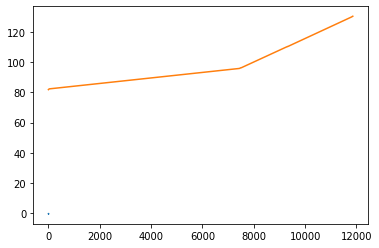

In [36]:


ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');



# Patterns in output

In [172]:
output = pd.read_csv('../evaluation/garage_outputs.csv')

In [173]:
file0 = output.iloc[200:]

In [174]:
par_reward = file0.groupby('particle_id')['reward'].sum()

In [175]:
low_reward = par_reward[par_reward < -10]

In [176]:
np.median(hits[hits['particle_id'].isin(low_reward.index)].pt)

0.47338378

In [177]:
hits['pt'].median()

0.4639576

In [178]:
comb = hits[hits['particle_id'].isin(file0.particle_id)]

In [179]:
file0 = file0.rename(columns={'mc_z': 'z', 'mc_r':'r'})

In [180]:
merged = comb.merge(file0, on=['particle_id', 'z', 'r']).dropna()

In [181]:
merged

hit_id          x          y           z          r  layer_id  \
231     7466   2.364880   2.765070  -81.800003   3.638443        10   
233     6771   2.154000  -2.993470  -81.800003   3.687896        10   
234    41153   2.396940   2.813220   82.250000   3.695880         6   
237     7835  -0.764934   3.668090  -81.750000   3.747000        10   
238     7557   0.739935   3.674340  -81.750000   3.748103        10   
...      ...        ...        ...         ...        ...       ...   
1851   85034 -67.125702 -47.037899    7.600000  81.965988         2   
1862   84249 -55.100700  61.029305  -27.120001  82.223251         2   
1865   87089   3.201520 -82.252701  107.860001  82.314987         2   
1873   81395  74.055405 -39.389999 -214.750000  83.879524         6   
1878   93649 -16.199800  87.562096  254.449997  89.048050        10   

      volume_id  module_id       phi   particle_id  ...         z_2  \
231           7         68  0.863251  6.980656e+17  ...  -82.199997   
233           7         36 -0.947059  5.269218e+17  ...  -82.199997   
234           9         66  0.865126  4.818962e+17  ...   95.800003   
237           7         85  1.776387  4.508135e+15  ...  -82.199997   
238           7         74  1.372075  5.179264e+17  ...  -81.800003   
...         ...        ...       ...           ...  ...         ...   
1851         17       1332 -2.530368  3.467835e+17  ...    9.760000   
1862         17        944  2.305187  4.143490e+17  ...  -35.760002   
1865         17       2431 -1.531893  3.197735e+17  ...  121.449997   
1873         16         42 -0.488840  2.927483e+17  ... -255.550003   
1878         18         77  1.753737  3.512864e+17  ...  255.550003   

         diff_z  Unnamed: 0  unique_layer_id  next_mod_id  \
231   -0.399994          27             13.0        502.0   
233   -0.399994          27             13.0        470.0   
234   13.550003          30             20.0       3639.0   
237   -0.449997          27             13.0        513.0   
238   -0.050003          27             13.0        510.0   
...         ...         ...              ...          ...   
1851   2.160000          14              9.0      16631.0   
1862  -8.640001          14              9.0      16149.0   
1865  13.589996          14              9.0      18163.0   
1873 -40.800003          51             40.0      11982.0   
1878   1.100006          62             47.0      18607.0   

      connecting_layer_id  filenumber      pred_z     pred_r     reward  
231                  13.0           0  -81.800003   3.672359  -0.033916  
233                  13.0           0  -81.750000   3.760045  -0.087782  
234                  21.0           0   82.250000   3.700553  -0.004673  
237                  13.0           0  -81.750000   3.809158  -0.062157  
238                  13.0           0  -81.750000   3.725419  -0.022685  
...                   ...         ...         ...        ...        ...  
1851                 10.0           0    8.680000  81.837029  -1.087672  
1862                 10.0           0  -25.460001  82.013321  -1.673222  
1865                 43.0           0   62.340004  81.999283 -45.521091  
1873                 41.0           0 -179.550003  66.340492 -39.327566  
1878                 47.0           0  254.449997  86.044121  -3.003929  

[1183 rows x 23 columns]

In [182]:
merged.sort_values('reward')['pt']

1807    0.247806
1484    2.234375
1789    0.262993
1798    1.723281
1809    0.458678
          ...   
1385    0.645765
763     1.454185
303     0.350193
795     0.312495
793     0.454151
Name: pt, Length: 1183, dtype: float32

In [183]:
merged['residual_z'] = merged['z'] - merged['pred_z']
merged['residual_r'] = merged['r'] - merged['pred_r']

(array([3.000e+00, 7.000e+00, 5.000e+00, 2.700e+01, 1.031e+03, 6.700e+01,
        2.100e+01, 1.500e+01, 6.000e+00, 1.000e+00]),
 array([-23.73621368, -18.7730464 , -13.80987911,  -8.84671183,
         -3.88354454,   1.07962275,   6.04279003,  11.00595732,
         15.9691246 ,  20.93229189,  25.89545918]),
 <BarContainer object of 10 artists>)

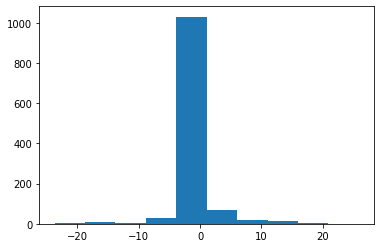

In [184]:
plt.hist(merged['residual_r'])

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.800e+01, 2.300e+01, 1.019e+03,
        8.600e+01, 1.700e+01, 1.200e+01, 5.000e+00]),
 array([-113.37000275,  -93.46800308,  -73.56600342,  -53.66400375,
         -33.76200409,  -13.86000443,    6.04199524,   25.9439949 ,
          45.84599457,   65.74799423,   85.6499939 ]),
 <BarContainer object of 10 artists>)

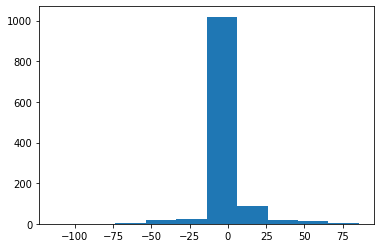

In [185]:
plt.hist(merged['residual_z'])

In [186]:
perfect = merged[merged['reward']==10]

In [191]:
awful = merged[merged['reward']< -20]

In [192]:
awful

hit_id          x          y           z          r  layer_id  \
1121   46053  17.394001   1.512430  130.199997  17.459629        12   
1126   52440  24.229801  -0.151419 -149.550003  24.230274        10   
1127   77379  12.871800  20.618900  179.550003  24.306835         6   
1128   52972 -24.182100   2.730690 -149.550003  24.335789        10   
1129   52947 -24.196899   2.710920 -149.850006  24.348286        10   
...      ...        ...        ...         ...        ...       ...   
1835   86382   8.265631  81.473404   61.259998  81.891609         2   
1841   85489 -81.496506   8.166281   17.900000  81.904625         2   
1843   86286  21.635300 -79.002602   58.020000  81.911514         2   
1865   87089   3.201520 -82.252701  107.860001  82.314987         2   
1873   81395  74.055405 -39.389999 -214.750000  83.879524         6   

      volume_id  module_id       phi   particle_id  ...  Unnamed: 0  \
1121          9         56  0.086733  3.197703e+17  ...          33   
1126         12         86 -0.006249  1.621312e+17  ...          41   
1127         14        112  1.012721  4.053287e+17  ...          44   
1128         12        168  3.029147  6.530265e+17  ...          41   
1129         12        165  3.030022  6.530265e+17  ...          41   
...         ...        ...       ...           ...  ...         ...   
1835         17       2009  1.469690  1.441157e+17  ...          14   
1841         17       1559  3.041722  7.971387e+17  ...          14   
1843         17       1956 -1.303494  5.719666e+17  ...          14   
1865         17       2431 -1.531893  3.197735e+17  ...          14   
1873         16         42 -0.488840  2.927483e+17  ...          51   

      unique_layer_id  next_mod_id  connecting_layer_id  filenumber  \
1121             23.0      11415.0                 34.0           0   
1126             26.0       4766.0                 26.0           0   
1127             33.0      11441.0                 34.0           0   
1128             26.0       4848.0                 26.0           0   
1129             26.0       4681.0                 27.0           0   
...               ...          ...                  ...         ...   
1835              9.0      14435.0                  9.0           0   
1841              9.0      13985.0                  9.0           0   
1843              9.0      14382.0                  9.0           0   
1865              9.0      18163.0                 43.0           0   
1873             40.0      11982.0                 41.0           0   

          pred_z     pred_r     reward  residual_z  residual_r  
1121  179.550003  24.306835 -49.822759  -49.350006   -6.847206  
1126 -110.199997  17.265354 -39.961645  -39.350006    6.964920  
1127  129.800003  15.957936 -50.445680   49.750000    8.348899  
1128 -109.800003  15.649282 -40.688056  -39.750000    8.686506  
1129 -129.800003  17.541908 -21.173790  -20.050003    6.806377  
...          ...        ...        ...         ...         ...  
1835   40.660000  82.209717 -20.602455   20.599998   -0.318108  
1841   46.639999  81.634232 -28.741272  -28.740000    0.270393  
1843   22.219999  81.953995 -35.800030   35.800001   -0.042480  
1865   62.340004  81.999283 -45.521091   45.519997    0.315704  
1873 -179.550003  66.340492 -39.327566  -35.199997   17.539032  

[86 rows x 25 columns]

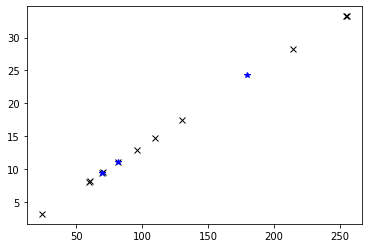

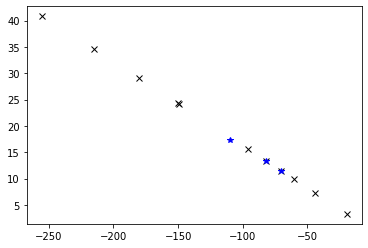

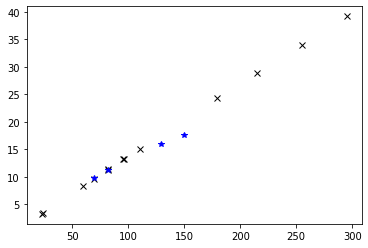

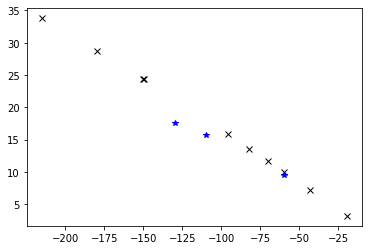

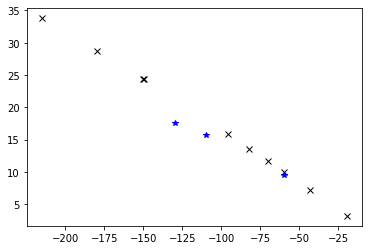

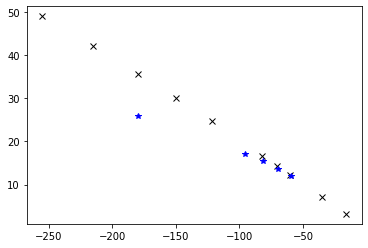

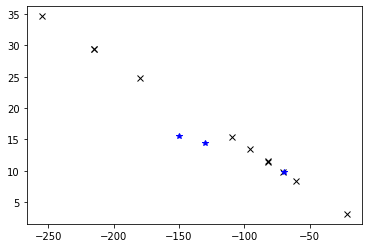

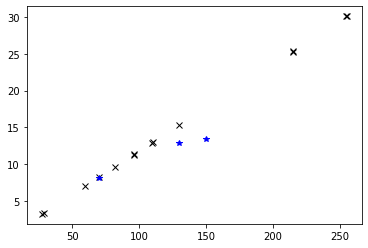

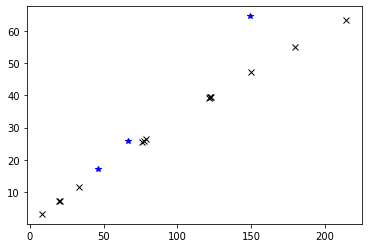

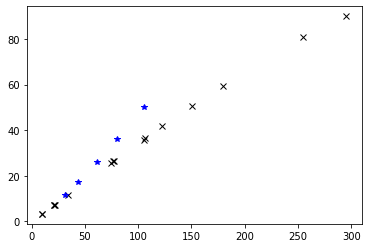

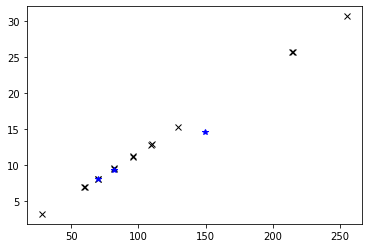

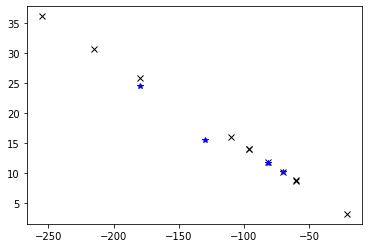

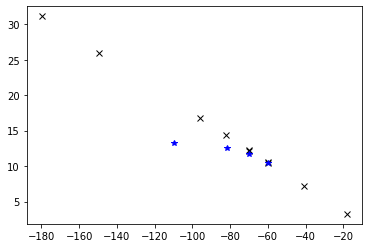

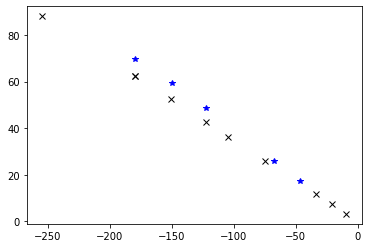

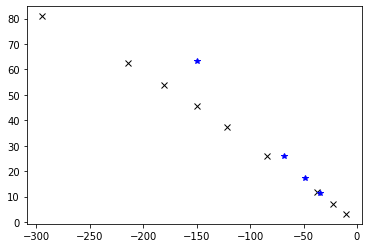

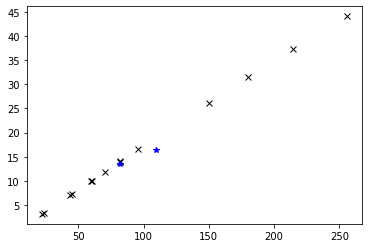

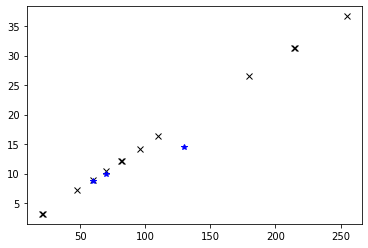

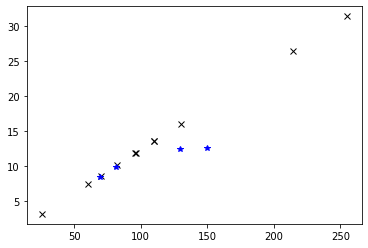

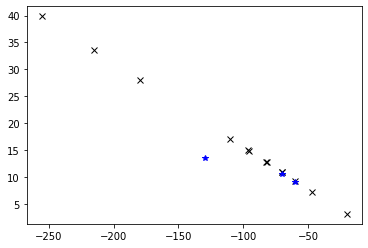

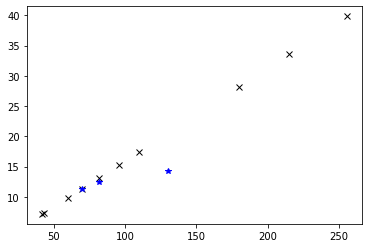

In [193]:
for pid in awful.particle_id[:20]: 
    p = hits[hits['particle_id']==pid]
    p_m = merged[merged['particle_id']==pid]
    plt.plot(p.z, p.r, "kx")
    plt.plot(p_m.pred_z, p_m.pred_r, "b*")
    plt.show() 

In [49]:
!readlink -f new_allowed_pids

/home/lhv14/DDPG/notebooks/new_allowed_pids


In [50]:
!ls

'Algo fitting-CMS.ipynb'   new_allowed_pids.npz        Untitled.ipynb
'Algo fitting.ipynb'	  'NN control.ipynb'
'Evaluation plots.ipynb'  'Quality monitoring.ipynb'


In [58]:
y = np.loadtxt('new_allowed_pids.out')

In [59]:
y

array([-17938., -17935., -17934., ...,    907.,    908.,    909.])

In [56]:
!ls

'Algo fitting-CMS.ipynb'   new_allowed_pids	 'Quality monitoring.ipynb'
'Algo fitting.ipynb'	   new_allowed_pids.npz   Untitled.ipynb
'Evaluation plots.ipynb'  'NN control.ipynb'
